In [3]:
from config_path import add_to_sys_path
add_to_sys_path()  # Call the function to add path

import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('bright')
from Energy_Levels import MoleculeLevels
from Energy_Levels import branching_ratios, Calculate_TDMs,Calculate_TDM_evecs
from functools import partial
np.set_printoptions(precision=5, suppress=True)
from tabulate import tabulate
from matplotlib.collections import LineCollection

In [4]:
%matplotlib inline

In [5]:
N0_list = [0,1,2,3,4]
N1_list = [1]

In [765]:
# X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=16,M_range=[1])
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N1_list,M_values = 'all',M_range=[-1,0,1],I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2],trap=False,theta_num=0)
# X010.I_trap = 0.01324*1/4*0
# X000 = MoleculeLevels.initialize_state('CaOH','40','X000',N0_list,M_values = 'all',I=[0,0],S=1/2,round=8,P_values=[1/2])

In [6]:
X010 = MoleculeLevels.initialize_state('YbOH','174','X010',[1],M_values = 'all',M_range=[-1,1],I=[0,1/2],S=1/2,round=8,P_values=[1/2])

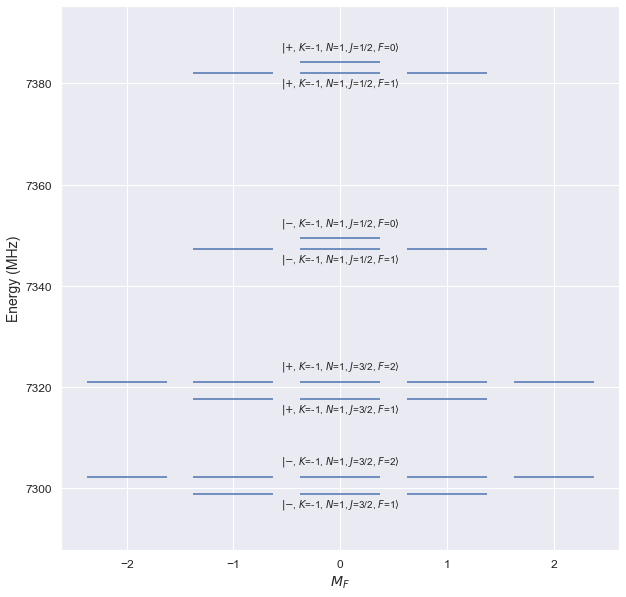

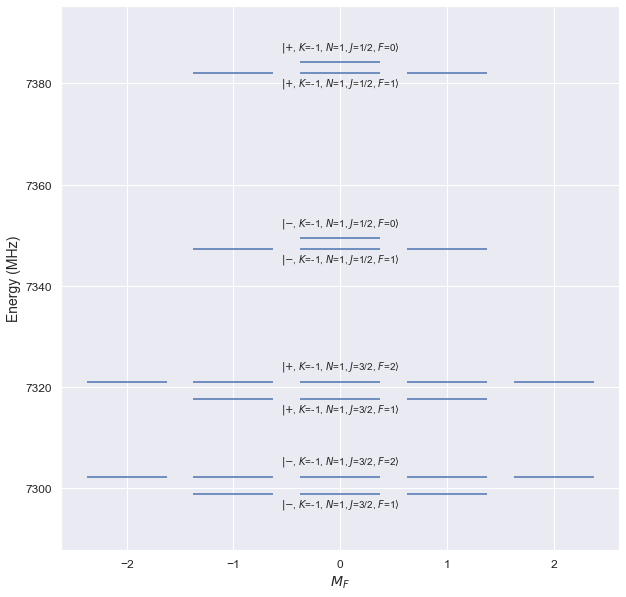

In [7]:
X010.display_levels(0,1e-5,'F',alt_label=True,parity=True)

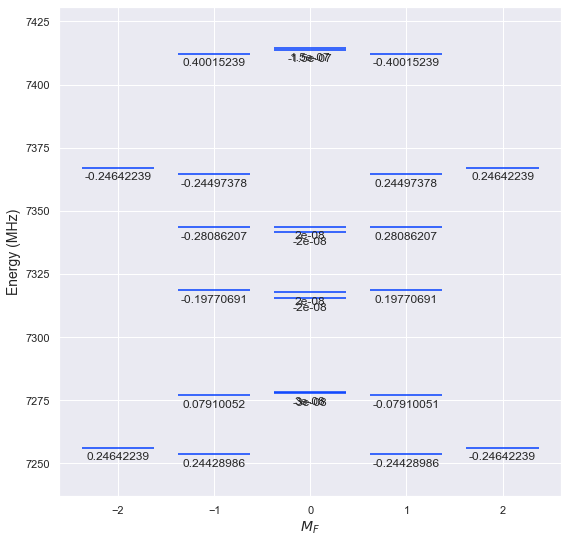

In [713]:
X010.display_PTV(101,1e-7,'EDM')

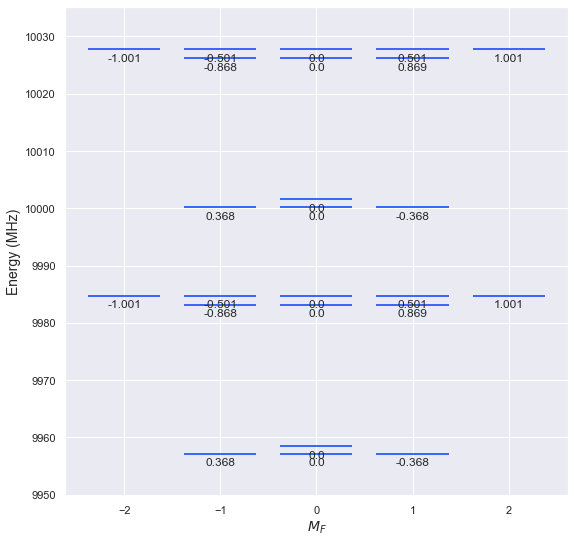

In [524]:
X010.display_g_eff(0,1e-5,round=3)

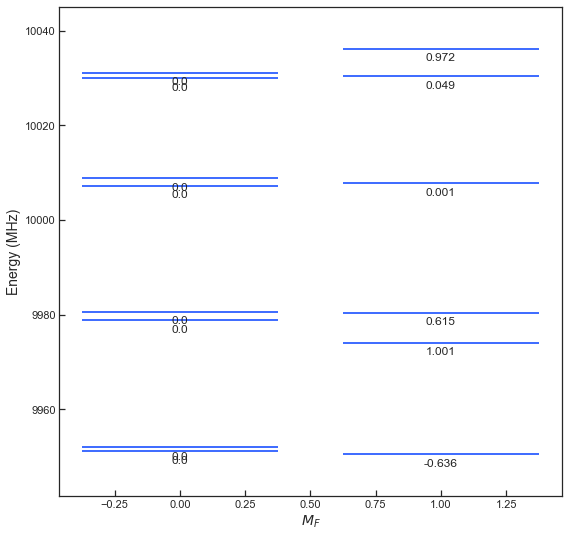

In [279]:
X010.display_g_eff(60.48,1e-5,round=3)

In [280]:
0.07/0.227

0.30837004405286345

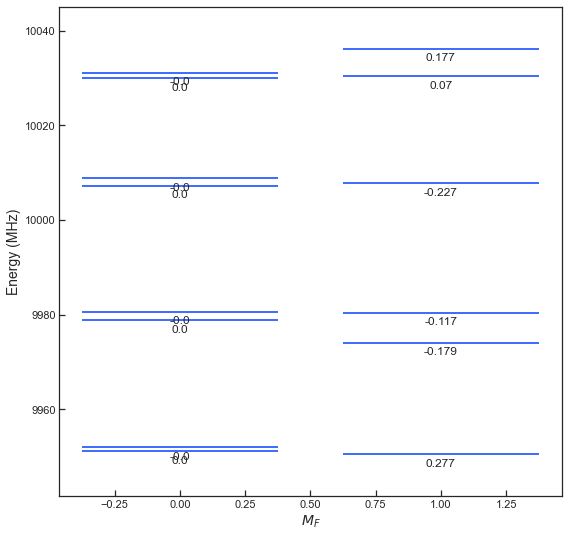

In [281]:
X010.display_PTV(60.48,1e-5,'EDM',round=3)

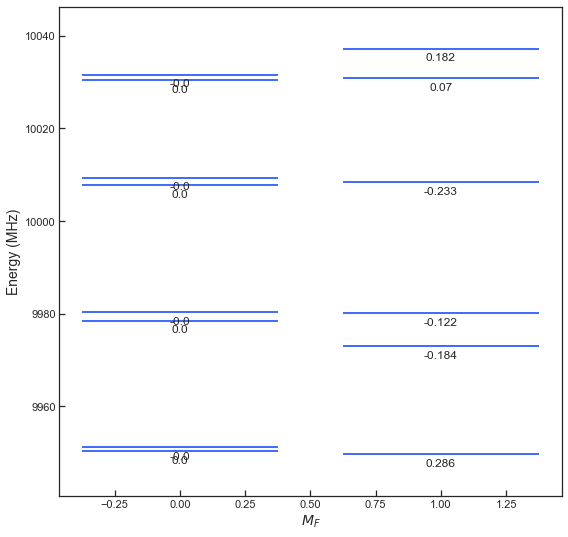

In [282]:
X010.display_PTV(64.3,1e-5,'EDM',round=3)

In [766]:
Bz = np.linspace(0,100,10001)
Ez = np.linspace(0,100,10001)
X010.StarkMap(Ez,1e-5)
X010.ZeemanMap(Bz,0)

In [767]:
deltaE = np.mean(Ez[1:]-Ez[:-1])
deltaE

0.01

In [768]:
X010.PTV_Map('EDM')

In [769]:
X010.g_eff_Map(step=1e-4);

Text(0.5, 0, 'E field (V/cm)')

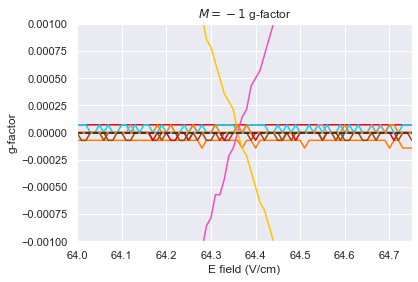

In [771]:
plt.plot(Ez,X010.g_eff_E)
plt.xlim(64,64.75)
plt.ylim(-1e-3,1e-3)
plt.axhline(y=0,color='k',linestyle='--')
plt.ylabel('g-factor')
plt.title(r'$M=-1$ g-factor')
plt.xlabel('E field (V/cm)')

In [288]:
X010.g_eff_E.shape

(10001, 14)

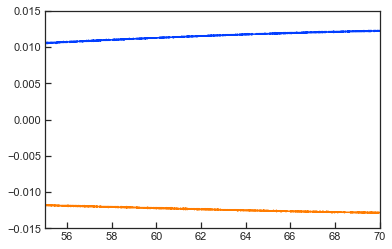

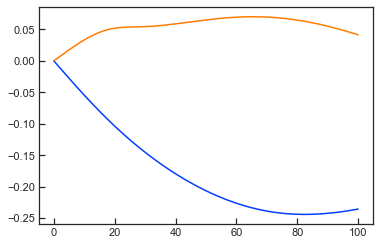

In [269]:
plt.figure()
plt.plot(Ez[1:],(X010.g_eff_E.T[3][1:]-X010.g_eff_E.T[3][:-1])/deltaE)
plt.plot(Ez[1:],(X010.g_eff_E.T[4][1:]-X010.g_eff_E.T[4][:-1])/deltaE)
plt.xlim(55,70)
plt.ylim(-0.015,0.015)
plt.figure()
plt.plot(Ez,X010.PTV_E.T[3])
plt.plot(Ez,X010.PTV_E.T[4])

(-0.0001, 0.0001)

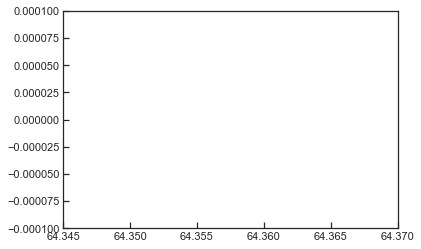

In [270]:
plt.plot(Ez,X010.g_eff_E)
plt.xlim(64.345,64.37)
plt.ylim(-1e-4,1e-4)

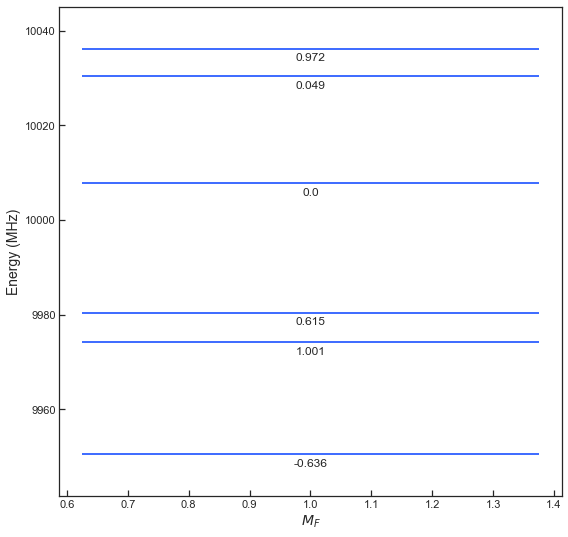

In [271]:
X010.display_g_eff(60.36,1e-5,round=3)

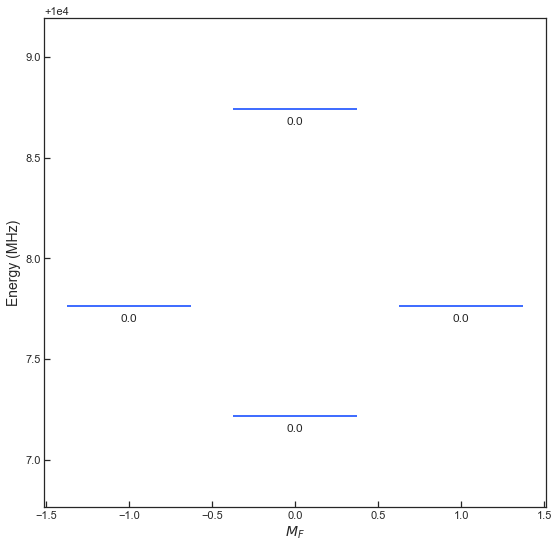

In [389]:
X010.display_g_eff(60.36,1e-5,round=5,offset=0.05,idx=[10,11,12,13])
plt.savefig('zeroG.svg')

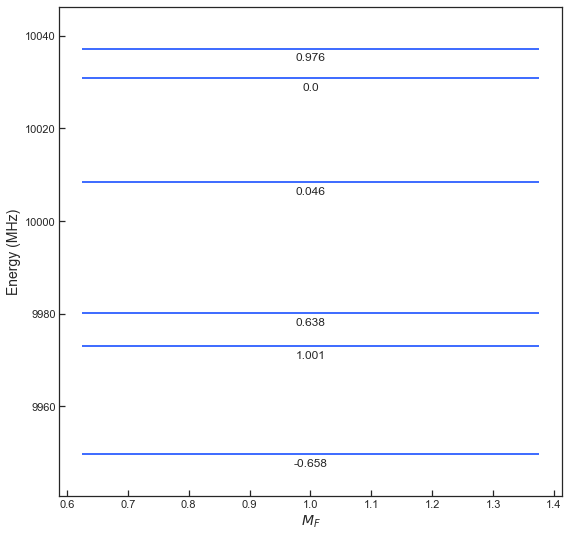

In [273]:
X010.display_g_eff(64.38,1e-5,round=3)

In [379]:
B0 = 1e-5
E0 = 60.3
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X010.select_q({'N':1,'J':0.5,'M':[1,0,-1]})
print(M0_idx)
print('\n')
for i in M0_idx:
    print(i)
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.001,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['K','J','F','Sigma','P','M'],round=4)))
#     print('Case BbS:')
#     display(Latex(X010.gen_state_str(i,basis='bBS',thresh=0.05,label_q=['K','G','N','F','M'],round=4)))
    print('Case B:')
    print('Parity=',np.round(X010.evecs0[i]@X010.Parity_mat@X010.evecs0[i],3))
    display(Latex(X010.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[ 0  1  2  3 10 11 12 13]


0


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -0.769


<IPython.core.display.Latex object>



1


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -0.769


<IPython.core.display.Latex object>



2


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -0.786


<IPython.core.display.Latex object>



3


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -0.767


<IPython.core.display.Latex object>



10


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 0.712


<IPython.core.display.Latex object>



11


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 0.693


<IPython.core.display.Latex object>



12


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 0.693


<IPython.core.display.Latex object>



13


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 0.719


<IPython.core.display.Latex object>

In [380]:
0.7531 - 0.2085

0.5446

In [381]:
1.7331 - 0.7531

0.9800000000000001

In [230]:
0.3873**2+0.591**2

0.4992822899999999

In [231]:
0.6862**2+0.022**2

0.47135444000000004

In [232]:
0.0136**2+0.1707**2

0.029323449999999997

In [290]:
B0 = 1e-5
E0 = 64.36
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X010.select_q({'N':1,'J':1.5,'M':[1,0,-1]})
print(M0_idx)
print('\n')
for i in M0_idx:
    print(i)
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.001,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['K','J','F','Sigma','P','M'],round=4)))
#     print('Case BbS:')
#     display(Latex(X010.gen_state_str(i,basis='bBS',thresh=0.05,label_q=['K','G','N','F','M'],round=4)))
    print('Case B:')
    print('Parity=',np.round(X010.evecs0[i]@X010.Parity_mat@X010.evecs0[i],3))
    display(Latex(X010.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[ 3  4  5  6 10 11 12 13]


3


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -0.674


<IPython.core.display.Latex object>



4


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -0.809


<IPython.core.display.Latex object>



5


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -0.806


<IPython.core.display.Latex object>



6


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -0.805


<IPython.core.display.Latex object>



10


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 0.836


<IPython.core.display.Latex object>



11


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 0.861


<IPython.core.display.Latex object>



12


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 0.856


<IPython.core.display.Latex object>



13


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 0.674


<IPython.core.display.Latex object>

In [708]:
B0 = 1e-5
E0 = 0
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X010.select_q({'N':[0,1],'J':1.5,'M':[-1,1]})
print(M0_idx)
print('\n')
for i in M0_idx:
    print(i)
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.001,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['K','J','F','Sigma','P','M'],round=4)))
#     print('Case BbS:')
#     display(Latex(X010.gen_state_str(i,basis='bBS',thresh=0.05,label_q=['K','G','N','F','M'],round=4)))
    print('Case B:')
    print('Parity=',np.round(X010.evecs0[i]@X010.Parity_mat@X010.evecs0[i],3))
    display(Latex(X010.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[ 0  2  3  5  6  8  9 11]


0


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>



2


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>



3


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>



5


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>



6


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>



8


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>



9


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>



11


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

In [783]:
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'custom',M_range=[-1,0,1],I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])

In [784]:
from hamiltonian_builders import build_operator
from matrix_elements import StarkZ_bBJ
from matrix_elements import ZeemanZ_bBJ
from matrix_elements import ZeemanX_bBJ
from matrix_elements import Sz_bBJ
from functools import partial

In [785]:
Sz = build_operator(X010.q_numbers,X010.q_numbers,partial(ZeemanZ_bBJ,I=X010.I_spins[-1]))
Sx = build_operator(X010.q_numbers,X010.q_numbers,partial(ZeemanX_bBJ,I=X010.I_spins[-1]))
Dz = build_operator(X010.q_numbers,X010.q_numbers,partial(StarkZ_bBJ,I=X010.I_spins[-1]))
Sig = build_operator(X010.q_numbers,X010.q_numbers,partial(Sz_bBJ, I = X010.I_spins[-1]))

In [786]:
np.set_printoptions(threshold=np.inf)

In [787]:
B0 = 1e-6
E0 = 0
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')

In [788]:
Sz = build_operator(X010.q_numbers,X010.q_numbers,partial(ZeemanZ_bBJ,I=X010.I_spins[-1]))
Sx = build_operator(X010.q_numbers,X010.q_numbers,partial(ZeemanX_bBJ,I=X010.I_spins[-1]))
Dz = build_operator(X010.q_numbers,X010.q_numbers,partial(StarkZ_bBJ,I=X010.I_spins[-1]))
Sig = build_operator(X010.q_numbers,X010.q_numbers,partial(Sz_bBJ, I = X010.I_spins[-1]))

In [703]:
a = X010.evecs0[X010.select_q({'N':1,'J':3/2,'M':0,'F':1},parity='+')]
b = X010.evecs0[X010.select_q({'N':1,'J':3/2,'M':0,'F':2},parity='-')]

In [706]:
1/2*(a)@Sig@(b).T

array([[0.]])

In [692]:
1/2*(a)@Sz@(b).T

array([[0.]])

In [651]:
1/2*(c)@Sig@(d).T

array([[-0.24995]])

In [ ]:
1/2*(a)@Sig@(b).T

In [807]:
B0 = 1e-7
E0 = 60.5
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')

In [808]:
idx = X010.select_q({'N':1,'J':1/2},parity='+')
for i in idx:
    print(i)
    X010.write_state(i)

10
E = 10007.23729952 MHz

 0.14649898 |K=-1,N=1.0,J=0.5,F=0.0,M=0.0> 

 -0.14649899 |K=1,N=1.0,J=0.5,F=0.0,M=0.0> 

 0.62242438 |K=-1,N=1.0,J=0.5,F=1.0,M=0.0> 

 0.62242438 |K=1,N=1.0,J=0.5,F=1.0,M=0.0> 

 -0.2016785 |K=-1,N=1.0,J=1.5,F=1.0,M=0.0> 

 -0.20167849 |K=1,N=1.0,J=1.5,F=1.0,M=0.0> 

 0.22461462 |K=-1,N=1.0,J=1.5,F=2.0,M=0.0> 

 -0.22461461 |K=1,N=1.0,J=1.5,F=2.0,M=0.0> 

11
E = 10007.78568388 MHz

 -0.48029267 |K=-1,N=1.0,J=0.5,F=1.0,M=-1.0> 

 -0.78382342 |K=1,N=1.0,J=0.5,F=1.0,M=-1.0> 

 -0.00192252 |K=-1,N=1.0,J=0.5,F=1.0,M=1.0> 

 -0.00117804 |K=1,N=1.0,J=0.5,F=1.0,M=1.0> 

 -0.18060804 |K=-1,N=1.0,J=1.5,F=1.0,M=-1.0> 

 0.05871947 |K=1,N=1.0,J=1.5,F=1.0,M=-1.0> 

 0.00014402 |K=-1,N=1.0,J=1.5,F=1.0,M=1.0> 

 -0.00044299 |K=1,N=1.0,J=1.5,F=1.0,M=1.0> 

 -0.33991397 |K=-1,N=1.0,J=1.5,F=2.0,M=-1.0> 

 0.05766316 |K=1,N=1.0,J=1.5,F=2.0,M=-1.0> 

 -0.00014143 |K=-1,N=1.0,J=1.5,F=2.0,M=1.0> 

 0.00083372 |K=1,N=1.0,J=1.5,F=2.0,M=1.0> 

12
E = 10007.78568388 MHz

 0.00117804 

In [631]:
c = X010.evecs0[X010.select_q({'N':1,'J':1/2,'M':1,'F':1},parity='+')]
d = X010.evecs0[X010.select_q({'N':1,'J':1/2,'M':1,'F':1},parity='-')]

In [635]:
1/2*(a+b)@Sig@(a+b).T

array([[0.49893]])

In [641]:
1/2*(a+b)@Dz@(a+b).T

array([[0.34236]])

In [642]:
c@Dz@d.T

array([[0.34236]])

In [636]:
1/2*(a-b)@Sig@(a-b).T

array([[-0.49893]])

In [632]:
1/2*(c-d)@Sig@(c-d).T

array([[0.49893]])

In [633]:
1/2*(c+d)@Sig@(c+d).T

array([[-0.49893]])

In [471]:
b@Sig@a.T

array([[0.49893]])

In [457]:
c@Sig@d.T

array([[-0.49893]])

In [75]:
# M0n = X010.evecs0[11]
# Mp1 = X010.evecs0[12]
# Mn1 = X010.evecs0[12]*0
# M0p = X010.evecs0[13]

In [341]:
M0n = X010.evecs0[7]
Mp1 = X010.evecs0[8]
Mn1 = X010.evecs0[8]*0
M0p = X010.evecs0[9]

In [328]:
M0n = X010.evecs0[7]
Mp1 = X010.evecs0[8]*0
Mn1 = X010.evecs0[8]
M0p = X010.evecs0[9]

In [11]:
# M0n = X010.evecs0[8]
# Mp1 = X010.evecs0[9]*0
# Mn1 = X010.evecs0[9]
# M0p = X010.evecs0[10]

In [810]:
M0n = X010.evecs0[10]
Mp1 = X010.evecs0[11]
Mn1 = X010.evecs0[12]
M0p = X010.evecs0[13]

In [811]:
M0n = X010.evecs0[10]
Mp1 = X010.evecs0[12]
Mn1 = X010.evecs0[11]
M0p = X010.evecs0[13]

In [812]:
vec_dict = {'0-':M0n, '+1':Mp1,'-1':Mn1,'0+':M0p}

for name, vec in vec_dict.items():
    print('M={} properties:'.format(name))
    print('Sz =', vec@Sz@vec)
    print('Sx =', vec@Sx@vec)
    print('Dz =', vec@Dz@vec)
    print('Sigma = ', vec@Sig@vec)
    print('')

M=0- properties:
Sz = -5.734739849660997e-09
Sx = 0.0
Dz = -0.19533347550692642
Sigma =  -3.5964554112588587e-09

M=+1 properties:
Sz = 0.0007928027426464812
Sx = 0.0
Dz = -0.22083261455148936
Sigma =  0.22719462209608704

M=-1 properties:
Sz = -0.0007928174956124967
Sx = 0.0
Dz = -0.22083260984496433
Sigma =  -0.22719462437757004

M=0+ properties:
Sz = -3.073979404355498e-09
Sx = 0.0
Dz = -0.20964926104859705
Sigma =  7.859420669831252e-09



In [813]:
M0n@Sx@Mp1

0.17953323188850656

In [814]:
M0n@Sx@Mn1

0.18041609597312896

In [815]:
M0p@Sx@Mp1

0.16224997106551997

In [816]:
M0p@Sx@Mn1

-0.16145600518538775

In [342]:
M0n@Sz@M0p

0.0450723727632855

In [343]:
M0n@Sx@M0p

0.0

In [344]:
M0n@Sx@Mp1

0.17969594007127354

In [332]:
M0n@Sx@Mn1

0.17969569701199045

In [345]:
M0p@Sx@Mp1

-0.16154772990280933

In [334]:
M0p@Sx@Mn1

-0.16154804242990747

In [383]:
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N1_list,M_values = 'custom',M_range=[1],I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])


In [384]:
# d_000 = build_operator(X000.q_numbers,X000.q_numbers,partial(StarkZ_bBJ,I=X000.I_spins[0]))
d_010 = build_operator(X010.q_numbers,X010.q_numbers,partial(StarkZ_bBJ,I=X010.I_spins[-1]))
# mu_000 = build_operator(X000.q_numbers,X000.q_numbers,partial(ZeemanZ_bBJ,I=X000.I_spins[0]))
mu_010 = build_operator(X010.q_numbers,X010.q_numbers,partial(ZeemanZ_bBJ,I=X010.I_spins[-1]))
sig_010 = build_operator(X010.q_numbers,X010.q_numbers,partial(Sz_bBJ, I = X010.I_spins[-1]))

In [394]:
Ez000 = np.linspace(0,20000,5000)
Ez010 = np.linspace(0,500,5000)

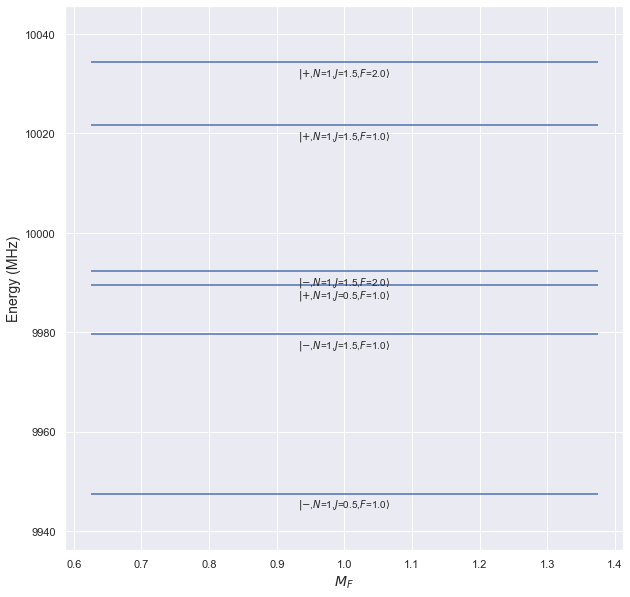

In [494]:
X010.update_params({'bF': 30,'c':10,'Gamma_SR':35,'q_lD':-21},recompute=True)
X010.display_levels(0,1e-3,'F',parity=True,label_q=['N','J','F'],deltaE_label=1)

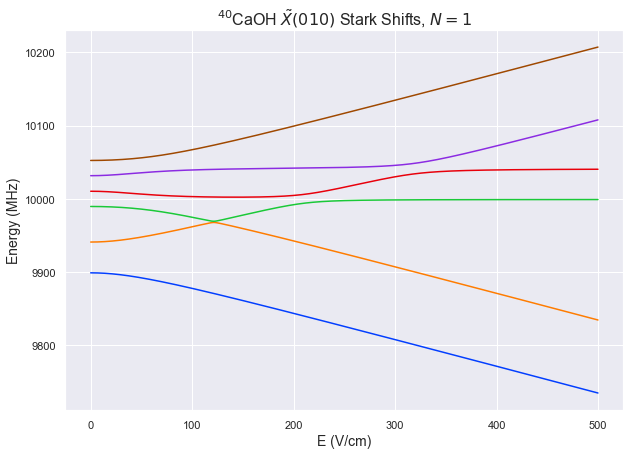

In [490]:
# X010.update_params({'bF': 6*2.294,'c':0*2.524})
X010.StarkMap(Ez010,1e-3,plot=True)
# plt.xlim(0,100)
# plt.ylim(9000,10500)\

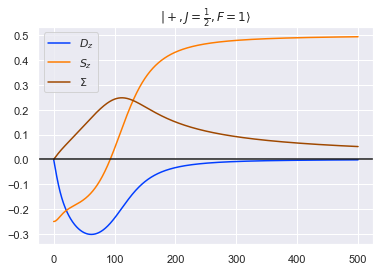

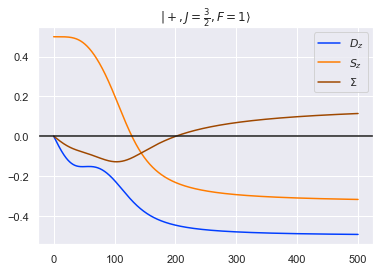

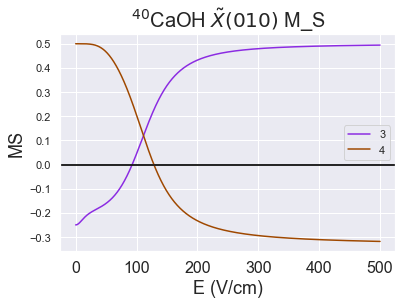

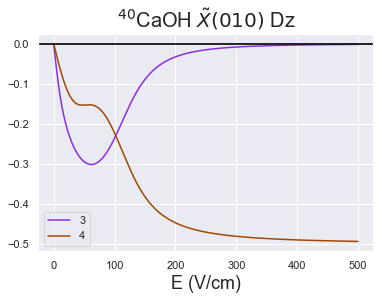

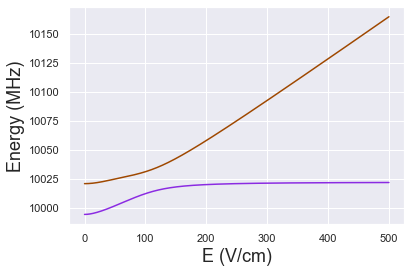

In [488]:
state = X010
state.eigensystem(0,1e-3)
# plt.figure(figsize=(7,3))
# alpha=0.2
plt.figure('All Sz')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('MS',fontsize=18)
plt.title(state.state_str + ' M_S',fontsize=20)
plt.xticks(fontsize=16);
# plt.ylim(-0.1,0.1)
plt.figure('Energies')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('Energy (MHz)',fontsize=18)
plt.figure('All Dz')
plt.title(state.state_str + ' Dz',fontsize=20)
plt.xlabel('E (V/cm)',fontsize=18)
for i in state.select_q({'N':[1],'M':[1]}):
    Dz = np.diagonal(state.evecs_E[:,i,:]@d_010@state.evecs_E[:,i,:].T)
    Sz = np.diagonal(state.evecs_E[:,i,:]@mu_010@state.evecs_E[:,i,:].T)
    Sig = np.diagonal(state.evecs_E[:,i,:]@sig_010@state.evecs_E[:,i,:].T)
    idx0 = abs(Sz)<0.01
    if np.any(idx0)==False:
#         print('Nope')
        continue
    else:
        plt.figure('Dz'+str(i))
        plt.title(X010.gen_state_str(i,parity=True,single=True,show_coeff=False,label_q=['J','F']))
        plt.plot(Ez010,Dz,label=r'$D_z$')
        plt.plot(Ez010,Sz,label=r'$S_z$')
        plt.plot(Ez010,Sig,label=r'$\Sigma$',color='C5')
        plt.axhline(y=0,color='k')
        plt.legend(loc='best')
        
        plt.figure('All Sz')
#         mean = 10025
#         plt.plot(Ez010,(state.evals_E[:,i].T-mean)/1000,color='C'+str(i))
        
        plt.plot(Ez010,Sz,color='C'+str(i+1),label=i)
        plt.axhline(y=0,color='k')
        plt.legend(loc='best')
        
        plt.figure('All Dz')
#         mean = 10025
#         plt.plot(Ez010,(state.evals_E[:,i].T-mean)/1000,color='C'+str(i))
        
        plt.plot(Ez010,Dz,color='C'+str(i+1),label=i)
        plt.axhline(y=0,color='k')
        plt.legend(loc='best')
        
        plt.figure('Energies')
        plt.plot(Ez010,state.evals_E[:,i].T,color='C'+str(i+1))
# plt.axvline(62,color='black',linestyle='--')
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')
# plt.xlim(300,350)
# plt.ylim(-0.1,0.1)
# plt.ylim(-0.1,0.1)

1 [0.22232 0.2223  0.22228 0.22225 0.22223 0.22221 0.22218 0.22216 0.22213
 0.22211 0.22209 0.22206 0.22204 0.22202 0.22199 0.22197 0.22194 0.22192
 0.2219  0.22187 0.22185 0.22182 0.2218  0.22177 0.22175 0.22173 0.2217
 0.22168 0.22165 0.22163 0.2216  0.22158 0.22156 0.22153 0.22151 0.22148
 0.22146 0.22143 0.22141 0.22138 0.22136 0.22133 0.22131 0.22128 0.22126
 0.22124 0.22121 0.22119 0.22116 0.22114 0.22111 0.22109 0.22106 0.22104
 0.22101 0.22099 0.22096 0.22094 0.22091 0.22089 0.22086 0.22084 0.22081
 0.22079 0.22076 0.22073 0.22071 0.22068 0.22066 0.22063 0.22061 0.22058
 0.22056 0.22053 0.22051 0.22048 0.22045 0.22043 0.2204  0.22038 0.22035
 0.22033 0.2203  0.22028 0.22025 0.22022 0.2202  0.22017 0.22015 0.22012
 0.22009 0.22007 0.22004 0.22002 0.21999 0.21997 0.21994 0.21991 0.21989
 0.21986 0.21983 0.21981 0.21978 0.21976 0.21973 0.2197  0.21968 0.21965
 0.21962 0.2196  0.21957 0.21955 0.21952 0.21949 0.21947 0.21944 0.21941
 0.21939 0.21936 0.21933 0.21931 0.21928 0.21925 0

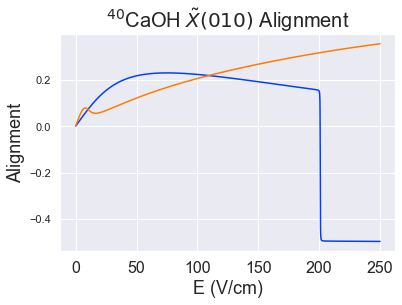

In [366]:
state = X010
Ez=Ez010
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':1,'M':[1]}):
    mu = np.diagonal(state.evecs_E[:,i,:]@mu_010@state.evecs_E[:,i,:].T)
    grad = np.gradient(state.evals_E.T[i])/(Ez[-1]-Ez[-2])/(1.465*0.503412)
    idx0 = abs(mu)<0.01
    if np.any(idx0)==False:
        continue
    else:
        plt.plot(Ez,grad)
        print(i,grad[idx0])
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('Alignment',fontsize=18)
plt.title(state.state_str + ' Alignment',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')

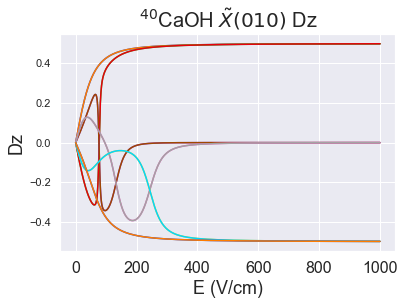

In [17]:
state = X010
dz = d_010
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[1],'M':[1,-1]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez010,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('Dz',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + ' Dz',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')
# plt.xlim(300,350)
# plt.ylim(-0.1,0.1)

In [ ]:
for i in state.select_q({'N':[1],'M':[-1,1]}):

In [362]:
X010.eigensystem(100,1e-3);
idx = X010.select_q({'N':1,'M':[1]})
for i in idx:
    print(X010.parities[i])
    print(X010.evals0[i])
#     print('bBJ')
#     display(Latex(X010.gen_state_str(i,basis='bBJ',thresh=0.05,label_q=['K','N','J','M'],round=8)))
#     print('aBJ')
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['J','Sigma','P','M'],round=8)))
    print('Case BbS:')
    display(Latex(X010.gen_state_str(i,basis='bBS',thresh=0.05,label_q=['K','G','N','F','M'],round=4)))
    print('decoupled')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'], round=8)))
    print('')

-1.0
9892.82207012
Case BbS:


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


1.0
9945.1192884
Case BbS:


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


-1.0
9995.8469631
Case BbS:


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


-1.0
10021.42799327
Case BbS:


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


1.0
10052.81862031
Case BbS:


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


1.0
10072.2682626
Case BbS:


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>

In [31]:
X010.alt_q_numbers['bBS']

{'K': [-1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1],
 'N': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'G': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'F1': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0],
 'F': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0],
 'M': [-1.0,
  -1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  -1.0,
  -1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  -2.0,
  -2.0,
  -1.0,
  -1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  2.0,
  2.0]}

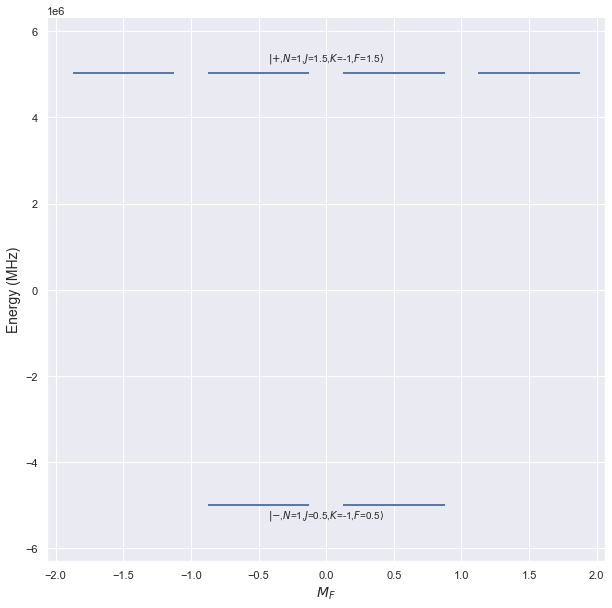

In [143]:
X010.update_params({'Gamma_SR':35.5,'q_lD':-21.53,'Gamma_Prime':10000000,'p_lD':0.1})
X010.eigensystem(0,1e-3)
X010.display_levels(0,1e-3,'F',idx=X010.select_q({'N':1}),parity=True,label_q=['N','J','K'],alt_label=True)

In [ ]:
A000 = MoleculeLevels.initialize_state('CaOH','40','A000',[1,2,3],M_values = 'all',I=[0,0],S=1/2,round=8,P_values=[1/2,3/2])
state = A000
from matrix_elements import StarkZ_even_aBJ
dz = build_operator(A000.q_numbers,A000.q_numbers,partial(StarkZ_even_aBJ,I=A000.I_spins[0]))

In [154]:
Ez000=np.linspace(0,100000,5000)
A000.StarkMap(Ez000,1e-3,plot=False)

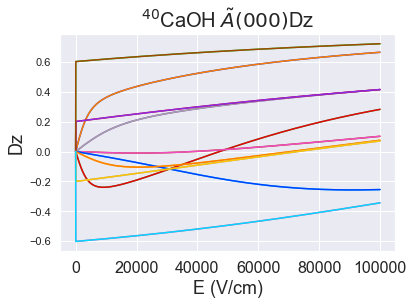

In [155]:
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'J':[1/2,3/2]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez000,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('Dz',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + 'Dz',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')

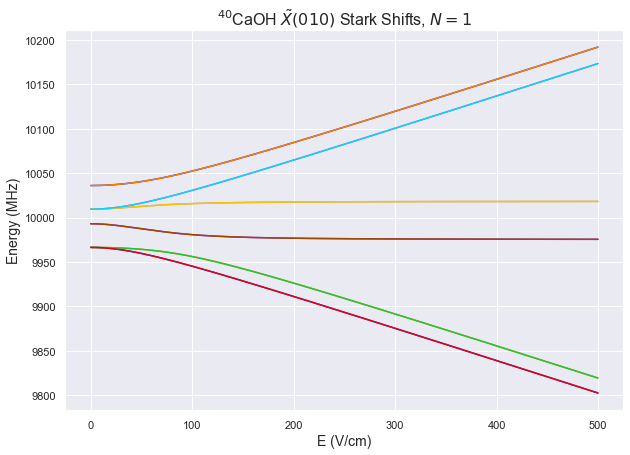

In [24]:
X010.update_params({'Gamma_SR':-35.5,'q_lD':-21.53})
X010.StarkMap(Ez010,1e-3,idx=X010.select_q({'N':1}),plot=True)

(30.0, 80.0)

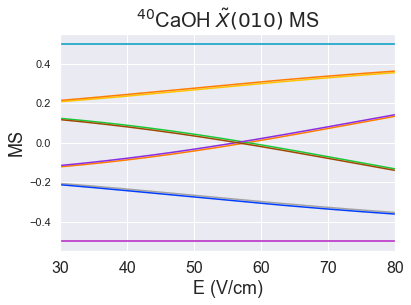

In [26]:
state = X010
dz = mu_010
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[1]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez010,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('MS',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + ' MS',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')
plt.xlim(30,80)

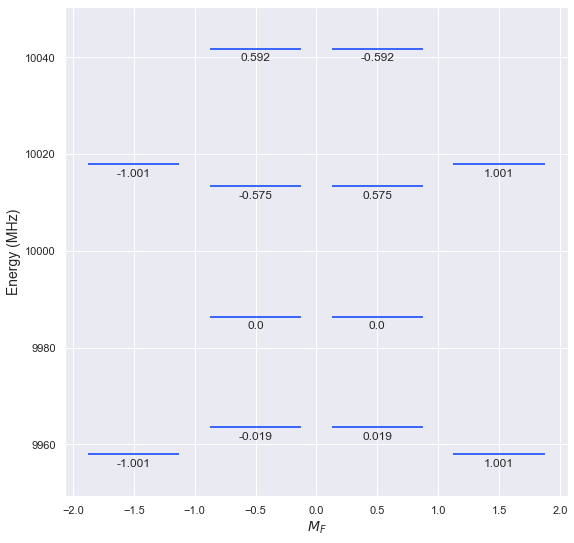

In [28]:
X010.display_g_eff(56.3,1e-3,round=3)

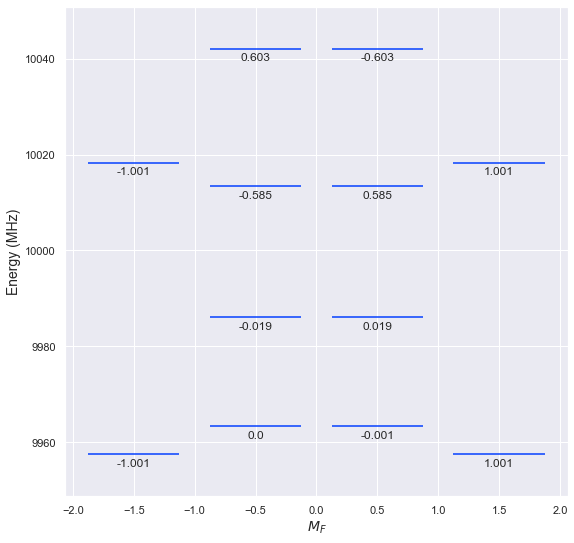

In [27]:
X010.display_g_eff(58,1e-3,round=3)

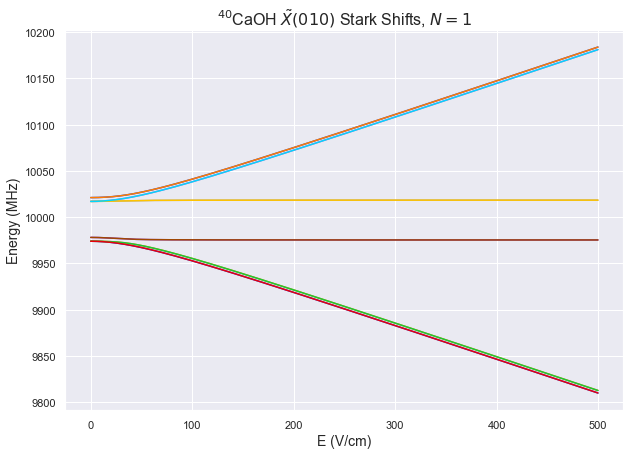

In [47]:
X010.update_params({'Gamma_SR':-5.5,'q_lD':-21.53})
X010.StarkMap(Ez010,1e-3,idx=X010.select_q({'N':1}),plot=True)

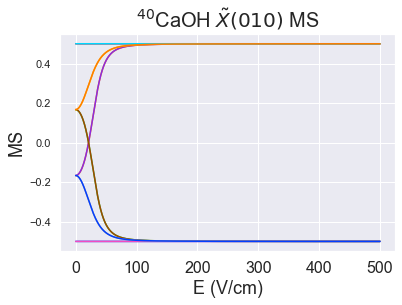

In [48]:
state = X010
dz = mu_010
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[1]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez010,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('MS',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + ' MS',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')

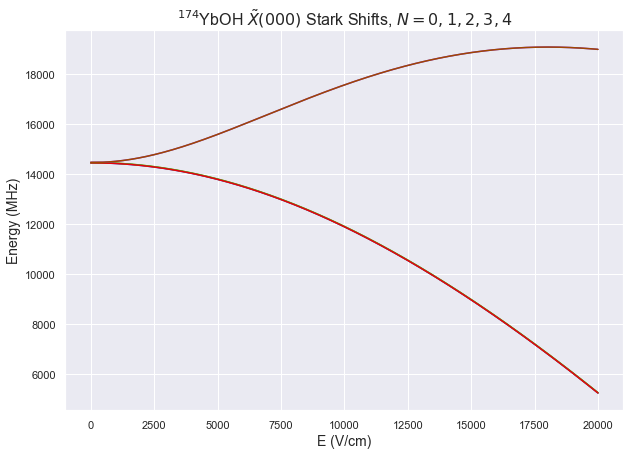

In [9]:
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':1}),plot=True)

In [10]:
# sns.set_style('ticks')

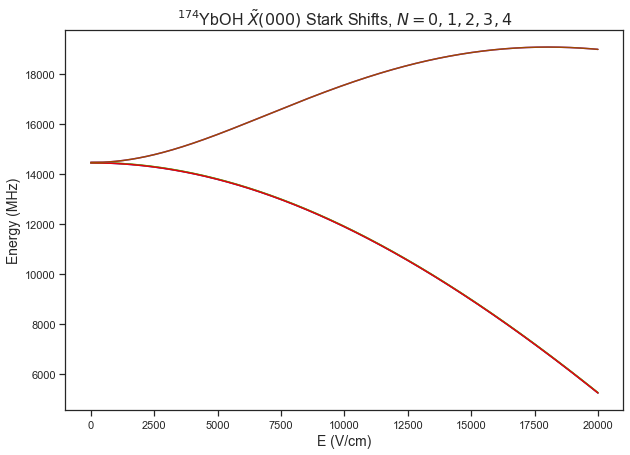

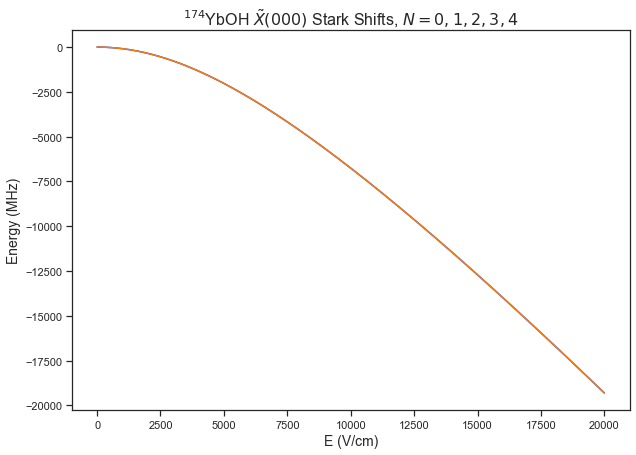

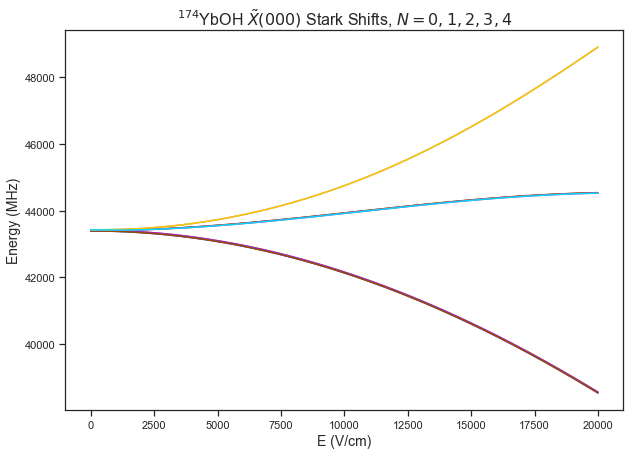

In [11]:
X000.update_params({'Gamma_SR':-34.7593})
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':1}),plot=True)
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':0}),plot=True)
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':2}),plot=True)

(0.0, 1000.0)

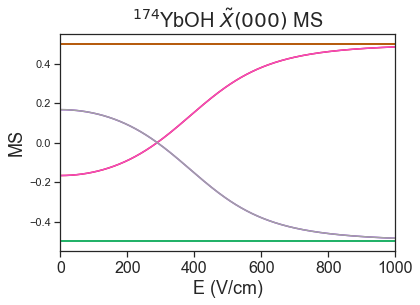

In [14]:
state = X000
dz = mu_000
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[0,1]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez000,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('MS',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + ' MS',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')
plt.xlim(0,1000)

(0.0, 1000.0)

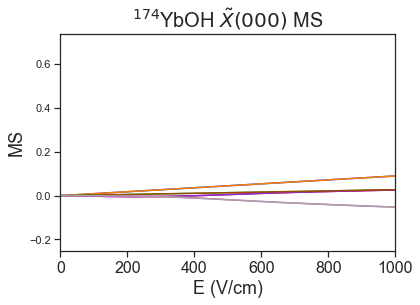

In [15]:
state = X000
dz = d_000
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[0,1]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez000,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('MS',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + ' MS',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')
plt.xlim(0,1000)

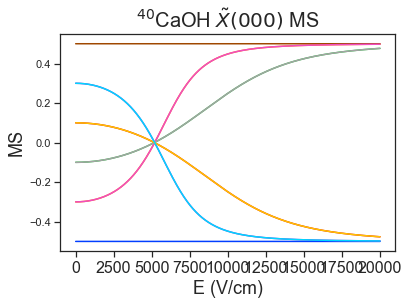

In [64]:
state = X000
dz = mu_000
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[2]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez000,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('MS',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + ' MS',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')

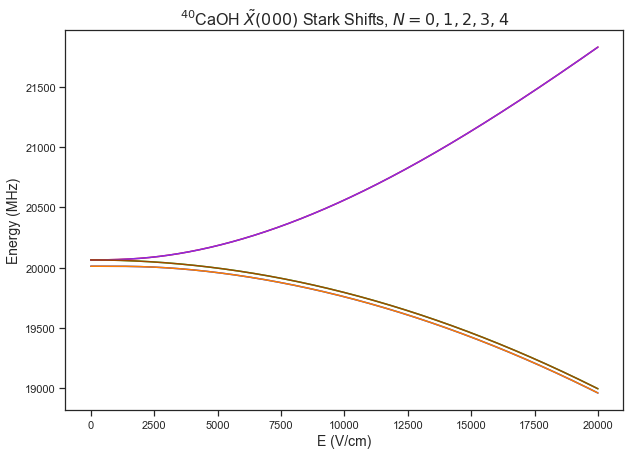

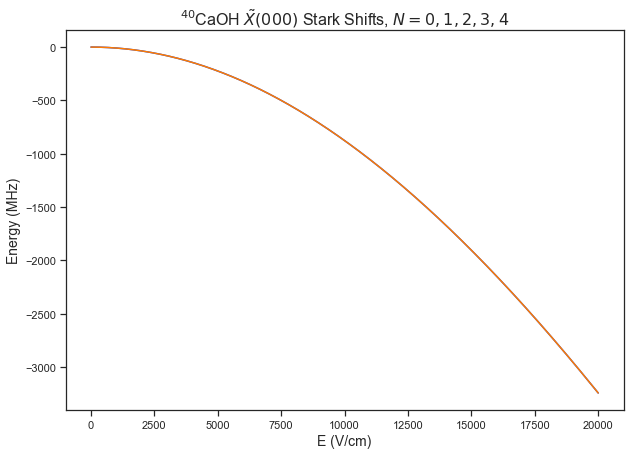

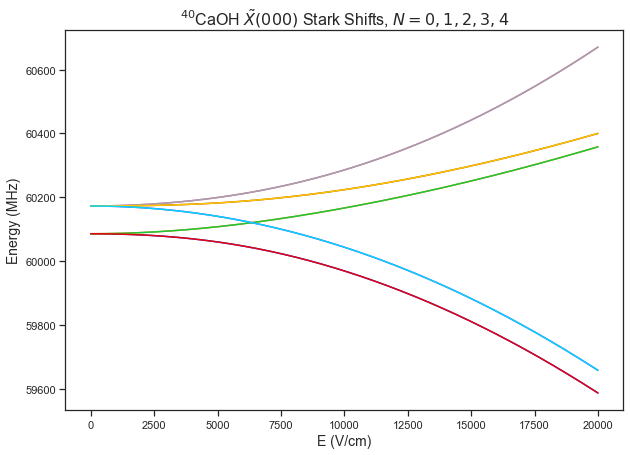

In [81]:
X000.update_params({'Gamma_SR':34.7593,'Be':10023.0841})
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':1}),plot=True)
# plt.ylim(19900,20100)
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':0}),plot=True)
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':2}),plot=True)

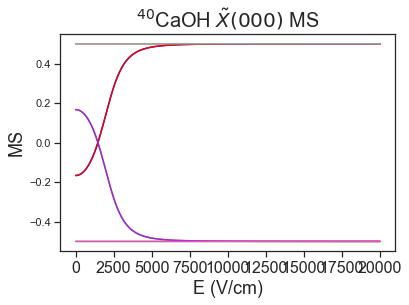

In [77]:
state = X000
dz = mu_000
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[0,1]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez000,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('MS',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + ' MS',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')

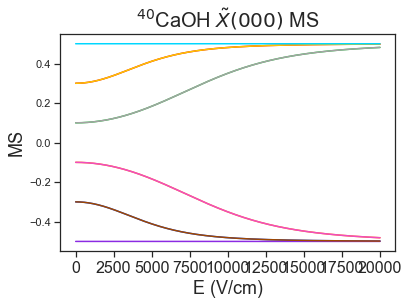

In [67]:
state = X000
dz = mu_000
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[2]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez000,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('MS',fontsize=18)
# plt.xscale('log')
plt.title(state.state_str + ' MS',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')

In [74]:
X010.update_params({'Gamma_SR':-34.7593})
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':1}),plot=True)
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':0}),plot=True)
X000.StarkMap(Ez000,1e-3,idx=X000.select_q({'N':2}),plot=True)

0.6658559999999999

In [78]:
X010.eigensystem(0,1e-3);
idx = X000.select_q({'N':0})
for i in idx:
    print('bBJ')
    display(Latex(X000.gen_state_str(i,basis='bBJ',thresh=0.05,label_q=['N','J','M'],round=8)))
    print('aBJ')
    display(Latex(X000.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['J','Sigma','P','M'],round=8)))
    print('decoupled')
    display(Latex(X000.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['M_N','M_S','M_F'], round=8)))
    print('')

bBJ


<IPython.core.display.Latex object>

aBJ


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


bBJ


<IPython.core.display.Latex object>

aBJ


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>

In [72]:
X010.eigensystem(0,1e-3);
idx = X000.select_q({'N':1})
for i in idx:
    print('bBJ')
    display(Latex(X000.gen_state_str(i,basis='bBJ',thresh=0.05,label_q=['N','J','M'],round=8)))
    print('aBJ')
    display(Latex(X000.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['J','Sigma','P','M'],round=8)))
    print('decoupled')
    display(Latex(X000.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['M_N','M_S','M_F'], round=8)))
    print('')

bBJ


<IPython.core.display.Latex object>

aBJ


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


bBJ


<IPython.core.display.Latex object>

aBJ


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


bBJ


<IPython.core.display.Latex object>

aBJ


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


bBJ


<IPython.core.display.Latex object>

aBJ


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


bBJ


<IPython.core.display.Latex object>

aBJ


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>


bBJ


<IPython.core.display.Latex object>

aBJ


<IPython.core.display.Latex object>

decoupled


<IPython.core.display.Latex object>

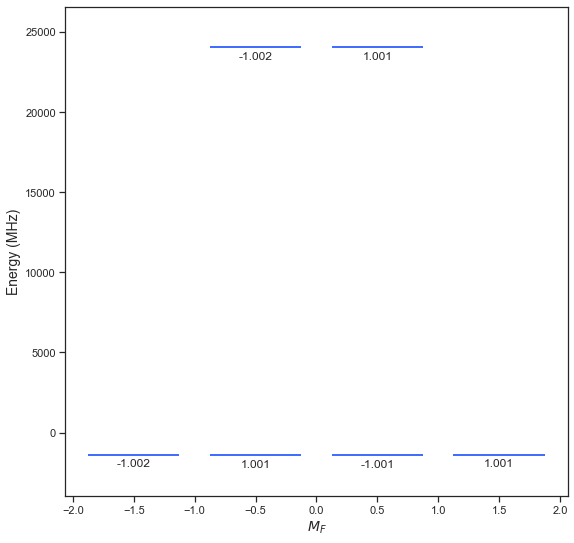

In [53]:
X000.display_g_eff(100000,1e-3,round=3,idx=X000.select_q({'N':1}))

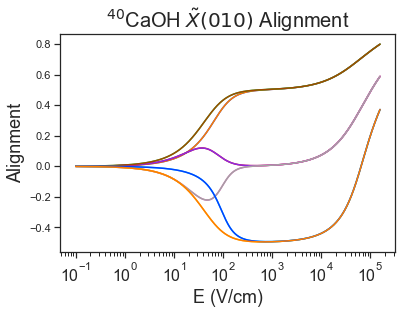

In [206]:
state = X010
dz = d_010
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':1}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez,dipole)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('Alignment',fontsize=18)
plt.xscale('log')
plt.title(state.state_str + ' Alignment',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')

(1, 10000.0)

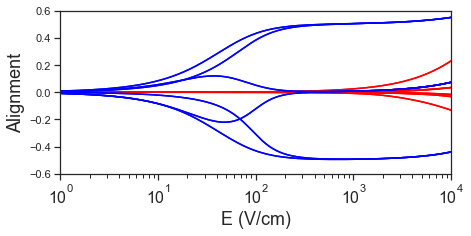

In [210]:
state = X000
dz = d_000
plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':[0,1,2]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez,dipole,color='red')
    
state = X010
dz = d_010
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':1}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez,dipole,color='blue')
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('Alignment',fontsize=18)
plt.xscale('log')
# plt.title(state.state_str + ' Alignment',fontsize=20)
plt.xticks(fontsize=16);
plt.ylim(-0.6,0.6)
plt.xlim(1,1e4)

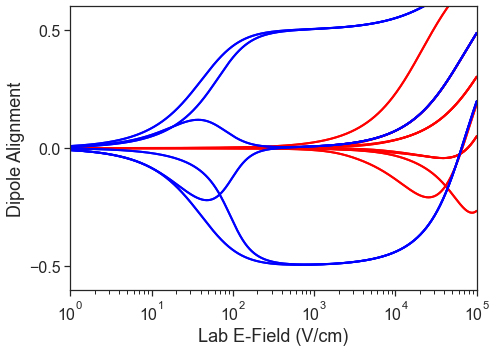

In [224]:
state = X000
dz = d_000
plt.figure(figsize=(7,5))
# alpha=0.2
for i in state.select_q({'N':[0,1,2]}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez,dipole,color='red',linewidth=2)
    
state = X010
dz = d_010
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':1}):
    dipole = np.diagonal(state.evecs_E[:,i,:]@dz@state.evecs_E[:,i,:].T)
    plt.plot(Ez,dipole,color='blue',linewidth=2)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('Lab E-Field (V/cm)',fontsize=18)
plt.ylabel('Dipole Alignment',fontsize=18)
plt.xscale('log')
# plt.title(state.state_str + ' Alignment',fontsize=20)
plt.xticks(fontsize=16);
plt.ylim(-0.6,0.6)
plt.yticks([-0.5,0,0.5],fontsize=16)
plt.xlim(1,1e5);
plt.tight_layout()
plt.savefig('CaOH_X000_X010_alignment_vsElog.svg',bbox_inches='tight')

In [68]:
state = X010
# plt.figure(figsize=(7,3))
# alpha=0.2
for i in state.select_q({'N':1}):
    grad = np.gradient(state.evals_E.T[i])/(Ez[-1]-Ez[-2])/(1.465*0.503412)
    plt.plot(Ez,grad)
# plt.axvline(62,color='black',linestyle='--')
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel('Alignment',fontsize=18)
plt.title(state.state_str + ' Alignment',fontsize=20)
plt.xticks(fontsize=16);
# plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE.svg',bbox_inches='tight')

AttributeError: 'NoneType' object has no attribute 'T'

In [98]:
help(X010.gen_state_str)

Help on method gen_state_str in module Energy_Levels:

gen_state_str(vector_idx, evecs=None, basis=None, label_q=None, parity=False, single=False, thresh=0.01, show_coeff=True, new_line=False, round=None, frac='') method of Energy_Levels.MoleculeLevels instance



In [116]:
X010.eigensystem(1e2,1e-3);
display(Latex(X010.gen_state_str(0,basis='aBJ',thresh=0.05,label_q=['K','J','Sigma','P','M'],round=8)))
display(Latex(X010.gen_state_str(0,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'], round=8)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2],trap=False)
# X010.I_trap = 0.01324*1/4

In [5]:
B0 = 1e-4
E0 = 0
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
# X010.eigensystem(E0,B0);

In [775]:
N_idx = [X010.select_q({'N':N}) for N in [1]]

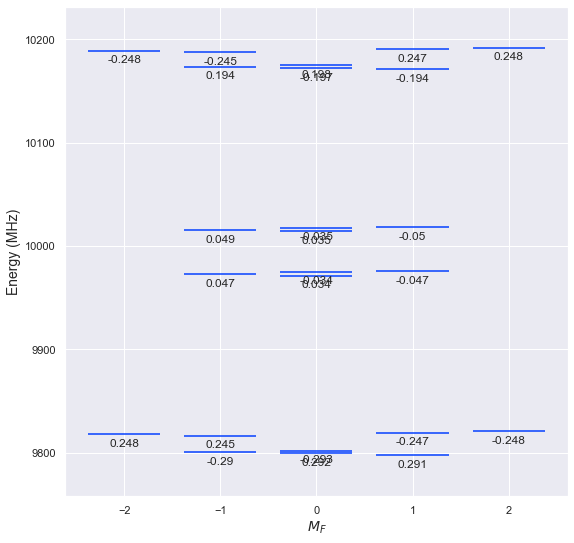

In [9]:
X010.display_PTV(500,1,'EDM',round=3)

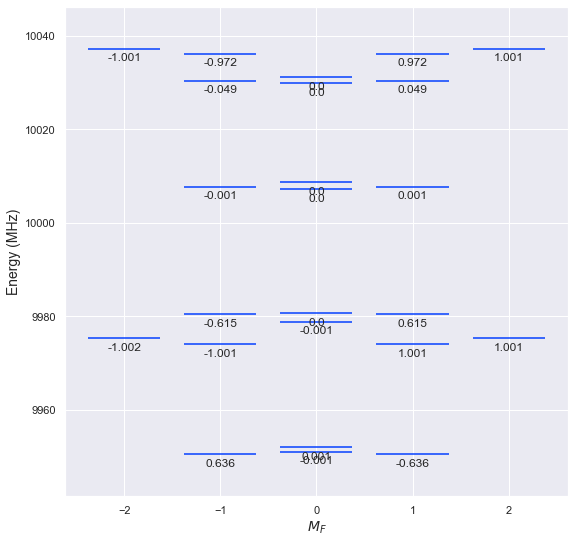

In [728]:
X010.display_g_eff(60.4,1e-4,round=3)

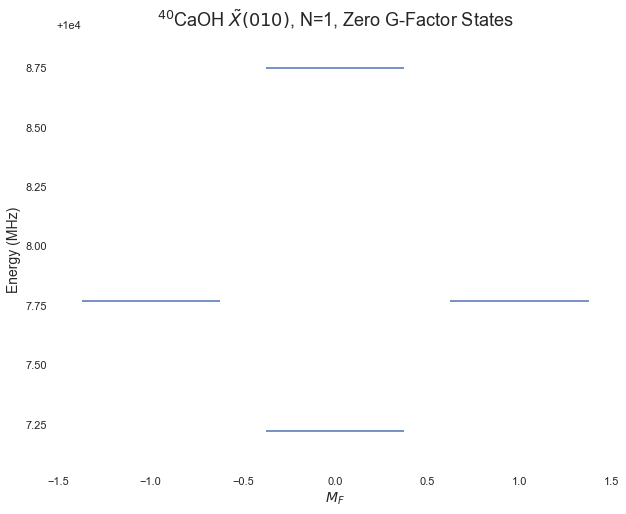

In [780]:
N=1
X010.display_levels(60.4,1e-3,'F',idx=X010.select_q({'N':1,'J':[1/2]},parity='+'),label=False,parity=True,label_q=[q for q in X010.q_str if q not in ['K']],label_off=0.05,figsize=(10,8),alt_label=False)
plt.title(X010.state_str+', N={}, Zero G-Factor States'.format(N,E0,B0),fontsize=18)
# plt.xlim(-3.5,3.5)
# plt.ylim(10000,10020)
plt.grid(False)
ax = plt.gca()
ax.set_facecolor('None')

# N=1
# X010.display_levels(0,1e-3,'J',idx=X010.select_q({'N':N,'J':1.5},parity='+'),parity=True,label_q=[q for q in X010.q_str if q not in ['K']],label_off=0.05,figsize=(10,8),alt_label=False)
# plt.title(X010.state_str+', N={}, E={} V/cm, B={} G'.format(N,E0,B0),fontsize=18)
# plt.xlim(-3.5,3.5)
# # plt.ylim(50000,50020)
# ax = plt.gca()
# ax.set_facecolor('None')
# plt.grid(False)

In [14]:
X010.eigensystem(0,1e-3)
zero1_idx = X010.select_q({'N':1,'J':[0.5],'F':[1],'M':[-1,1]},parity='+')
zero2_idx = X010.select_q({'N':1,'J':[1.5],'F':[1],'M':[-1,1]},parity='+')
zero1_idx_Mm = X010.select_q({'N':1,'J':[0.5],'F':[1],'M':[-1]},parity='+')
zero1_idx_Mp = X010.select_q({'N':1,'J':[0.5],'F':[1],'M':[1]},parity='+')
zero2_idx_Mm = X010.select_q({'N':1,'J':[1.5],'F':[1],'M':[-1]},parity='+')
zero2_idx_Mp = X010.select_q({'N':1,'J':[1.5],'F':[1],'M':[1]},parity='+')

In [28]:
zero1_idx

array([13, 14])

In [50]:
10004.476 - 10003.875

0.6010000000005675

In [779]:
10008.68663074 - 10007.70412553

0.9825052100004541

In [778]:
10007.70412553 - 10007.16512214


0.5390033899984701

In [777]:
X010.eigensystem(60,1e-3)
for i in [12,13,14,15]:
    X010.write_state(i)

E = 10007.16512214 MHz

 -0.14618941 |K=-1,N=1.0,J=0.5,F=0.0,M=0.0> 

 0.1462775 |K=1,N=1.0,J=0.5,F=0.0,M=0.0> 

 -0.62321481 |K=-1,N=1.0,J=0.5,F=1.0,M=0.0> 

 -0.62323409 |K=1,N=1.0,J=0.5,F=1.0,M=0.0> 

 0.19941466 |K=-1,N=1.0,J=1.5,F=1.0,M=0.0> 

 0.19940009 |K=1,N=1.0,J=1.5,F=1.0,M=0.0> 

 -0.22464868 |K=-1,N=1.0,J=1.5,F=2.0,M=0.0> 

 0.22454507 |K=1,N=1.0,J=1.5,F=2.0,M=0.0> 

E = 10007.70412553 MHz

 1e-07 |K=-1,N=1.0,J=0.5,F=1.0,M=-1.0> 

 1.7e-07 |K=1,N=1.0,J=0.5,F=1.0,M=-1.0> 

 -0.78414217 |K=-1,N=1.0,J=0.5,F=1.0,M=1.0> 

 -0.48133094 |K=1,N=1.0,J=0.5,F=1.0,M=1.0> 

 4e-08 |K=-1,N=1.0,J=1.5,F=1.0,M=-1.0> 

 -1e-08 |K=1,N=1.0,J=1.5,F=1.0,M=-1.0> 

 0.05990041 |K=-1,N=1.0,J=1.5,F=1.0,M=1.0> 

 -0.17929976 |K=1,N=1.0,J=1.5,F=1.0,M=1.0> 

 7e-08 |K=-1,N=1.0,J=1.5,F=2.0,M=-1.0> 

 -1e-08 |K=1,N=1.0,J=1.5,F=2.0,M=-1.0> 

 -0.05954141 |K=-1,N=1.0,J=1.5,F=2.0,M=1.0> 

 0.33787562 |K=1,N=1.0,J=1.5,F=2.0,M=1.0> 

E = 10007.70413691 MHz

 0.48132553 |K=-1,N=1.0,J=0.5,F=1.0,M=-1.0> 

 0.78

In [6]:
Bz = np.linspace(1e-4,100,5001)
Ez = np.linspace(0,200,2501)

In [19]:
X010.StarkMap(Ez,1e-6)
g_v_E=X010.g_eff_Map(step=1e-4)

In [10]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [11]:
sns.set_style('ticks',{'xtick.direction':'in','ytick.direction':'in','xtick.top':True,'xtick.bottom':False})

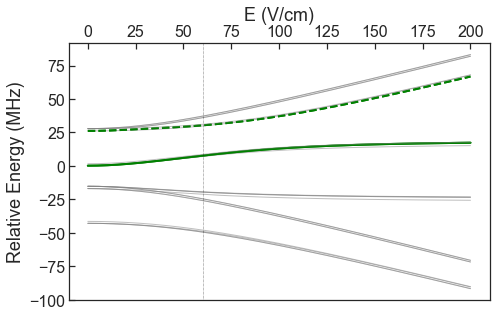

In [21]:
fig = plt.figure(figsize=(7,4.5))
# alpha=0.2
ax = fig.gca()
for i in range(len(X010.evals_E.T)):#range(len(X010_174.g_eff_E.T)):
#     plt.plot(Ez,X010.evals_E.T[i]-10000,linewidth=2)
    if i in zero1_idx or i in zero2_idx:
        alpha = 1
        if i in zero1_idx_Mp:
            color = 'green'
            linestyle='-'
        elif i in zero2_idx_Mp:
            color='green'
            linestyle='--'
        elif i in zero1_idx_Mm:
            color='green'
            linestyle='-'
        elif i in zero2_idx_Mm:
            color='green'
            linestyle='--'
        plt.plot(Ez,X010.evals_E.T[i]-10000,alpha=alpha,linewidth=2,color=color,linestyle=linestyle)
    else:
        alpha = 0.5
        plt.plot(Ez,X010.evals_E.T[i]-10000,alpha=alpha,linewidth=1,color='gray')
plt.axvline(60.4,color='black',linestyle='dotted',linewidth=0.5)
plt.xlabel('E (V/cm)',fontsize=18)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
plt.ylabel(r'Relative Energy (MHz)',fontsize=18)
# plt.title(X010.state_str + ' Stark Shifts',fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.tight_layout()
# plt.savefig('CaOH_N1_energy_vsE_v3.svg',bbox_inches='tight')

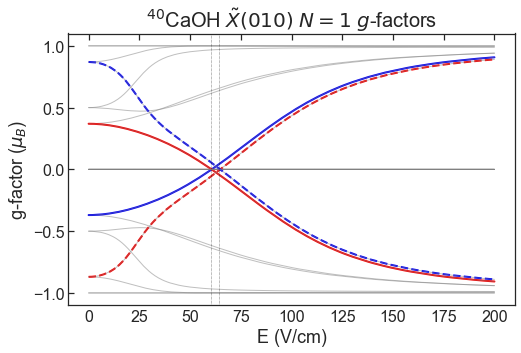

In [22]:
plt.figure(figsize=(8,5))
alpha=0.2
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.g_eff_E.T)):
    if i in zero1_idx or i in zero2_idx:
        alpha = 1
        if i in zero1_idx_Mp:
            color = 'blue'
            linestyle='-'
        elif i in zero2_idx_Mp:
            color='blue'
            linestyle='--'
        elif i in zero1_idx_Mm:
            color='red'
            linestyle='-'
        elif i in zero2_idx_Mm:
            color='red'
            linestyle='--'
        plt.plot(Ez,X010.g_eff_E.T[i],alpha=alpha,linewidth=2,color=color,linestyle=linestyle)
#     else:
    alpha = 0.5
    plt.plot(Ez,X010.g_eff_E.T[i],alpha=alpha,linewidth=1,color='gray')
plt.axvline(60.4,color='black',linestyle='dotted',linewidth=0.5)
plt.axvline(64.4,color='black',linestyle='dotted',linewidth=0.5)
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel(r'g-factor ($\mu_B$)',fontsize=18)
plt.title(X010.state_str + ' $N=1$ $\it{g}$-factors',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
# plt.savefig('CaOH_N1_gfactor_vsE_v2.svg',bbox_inches='tight')

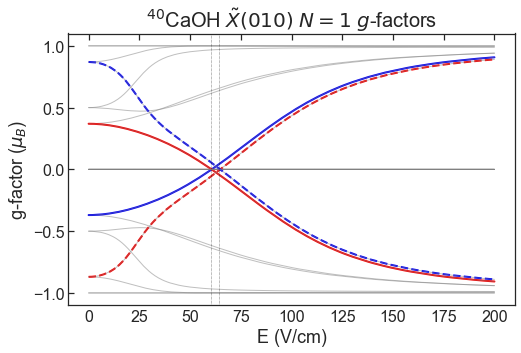

In [23]:
plt.figure(figsize=(8,5))
alpha=0.2
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.g_eff_E.T)):
    if i in zero1_idx or i in zero2_idx:
        alpha = 1
        if i in zero1_idx_Mp:
            color = 'blue'
            linestyle='-'
        elif i in zero2_idx_Mp:
            color='blue'
            linestyle='--'
        elif i in zero1_idx_Mm:
            color='red'
            linestyle='-'
        elif i in zero2_idx_Mm:
            color='red'
            linestyle='--'
        plt.plot(Ez,X010.g_eff_E.T[i],alpha=alpha,linewidth=2,color=color,linestyle=linestyle)
#     else:
    alpha = 0.5
    plt.plot(Ez,X010.g_eff_E.T[i],alpha=alpha,linewidth=1,color='gray')
plt.axvline(60.4,color='black',linestyle='dotted',linewidth=0.5)
plt.axvline(64.4,color='black',linestyle='dotted',linewidth=0.5)
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel(r'g-factor ($\mu_B$)',fontsize=18)
plt.title(X010.state_str + ' $N=1$ $\it{g}$-factors',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=16);
# plt.tight_layout()
plt.savefig('CaOH_N1_gfactor_vsE_v2.svg',bbox_inches='tight')

In [24]:
X010.PTV_Map('EDM','E',plot=False)

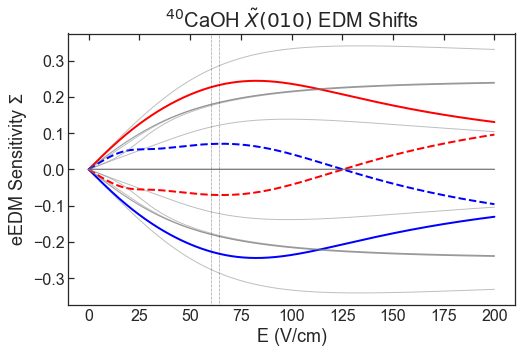

In [26]:
plt.figure(figsize=(8,5))
for i in range(len(X010.PTV_E.T)):#range(len(X010_174.g_eff_E.T)):
    if i in zero1_idx or i in zero2_idx:
        alpha = 1
        if i in zero1_idx_Mp:
            color = 'blue'
            linestyle='-'
        elif i in zero2_idx_Mp:
            color='blue'
            linestyle='--'
        elif i in zero1_idx_Mm:
            color='red'
            linestyle='-'
        elif i in zero2_idx_Mm:
            color='red'
            linestyle='--'
        plt.plot(Ez,X010.PTV_E.T[i],alpha=alpha,linewidth=2,color=color,linestyle=linestyle)
    else:
        alpha = 0.5
        plt.plot(Ez,X010.PTV_E.T[i],alpha=alpha,linewidth=1,color='gray')
plt.axvline(60.4,color='black',linestyle='dotted',linewidth=0.5)
plt.axvline(64.4,color='black',linestyle='dotted',linewidth=0.5)
plt.xlabel('E (V/cm)',fontsize=18)
plt.ylabel(r'eEDM Sensitivity $\Sigma$',fontsize=18)
plt.title(X010.state_str + ' EDM Shifts',fontsize=20);
plt.yticks([-0.3,-0.2,-0.1,0,0.1,0.2,0.3],fontsize=16)
plt.xticks(fontsize=16)
# plt.tight_layout()
# plt.savefig('CaOH_N1_EDM_vsE_v2.svg',bbox_inches='tight')

In [155]:
Bstep = 0.001
Bz = np.arange(0,3+Bstep,Bstep)
Bz[0]=1e-4
Estep = 0.25
Ez = np.arange(0,150+Estep,Estep)

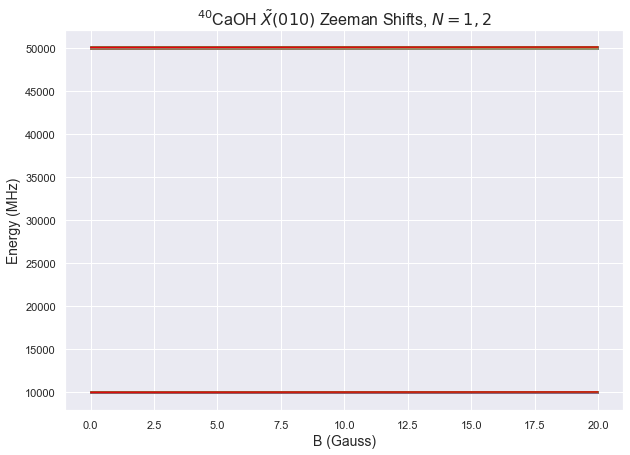

In [8]:
X010.ZeemanMap(np.linspace(1e-3,20,2000),0,plot=True,method='numpy')

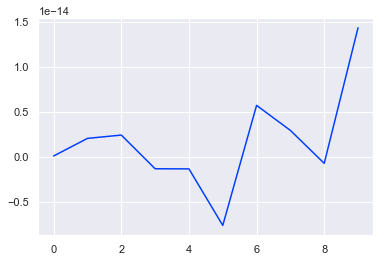

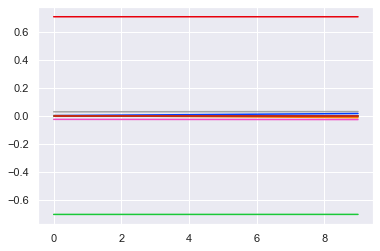

In [12]:
plt.plot(X010.evecs_B[:10,3,2]);
plt.figure()
plt.plot(X010.evecs_B[:10,6,:]);

Text(0.5, 1.0, 'CaOH X(010) N=2, J=3/2+ Zeeman Shifts, E=0 V/cm')

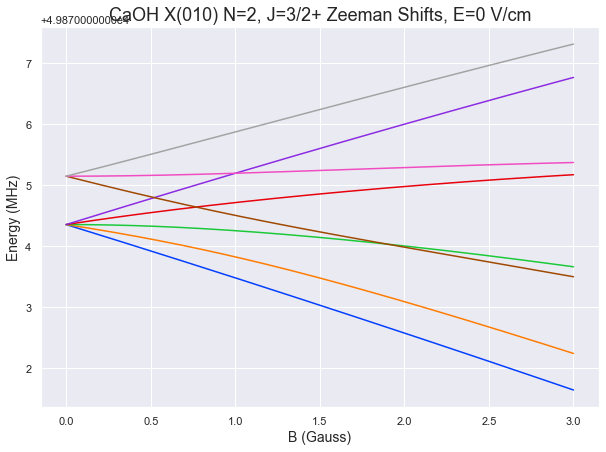

In [84]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'N':2,'J':1.5},parity='+'))
plt.title('CaOH X(010) N=2, J=3/2+ Zeeman Shifts, E=0 V/cm',fontsize=18)

Text(0.5, 1.0, 'CaOH X(010) N=1, J=1/2- Zeeman Shifts, E=0 V/cm')

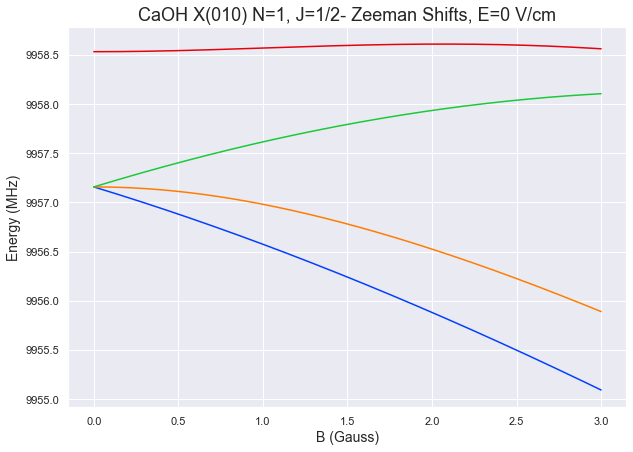

In [85]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'N':1,'J':0.5},parity='-'))
plt.title('CaOH X(010) N=1, J=1/2- Zeeman Shifts, E=0 V/cm',fontsize=18)

Text(0.5, 1.0, 'CaOH X(010) N=1,J=1/2- Stark Shifts')

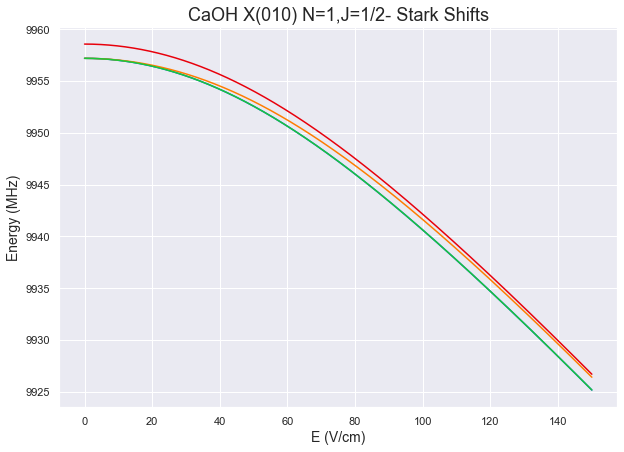

In [24]:
X010.StarkMap(Ez,1e-3,plot=True,idx = X010.select_q({'N':1,'J':0.5},parity='-'))
plt.title('CaOH X(010) N=1,J=1/2- Stark Shifts',fontsize=18)

Text(0.5, 1.0, 'CaOH X(010) N=1- Zeeman Shifts')

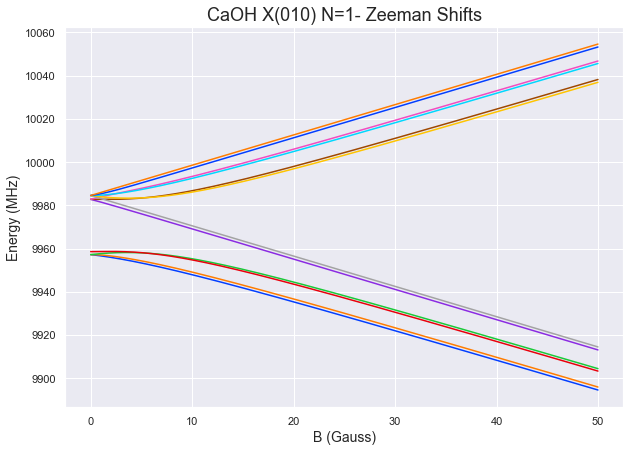

In [242]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'N':1},parity='-'))
plt.title('CaOH X(010) N=1- Zeeman Shifts',fontsize=18)

Text(0.5, 1.0, 'CaOH X(010) N=2+,J=3/2 Zeeman Shifts')

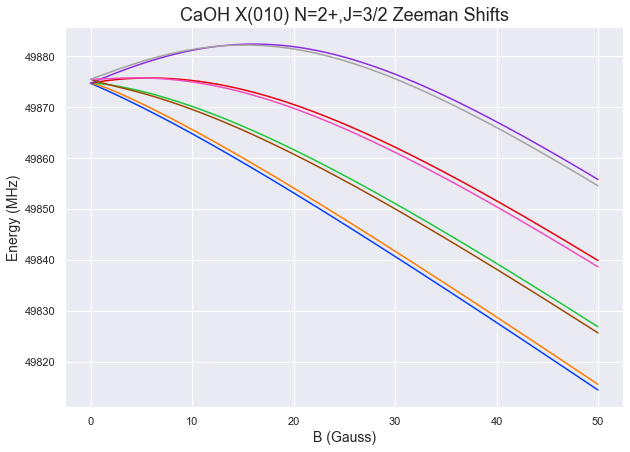

In [243]:
X010.ZeemanMap(Bz,0,plot=True,idx = X010.select_q({'N':2,'J':1.5},parity='+'))
plt.title('CaOH X(010) N=2+,J=3/2 Zeeman Shifts',fontsize=18)

In [105]:
B0 = 1e-3
E0 = 0
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X010.select_q({'N':1})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
#     print('Decoupled:')
#     display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case BbS:')
    display(Latex(X010.gen_state_str(i,basis='bBS',thresh=0.05,label_q=['K','G','N','F','M'],round=4)))
    print('Case B:')
    print('Parity=',X010.parities[i])
    display(Latex(X010.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11]




<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

In [13]:
B0 = 1e-3
E0 = 0
evals, evecs = X000.eigensystem(E0,B0,order=True,method='torch')
M0_idx = X000.select_q({'N':[0,1]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X000.evals0[i],4))+r'\:\mathrm{MHz}$'))
#     print('Decoupled:')
#     display(Latex(X000.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X000.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case BbS:')
    display(Latex(X000.gen_state_str(i,basis='bBS',thresh=0.05,label_q=['K','G','N','F','M'],round=4)))
    print('Case B:')
    print('Parity=',X000.parities[i])
    display(Latex(X000.gen_state_str(i,thresh=0.0005,round=4)))
    print('\n')

[0 1 2 3 4 5]




<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case BbS:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

In [282]:
E0=50
B0=1e-4
TDM0 = 1.465*Calculate_TDMs(0,N1,N2,E0,B0,[0])
# TDMp = 1.465*Calculate_TDMs(1,X010,X010,E0,B0)
# TDMm = 1.465*Calculate_TDMs(-1,X010,X010,E0,B0)
# TDMx = -1/np.sqrt(2)*(TDMp - TDMm)

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


In [283]:
def l2s(inputlist):
      """
      Convert a flatten list to a list of slices:
      test = [0,2,3,4,5,6,12,99,100,101,102,13,14,18,19,20,25]
      list_to_slices(test)
      -> [(0, 0), (2, 6), (12, 14), (18, 20), (25, 25), (99, 102)]
      """
      inputlist.sort()
      pointers = np.where(np.diff(inputlist) > 1)[0]
      pointers = zip(np.r_[0, pointers+1], np.r_[pointers, len(inputlist)-1])
      slices = [(inputlist[i], inputlist[j]+1) for i, j in pointers]
      return slices

In [286]:
N1_all = N1.select_q({'N':1,'F':0},parity='-')
N2_all = N2.select_q({'N':2,'M':0},parity='+')

In [289]:
N2s

(4, 5)

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_20532/4255074159.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mat, ax=ax,fraction=0.015, pad=0.05)


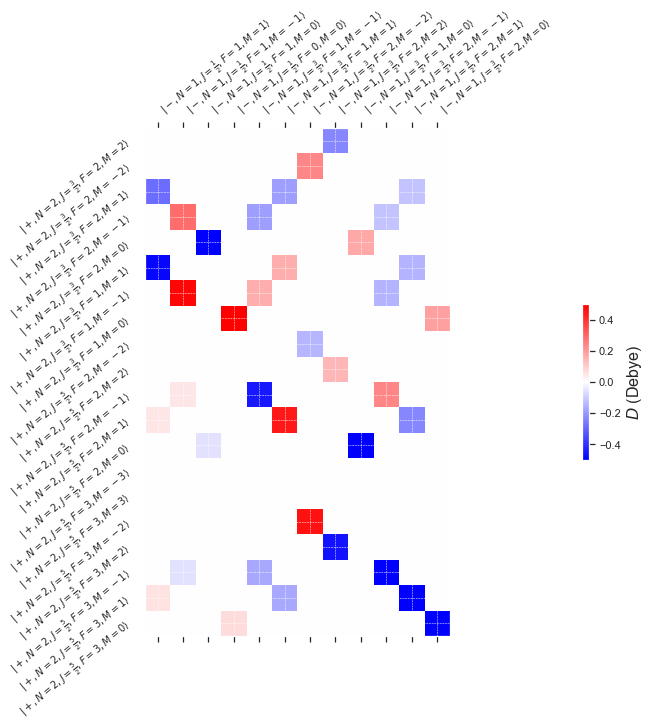

In [290]:
fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
# ax.set_aspect('equal')
N1_all = N1.select_q({'N':1},parity='-')
N2_all = N2.select_q({'N':2},parity='+')
N1s = l2s(N1_all)[0]
N2s = l2s(N2_all)[0]
N1l = np.arange(*N1s)
N2l = np.arange(*N2s)
log=False
BR_plot = TDM0 #convert MHz/V/cm to Debye
if log:
    BR_plot=np.log10(BR_plot)
    vmin = -10
    vmax = 0
else:
    vmin=None
    vmax = None
#     log_BR = np.copy(BR0)
#     for i,val1 in enumerate(log_BR):
#         for j,val2 in enumerate(val1):
#             if val2 !=0:
#                 log_BR[i,j] = np.log10(val2)
#     BR_plot = log_BR
mat = ax.matshow(BR_plot[slice(*N2s),slice(*N1s)],cmap=plt.get_cmap('bwr'),vmax = 0.5, vmin = -0.5)
y = np.arange(0,len(N2l))
x = np.arange(0,len(N1l))
ax.set_yticks(y)
ax.set_xticks(x)
y_labels = [N2.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N2l]
x_labels = [N1.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N1l]
# x_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N2]
# y_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N1]
ax.set_yticklabels(y_labels, rotation='40', fontsize=12, ha='right')
ax.set_xticklabels(x_labels, rotation='40', fontsize=12,ha='left')
ax.tick_params(axis='both',labelsize=10,direction='out')
ax.grid(True,which='major',color='white',ls='--',linewidth=0.5)
ax.grid(False,which='minor')
(bot,top) = ax.get_ylim()
# ax.set_ylim(bot+0.5, top-0.5)
cbar = fig.colorbar(mat, ax=ax,fraction=0.015, pad=0.05)
cbar.set_label(label=r'$D$ (Debye)',size=16)
#ax.set_xlim(-0.5,x.size+0.5);

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_3440/1571935017.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mat, ax=ax,fraction=0.03, pad=0.0,extend='min')


Text(0.5, 1.0, '$|D|$ (Debye)')

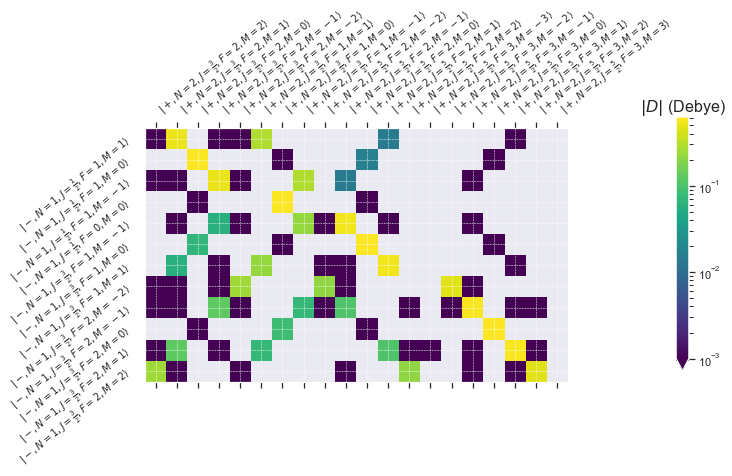

In [18]:
fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
# ax.set_aspect('equal')
N1_all = X010.select_q({'N':1},parity='-')
N2_all = X010.select_q({'N':2},parity='+')
N1s = l2s(N1_all)[0]
N2s = l2s(N2_all)[0]
N1 = np.arange(*N1s)
N2 = np.arange(*N2s)
log=False
BR_plot = abs(TDM0)
BR_plot[BR_plot<1e-8]=0
if log:
    BR_plot=np.log10(BR_plot)
    vmin = -10
    vmax = 0
else:
    vmin=None
    vmax = None
#     log_BR = np.copy(BR0)
#     for i,val1 in enumerate(log_BR):
#         for j,val2 in enumerate(val1):
#             if val2 !=0:
#                 log_BR[i,j] = np.log10(val2)
#     BR_plot = log_BR
mat = ax.matshow(BR_plot[slice(*N1s),slice(*N2s)],cmap=sns.color_palette("viridis", as_cmap=True),norm=colors.LogNorm(vmin=1e-3))#vmax = vmax, vmin = -3)
x = np.arange(0,len(N2))
y = np.arange(0,len(N1))
ax.set_yticks(y)
ax.set_xticks(x)
x_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N2]
y_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['N','J','F','M']) for i in N1]
# x_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N2]
# y_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N1]
ax.set_yticklabels(y_labels, rotation='40', fontsize=12, ha='right')
ax.set_xticklabels(x_labels, rotation='40', fontsize=12,ha='left')
ax.tick_params(axis='both',labelsize=10,direction='out')
ax.grid(True,which='major',color='white',ls='--',linewidth=0.5)
ax.grid(False,which='minor')
(bot,top) = ax.get_ylim()
# ax.set_ylim(bot+0.5, top)
cbar = fig.colorbar(mat, ax=ax,fraction=0.03, pad=0.0,extend='min')
cbar.ax.set_title(label=r'$|D|$ (Debye)',size=16,rotation=0)
#ax.set_xlim(-0.5,x.size+0.5);

In [9]:
from tabulate import tabulate

In [22]:
header_N21 = ['Transition','Estimated Frequency (GHz)','Dipole Moment (D)']
table_N21=[]
N1_p = X010.select_q({'N':1,'J':0.5},parity='+')
N2_n = X010.select_q({'N':2,'J':1.5},parity='-')
dz = abs(TDM0)
factor = 10.207 #pi condition for gaussian pulse with FWHM t expressed in us*Debye*sqrt(uW/cm^2)
for i in N2_n:
    EN2 = X010.evals0[i]
    vecN2 = X010.evecs0[i]
    qi = abs(vecN2).argmax()
    for j in N1_p:
        EN1 = X010.evals0[j]
        vecN1 = X010.evecs0[j]
        qj = abs(vecN1).argmax()
        dE = np.round((EN2 - EN1)/1000,7)
        dipole = np.round(dx[j,i],3)
        if dipole >1e-3:
            Ne,Je,Fe,Me = [X010.q_numbers[_q][qi] for _q in ['N','J','F','M']]
            if Me<0:
                continue
            Pe = {1:'+',-1:'-'}[X010.parities[i]]
            Ng,Jg,Fg,Mg = [X010.q_numbers[_q][qj] for _q in ['N','J','F','M']]
            Pg = {1:'+',-1:'-'}[X010.parities[j]]
            t_str = '(N={Ne}{Pe},J={Je},F={Fe},M={Me})->(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
            e_str = str(dE)
            d_str = str(dipole)
            table_N21.append([t_str,e_str,d_str])
#             intensity = np.round((factor/(100)/dipole)**2,5)
#             display(Latex(r'$D\, (\mathrm{Debye}) = '+str(strength)+r'$'))
#             display(Latex(r'For $\tau_{\mathrm{FWHM}} = 100 \,\mathrm{\mu s}$, $I_{\pi}='+str(intensity)+ r'\,\mathrm{\mu W/cm^2}$'))
#             display(Latex(r'$\Delta E =' +str(dE)+ r'\,\mathrm{MHz}$'))
#             display(Latex(r'$|e \rangle = $' + X010.gen_state_str(i,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             display(Latex(r'$|g \rangle = $' + X010.gen_state_str(j,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             print('\n')

NameError: name 'dx' is not defined

In [23]:
header_N12 = ['Transition','Estimated Frequency (GHz)','Dipole Moment (D)']
table_N12=[]
N1_n = X010.select_q({'N':1,'J':0.5},parity='-')
N2_p = X010.select_q({'N':2,'J':1.5},parity='+')
dz = abs(TDM0)
factor = 10.207 #pi condition for gaussian pulse with FWHM t expressed in us*Debye*sqrt(uW/cm^2)
for i in N1_n:
    EN1 = X010.evals0[i]
    vecN1 = X010.evecs0[i]
    qi = abs(vecN1).argmax()
    for j in N2_p:
        EN2 = X010.evals0[j]
        vecN2 = X010.evecs0[j]
        qj = abs(vecN2).argmax()
        dE = np.round((EN2 - EN1)/2,7)
        dipole = np.round(dz[j,i],3)
        if dipole >1e-4:
            Ne,Je,Fe,Me = [X010.q_numbers[_q][qi] for _q in ['N','J','F','M']]
            if Me<0:
                continue
            Pe = {1:'+',-1:'-'}[X010.parities[i]]
            Ng,Jg,Fg,Mg = [X010.q_numbers[_q][qj] for _q in ['N','J','F','M']]
            Pg = {1:'+',-1:'-'}[X010.parities[j]]
            t_str = '(N={Ne}{Pe},J={Je},F={Fe},M={Me})->(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
            e_str = str(dE)
            d_str = str(dipole)
            table_N12.append([t_str,e_str,d_str])
#             intensity = np.round((factor/(100)/dipole)**2,5)
#             display(Latex(r'$D\, (\mathrm{Debye}) = '+str(strength)+r'$'))
#             display(Latex(r'For $\tau_{\mathrm{FWHM}} = 100 \,\mathrm{\mu s}$, $I_{\pi}='+str(intensity)+ r'\,\mathrm{\mu W/cm^2}$'))
#             display(Latex(r'$\Delta E =' +str(dE)+ r'\,\mathrm{MHz}$'))
#             display(Latex(r'$|e \rangle = $' + X010.gen_state_str(i,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             display(Latex(r'$|g \rangle = $' + X010.gen_state_str(j,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             print('\n')

In [24]:
table_N21 = sorted(table_N21,key=lambda x: x[1])
table_N12 = sorted(table_N12,key=lambda x: x[1])

In [25]:
print('All transitions at E=0 V/cm, B=1 mG. Only considering z-polarized light. Transitions with M<0 states are ommitted.')
print('Parameters taken from Fletcher et al. 1995.\nAll errors are dominated by hyperfine uncertainty. If hyperfine is within 10% of X(000), errors are ~<300 kHz\n')
# print(tabulate(table_N21,headers=header_N21,floatfmt=('','.6f','.3f')))
# print()
print(tabulate(table_N12,headers=header_N12,floatfmt=('','.6f','.3f')))

All transitions at E=0 V/cm, B=1 mG. Only considering z-polarized light. Transitions with M<0 states are ommitted.
Parameters taken from Fletcher et al. 1995.
All errors are dominated by hyperfine uncertainty. If hyperfine is within 10% of X(000), errors are ~<300 kHz

Transition                                    Estimated Frequency (GHz)    Dipole Moment (D)
------------------------------------------  ---------------------------  -------------------
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=0)                 19958.456431                0.598
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=2,M=0)                 19958.747856                0.602
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=1)                 19958.747860                0.521
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=1,M=1)                 19959.143934                0.289


In [26]:
type(Ez)=='list'

False

In [27]:
d = Calculate_TDMs(0,X010,X010,0,10)

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


In [28]:
g_idx = X010.select_q({'N':1,'J':0.5},parity='-')

In [32]:
test = np.diag([1,2,3])
test[1,2]=-2
print(test)
v = np.array([0,0,1])
w = np.array([0,1,0])
print(test@v)
print(w@test)
print(w@test@v.T)
print(w@test@v)

[[ 1  0  0]
 [ 0  2 -2]
 [ 0  0  3]]
[ 0 -2  3]
[ 0  2 -2]
-2
-2


In [24]:
Bz[0]

0.001

In [235]:
for i,v in enumerate(np.arange(0,10)[::-1]):
    print(i)
    print(len(np.arange(10),to))

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [12]:
def testfunc(x,y(,a=2,b=3)):
    print(x*2+y**2-a**3+np.sqrt(b))
    
p=partial(testfunc,y=3,a=2)

In [14]:
testfunc(2,3,2,3)
p(2)

6.732050807568877
6.732050807568877


In [29]:
x = np.arange(0,10)
x.mean()

4.5

In [86]:
# def track_transition_E(state_g,qdict_g,state_e,qdict_e,Ez,B0,dipole='z',parity_g='-',parity_e='+',Debye=1.465):
#     tables = []
#     lines = []
#     g_idx = state_g.select_q(qdict_g,parity=parity_g)
#     e_idx = state_e.select_q(qdict_e,parity=parity_e)
#     for E0 in Ez:
#         print(E0)
#         if dipole=='z': 
#             TDM = Debye*Calculate_TDMs(0,state_g,state_e,E0,B0)
#         elif dipole=='x':
#             TDM = Debye*(-1/np.sqrt(2)*(Calculate_TDMs(1,state_g,state_e,E0,B0) - Calculate_TDMs(-1,state_g,state_e,E0,B0)))
#         elif dipole=='+':
#             TDM = Debye*Calculate_TDMs(1,state_g,state_e,E0,B0)
#         elif dipole=='-':
#             TDM = Debye*Calculate_TDMs(-1,state_g,state_e,E0,B0)
#         elif dipole=='all':
#             TDM = Debye*1/np.sqrt(3)*sum([Calculate_TDMs(p,state_g,state_e,E0,B0) for p in [0,1,-1]])
#         field_lines = []
#         field_table = []
#         for i in g_idx:
#             Eg = state_g.evals0[i]
#             vec_g = state_g.evecs0[i]
#             q_g = abs(vec_g).argmax()
#             for j in e_idx:
#                 Ee = state_e.evals0[j]
#                 vec_e = state_e.evecs0[j]
#                 q_e = abs(vec_e).argmax()
#                 dE = np.round((Ee - Eg)/2,7)
#                 strength = np.round(TDM[j,i],4)
#                 if strength >1e-4:
#                     Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
#                     Pe = {1:'+',-1:'-'}[state_e.parities[j]]
#                     Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
#                     Pg = {1:'+',-1:'-'}[state_g.parities[i]]
#                     t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me}))'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
#                     e_str = str(dE)
#                     d_str = str(strength)
#                     field_table.append([t_str,e_str,d_str])
#                     field_lines.append(dE)
#         lines.append(sorted(field_lines))
#         tables.append(sorted(field_table,key=lambda x: x[1]))
#     return lines,tables

def transitions_B(state_g,state_e,Bsample,dipole='z',Debye=1.465):
    if state_g.evecs_B is None:
        print('Run ZeemanMap on Ground State')
        return
    if state_e.evecs_B is None or not np.array_equiv(state_e.Bz,state_g.Bz):
        print('Run ZeemanMap on Excited State with same fields as Ground State')
        return
    print('Using E (V/cm) field of',state_g._Ez)
    gBz = state_g.Bz
    TDM_B = np.zeros((len(Bsample),state_e.size,state_g.size))
    dE_B = np.zeros((len(Bsample),state_e.size,state_g.size))
    t_str_B = np.empty_like(dE_B, dtype='object')
    for iB,B0 in enumerate(Bsample):
        idx = np.searchsorted(gBz,B0)
        B0 = gBz[idx]
        print(B0)
        TDM_func = partial(Calculate_TDM_evecs,G_evecs=state_g.evecs_B[idx],Ground=state_g,E_evecs = state_e.evecs_B[idx],Excited=state_e,q=[0])
        TDM_dict = {
            'z': TDM_func(0),
            '+': TDM_func(1),
            '-': TDM_func(-1),
                   }
        if dipole=='z' or dipole=='+' or dipole=='-':
            TDM = TDM_dict[dipole]
        elif 'x' in dipole:
            TDMx = -1/np.sqrt(2)*(TDM_dict['+']-TDM_dict['-'])
            if dipole=='x':
                TDM=TDMx
            elif dipole=='x+z' or dipole=='z+x':
                TDM = 1/np.sqrt(2)*(abs(TDMx)+abs(TDM_dict['z']))
        elif dipole=='all':
            TDM = 1/np.sqrt(3)*(TDM_dict['z']+TDM_dict['+']+TDM_dict['-'])
        else:
            TDM = 1/np.sqrt(3)*(abs(TDM_dict['z'])+abs(TDM_dict['+'])+abs(TDM_dict['-']))
        TDM*=Debye
        TDM_B[iB,:,:] = TDM
        for i in range(state_g.size):
            Eg = state_g.evals_B[idx][i]
            vec_g = state_g.evecs_B[0][i] #correlate with zero field state
            q_g = abs(vec_g).argmax()
            for j in range(state_e.size):
                Ee = state_e.evals_B[idx][j]
                vec_e = state_e.evecs_B[0][j]
                q_e = abs(vec_e).argmax()
                dE = (Ee - Eg)-39820
                dE_B[iB,j,i] = dE
                Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
                Pe = {1:'+',-1:'-'}[state_e.parities[j]]
                Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
                Pg = {1:'+',-1:'-'}[state_g.parities[i]]
                t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
                t_str_B[iB,j,i] = t_str
    return TDM_B,dE_B,t_str_B


def transitions_E(state_g,state_e,Esample,dipole='z',Debye=1.465):
    if state_g.evecs_E is None:
        print('Run StarkMap on Ground State')
        return
    if state_e.evecs_E is None or not np.array_equiv(state_e.Ez,state_g.Ez):
        print('Run StarkMap on Excited State with same fields as Ground State')
        return
    print('Using B (G) field of',state_g._Bz)
    gEz = state_g.Ez
    TDM_E = np.zeros((len(Esample),state_e.size,state_g.size))
    dE_E = np.zeros((len(Esample),state_e.size,state_g.size))
    t_str_E = np.empty_like(dE_E, dtype='object')
    for iE,E0 in enumerate(Esample):
        idx = np.searchsorted(gEz,E0)
        E0 = gEz[idx]
        print(E0)
        TDM_func = partial(Calculate_TDM_evecs,G_evecs=state_g.evecs_E[idx],Ground=state_g,E_evecs = state_e.evecs_E[idx],Excited=state_e,q=[0])
        TDM_dict = {
            'z': TDM_func(0),
            '+': TDM_func(1),
            '-': TDM_func(-1),
                   }
        if dipole=='z' or dipole=='+' or dipole=='-':
            TDM = TDM_dict[dipole]
        elif 'x' in dipole:
            TDMx = -1/np.sqrt(2)*(TDM_dict['+']-TDM_dict['-'])
            if dipole=='x':
                TDM=TDMx
            elif dipole=='x+z' or dipole=='z+x':
                TDM = 1/np.sqrt(2)*(abs(TDMx)+abs(TDM_dict['z']))
        elif dipole=='all':
            TDM = 1/np.sqrt(3)*(TDM_dict['z']+TDM_dict['+']+TDM_dict['-'])
        else:
            TDM = 1/np.sqrt(3)*(abs(TDM_dict['z'])+abs(TDM_dict['+'])+abs(TDM_dict['-']))
        TDM*=Debye
        TDM_E[iE,:,:] = TDM
        for i in range(state_g.size):
            Eg = state_g.evals_E[idx][i]
            vec_g = state_g.evecs_E[0][i] #correlate with zero field state
            q_g = abs(vec_g).argmax()
            for j in range(state_e.size):
                Ee = state_e.evals_E[idx][j]
                vec_e = state_e.evecs_E[0][j]
                q_e = abs(vec_e).argmax()
                dE = (Ee - Eg)-39820
                dE_E[iE,j,i] = dE
                Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
                Pe = {1:'+',-1:'-'}[state_e.parities[j]]
                Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
                Pg = {1:'+',-1:'-'}[state_g.parities[i]]
                t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
                t_str_E[iE,j,i] = t_str
    return TDM_E,dE_E,t_str_E

def print_table_E(Evals,TDM_E,dE_E,t_str_E,g_idx,e_idx,cut=True,thresh = 0.001,dipole='z'):
    header = ['Transition','Estimated Frequency (MHz-39820)','Dipole Moment (D)']
    all_table = []
    for iE in range(len(Evals)):
        print('\nE (V/cm) =',Evals[iE])
        print('Pol =',dipole)
        E_table = []
        for i in g_idx:
            for j in e_idx:
                _TDM = TDM_E[iE,j,i]
                _dE = dE_E[iE,j,i]
                _t_str = t_str_E[iE,j,i]
                if _dE<0:
                    continue
                if abs(_TDM)<thresh and cut:
                    continue
                E_table.append([_t_str,str(_dE),str(_TDM)])
        E_table = sorted(E_table,key=lambda x: x[1])
        print(tabulate(E_table,headers=header,floatfmt=('','.6f','.4f')))
        all_table.append(E_table)
    return all_table

def print_table_B(Bvals,TDM_B,dE_B,t_str_B,g_idx,e_idx,cut=True,thresh = 0.001,dipole='z'):
    header = ['Transition','Estimated Frequency (MHz-39820)','Dipole Moment (D)']
    all_table = []
    for iB in range(len(Bvals)):
        print('\nB (G) =',Bvals[iB])
        print('Pol =',dipole)
        B_table = []
        for i in g_idx:
            for j in e_idx:
                _TDM = TDM_B[iB,j,i]
                _dE = dE_B[iB,j,i]
                _t_str = t_str_B[iB,j,i]
                if _dE<0:
                    continue
                if abs(_TDM)<thresh and cut:
                    continue
                B_table.append([_t_str,str(_dE),str(_TDM)])
        B_table = sorted(B_table,key=lambda x: float(x[1]))
        print(tabulate(B_table,headers=header,floatfmt=('','.6f','.4f')))
        all_table.append(B_table)
    return all_table

def plot_B(Bvals,TDM_B,dE_B,g_idx=None,e_idx=None,thresh = 0.001,title=None,linescale=None,figure=None,**kwargs):
    if g_idx is None:
        g_idx = np.arange(0,TDM_B.shape[2])
    if e_idx is None:
        e_idx = np.arange(0,TDM_B.shape[1])
    if figure is None:
        fig,a = plt.subplots(figsize=(8,6))
    else:
        fig = figure
        a = fig.axes[0]
    for i in g_idx:
        for j in e_idx:
            linestyle='solid'
            _TDM = TDM_B[:,j,i]
            _dE = dE_B[:,j,i]
            if _dE.mean()<0:
                continue
            if abs(_TDM).mean()<thresh:
                continue
            if abs(_TDM).mean()<0.001:
                pass
#                 linestyle='dotted'
            scale_mean=abs(_TDM).mean()/1.465
            scale = 0.5*(abs(_TDM[1:])+abs(_TDM[:-1]))/1.465
            if linescale is None:
                a.plot(Bvals,_dE,linestyle=linestyle,**kwargs)
            else:
                filterByKey = lambda keys: {x: kwargs[x] for x in keys}
                pt_keys = ['marker','mfc','color']
                lc_keys = ['color']
                pt_kwargs = filterByKey(pt_keys)
                lc_kwargs = filterByKey(lc_keys)
                x = Bvals
                y = _dE
                lwidths = scale*linescale
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)
                lc = LineCollection(segments, linewidths=lwidths,**lc_kwargs)
                a.add_collection(lc)
                a.plot(Bvals,_dE,linestyle='None',**pt_kwargs)
    plt.xlabel('Magnetic Field (G)',fontsize=14)
    plt.ylabel('Transition Frequency (MHz-39820)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions'
#     plt.title(title,fontsize=18)
    plt.ticklabel_format(useOffset=False, style='plain')
    return

def plot_E(Evals,TDM_E,dE_E,g_idx=None,e_idx=None,thresh = 0.001,title=None,linescale=None,figure=None,**kwargs):
    if g_idx is None:
        g_idx = np.arange(0,TDM_E.shape[2])
    if e_idx is None:
        e_idx = np.arange(0,TDM_E.shape[1])
    if figure is None:
        fig,a = plt.subplots(figsize=(8,6))
    else:
        fig = figure
        a = fig.axes[0]
    for i in g_idx:
        for j in e_idx:
            linestyle='solid'
            _TDM = TDM_E[:,j,i]
            _dE = dE_E[:,j,i]
            if _dE.mean()<0:
                continue
            if abs(_TDM).mean()<thresh:
                continue
            if abs(_TDM).mean()<0.001:
                pass
#                 linestyle='dotted'
            scale_mean=abs(_TDM).mean()/1.465
            scale = 0.5*(abs(_TDM[1:])+abs(_TDM[:-1]))/1.465
            if linescale is None:
                a.plot(Evals,_dE,linestyle=linestyle,**kwargs)
            else:
                filterByKey = lambda keys: {x: kwargs[x] for x in keys}
                pt_keys = ['marker','mfc','color']
                lc_keys = ['color']
                pt_kwargs = filterByKey(pt_keys)
                lc_kwargs = filterByKey(lc_keys)
                x = Evals
                y = _dE
                lwidths = scale*linescale
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segments = np.concatenate([points[:-1], points[1:]], axis=1)
                lc = LineCollection(segments, linewidths=lwidths,**lc_kwargs)
                a.add_collection(lc)
                a.plot(Evals,_dE,linestyle='None',**pt_kwargs)
    plt.xlabel('Electric Field (V/cm)',fontsize=14)
    plt.ylabel('Transition Frequency (MHz-39820)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions'
#     plt.title(title,fontsize=18)
    plt.ticklabel_format(useOffset=False, style='plain')
    return


# def track_transition_B(state_g,qdict_g,state_e,qdict_e,Bscan,dipole='z',parity_g='-',parity_e='+',Debye=1.465):
#     tables = []
#     lines = []
#     g_idx = state_g.select_q(qdict_g,parity=parity_g)
#     e_idx = state_e.select_q(qdict_e,parity=parity_e)
#     if state_g.evecs_B is None:
#         print('Run ZeemanMap on Ground State')
#         return
#     if state_e.evecs_B is None:
#         print('Run ZeemanMap on Excited State')
#         return
#     for B0 in Bscan:
#         idx = np.searchsorted(Bz,B0)
#         B0 = Bz[idx]
#         print(B0)
#         if dipole=='z': 
#             TDM = Debye*Calculate_TDM_evecs(0,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='x':
#             TDM = Debye*(-1/np.sqrt(2)*sum([p*Calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e) for p in [-1,1]]))
#         elif dipole=='+':
#             TDM = Debye**Calculate_TDM_evecs(1,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='-':
#             TDM = Debye**Calculate_TDM_evecs(-1,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)
#         elif dipole=='all':
#             TDM = Debye*1/np.sqrt(3)*sum([(-1)**p*Calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e) for p in [0,1,-1]])
#         else:
#             TDM = Debye*1/np.sqrt(3)*sum([abs(Calculate_TDM_evecs(p,state_g.evecs_B[idx],state_g,state_e.evecs_B[idx],state_e)) for p in [0,1,-1]])
#         field_lines = []
#         field_table = []
#         for i in g_idx:
#             Eg = state_g.evals_B[idx][i]
#             vec_g = state_g.evecs_B[idx][i]
#             q_g = abs(vec_g).argmax()
#             for j in e_idx:
#                 Ee = state_e.evals_B[idx][j]
#                 vec_e = state_e.evecs_B[idx][j]
#                 q_e = abs(vec_e).argmax()
#                 dE = np.round((Ee - Eg)/2,7)
#                 strength = np.round(TDM[j,i],5)
#                 if abs(strength) >1e-5:
#                     Ne,Je,Fe,Me = [state_e.q_numbers[_q][q_e] for _q in ['N','J','F','M']]
#                     Pe = {1:'+',-1:'-'}[state_e.parities[j]]
#                     Ng,Jg,Fg,Mg = [state_g.q_numbers[_q][q_g] for _q in ['N','J','F','M']]
#                     Pg = {1:'+',-1:'-'}[state_g.parities[i]]
#                     t_str = '(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})->(N={Ne}{Pe},J={Je},F={Fe},M={Me})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
#                     e_str = str(dE)
#                     d_str = str(strength)
#                     field_table.append([t_str,e_str,d_str])
#                     field_lines.append(dE)
#         lines.append(field_lines)
#         tables.append(sorted(field_table,key=lambda x: x[1]))
#     return lines,tables

# def all_B_tracking(state,g_q,e_q,Bvals,dipole='z',reorder_missing=True,plot=True):
#     B_lines,B_tables = track_transition_B(state,g_q,state,e_q,Bvals,dipole)
#     header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
#     for i in range(len(Bvals)):
#         print('\nB (G) =',Bvals[i])
#         print('Pol =',dipole)
#         print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.4f')))
#     for i,B in enumerate(B_lines):
#         print('Number of lines:',len(B))
#     if plot:   
#         B_linesT = plot_B_tracking(Bvals,B_lines,dipole,reorder_missing)
#         return B_lines,B_tables,B_linesT
#     else:
#         return B_lines,B_tables

# def plot_B_tracking(Bvals,B_lines,B_tables=None,dipole='z',reorder_missing=True,title=None,figure=None,color=None,marker='o'):
#     nlast = len(B_lines[-1])
#     for i,B in enumerate(B_lines):
#         while len(B)<nlast:
#             if reorder_missing:
#                 B_lines[i].append(B_lines[i][-1])
#             else:
#                 nlast=len(B)
#     BT = list(zip(*B_lines))
#     if figure is None:
#         plt.figure(figsize=(8,6))
#     else:
#         plt.figure(figure)
#     for i,line in enumerate(BT):
#         linestyle='solid'
#         if B_tables is not None:
#             strength = [float(B_tables[b][i][-1]) for b in range(1,len(B_tables))]
#             strength_avg = sum(strength)/(len(strength))
#             if strength_avg<0.05:
#                 linestyle='dotted'
#         if color is None:
#             plt.plot(Bvals,line,marker=marker,mfc='white',linestyle=linestyle)
#         else:
#             plt.plot(Bvals,line,marker=marker,mfc='white',linestyle=linestyle,color=color)
#     plt.xlabel('Magnetic Field (G)',fontsize=14)
#     plt.ylabel('Transition Frequency (MHz/2)',fontsize=14)
#     if title is None:
#         title = 'CaOH Microwave Transitions, {} Pol'.format(dipole)
#     plt.title(title,fontsize=18)
#     plt.ticklabel_format(useOffset=False, style='plain')
#     return BT

In [88]:
Bscan = np.linspace(2,3,13)
# Bscan[0]=1e-3
print(Bscan)

Escan = np.linspace(0,100,11)
print(Escan)

[2.      2.08333 2.16667 2.25    2.33333 2.41667 2.5     2.58333 2.66667
 2.75    2.83333 2.91667 3.     ]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [16]:
N1.ZeemanMap(Bz,0,plot=False)

NameError: name 'N1' is not defined

In [8]:
plt.figure(figsize=(10,7))
idx = N1.select_q({'J':0.5,'F':1},parity='-')
for (i,trace) in enumerate(N1.evals_B.T[idx]):
    plt.plot(Bz,trace)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Zeeman Shifts, $N=1-$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(N1.evals_B.T[idx]):
    grad = np.gradient(trace)/abs(Bz[-1]-Bz[-2])
    plt.plot(Bz,grad)
    print(i,grad[0])
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Magnetization, $N=1-$',fontsize=16);

NameError: name 'N1' is not defined

<Figure size 720x504 with 0 Axes>

In [89]:
N1 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
N2 = MoleculeLevels.initialize_state('CaOH','40','X010',[2],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
Nall = MoleculeLevels.initialize_state('CaOH','40','X010',[1,2],M_values = 'all',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
Bstep = 0.001
Bz = np.arange(0,6+Bstep,Bstep)
Bz[0]=1e-4
Estep = 0.25
Ez = np.arange(0,150+Estep,Estep)
N1.ZeemanMap(Bz,0,plot=False)
N2.ZeemanMap(Bz,0,plot=False)
N1.StarkMap(Ez,1e-4,plot=False)
N2.StarkMap(Ez,1e-4,plot=False)
Nall.ZeemanMap(Bz,0,plot=False)
Nall.StarkMap(Ez,1e-4,plot=False)

In [75]:
Bscan = np.linspace(0,6,13)
Bscan[0]=1e-3
print(Bscan)

Escan = np.linspace(0,100,11)
print(Escan)

[0.001 0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
 6.   ]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


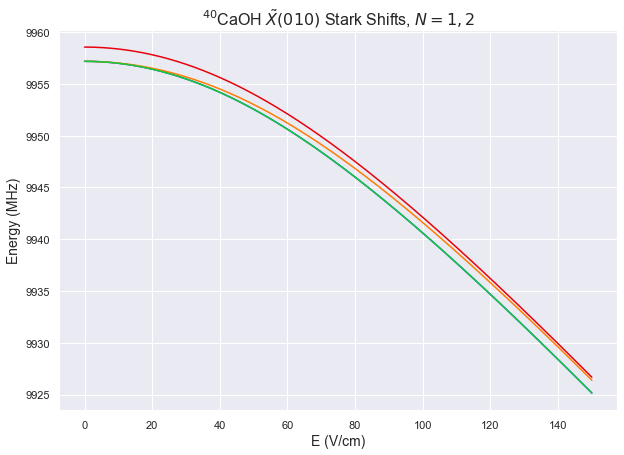

In [18]:
Nall.StarkMap(Ez,1e-3,plot=True,idx=Nall.select_q({'N':1,'J':0.5},parity='-'))

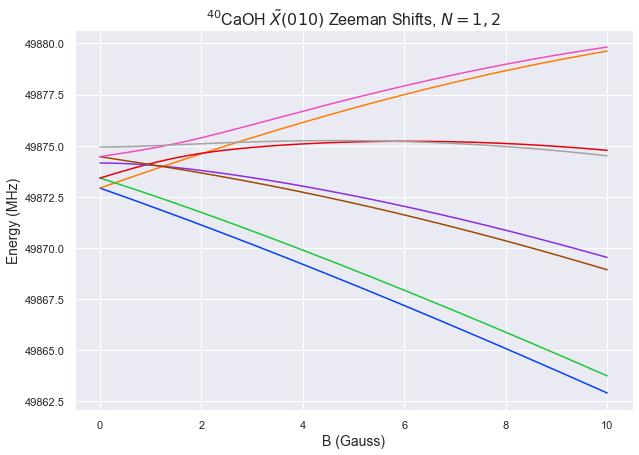

In [106]:
Nall.ZeemanMap(Bz,60.8,plot=True,idx=Nall.select_q({'N':2,'J':1.5},parity='+'))

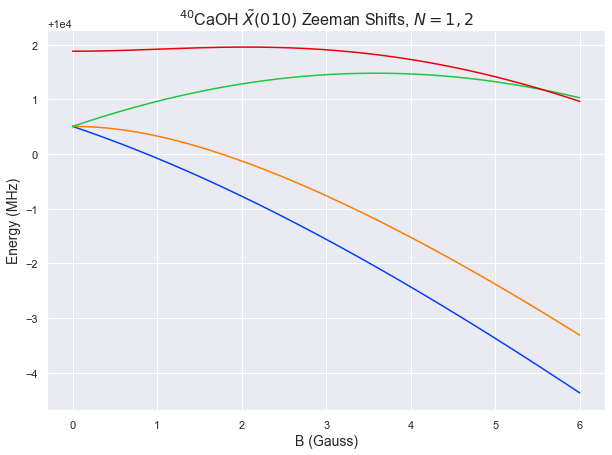

In [61]:
Nall.ZeemanMap(Bz,0,plot=True,idx=Nall.select_q({'N':1,'J':0.5},parity='+'))

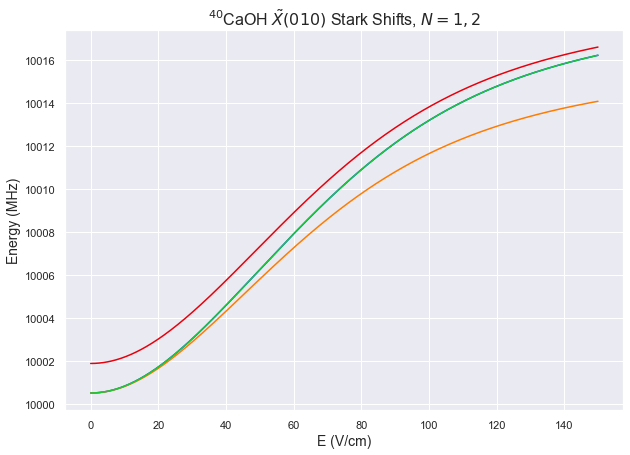

In [96]:
Nall.StarkMap(Ez,1e-4,plot=True,idx=Nall.select_q({'N':1,'J':0.5},parity='+'))

In [23]:
Trans_B = {}
for _B in Bscan:
    Nall.StarkMap(Ez,_B,plot=False)
    Trans_B[_B] = {'all': transitions_E(Nall,Nall,Escan,dipole='abs',Debye=1.465),
                   'x': transitions_E(Nall,Nall,Escan,dipole='x',Debye=1.465),
                   'z': transitions_E(Nall,Nall,Escan,dipole='z',Debye=1.465),
                   'x+z': transitions_E(Nall,Nall,Escan,dipole='x+z',Debye=1.465),
                  }
#output of transitions_E is TDM_E, dE_E, table_E

Using B (G) field of 0.001
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully conve

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
40.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
50.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
80.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to 

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
50.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using B (G) field of 0.75
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted 

10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
40.0
Successfully converted eigenvectors from bBJ

50.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
80.0
Successfully converted eigenvectors from bBJ

90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using B (G) field of 1.0
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully conver

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
40.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
80.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using B (G) field of 1.5
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted e

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
40.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
50.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
80.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using B (G) field of 2.0
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted ei

30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
40.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
50.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ

70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
80.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bB

Using B (G) field of 2.5
0.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully convert

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
40.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
50.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
80.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to 

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
30.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
50.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
60.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
70.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to a

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
90.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
100.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


In [90]:
Trans_E = {}
for _E in [0]:
#     N1.ZeemanMap(Bz,_E,plot=False)
#     N2.ZeemanMap(Bz,_E,plot=False)
    Nall.ZeemanMap(Bz,_E,plot=False)
    Trans_E[_E] = {'all': transitions_B(Nall,Nall,Bscan,dipole='abs',Debye=1.465),
                   'x': transitions_B(Nall,Nall,Bscan,dipole='x',Debye=1.465),
                   'z': transitions_B(Nall,Nall,Bscan,dipole='z',Debye=1.465),
                   'x+z': transitions_B(Nall,Nall,Bscan,dipole='x+z',Debye=1.465),
                  }
#     Trans_E[_E] = {'all': transitions_B(N1,N2,Bscan,dipole='abs',Debye=1.465),
#                    'x': transitions_B(N1,N2,Bscan,dipole='x',Debye=1.465),
#                    'z': transitions_B(N1,N2,Bscan,dipole='z',Debye=1.465),
#                    'x+z': transitions_B(N1,N2,Bscan,dipole='x+z',Debye=1.465),
#                   }
#output of transitions_B is TDM_B, dE_B, table_B

Using E (V/cm) field of 0
2.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.084
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.1670000000000003
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.25
Succ

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Using E (V/cm) field of 0
2.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.084
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.1670000000000003
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfu

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
3.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


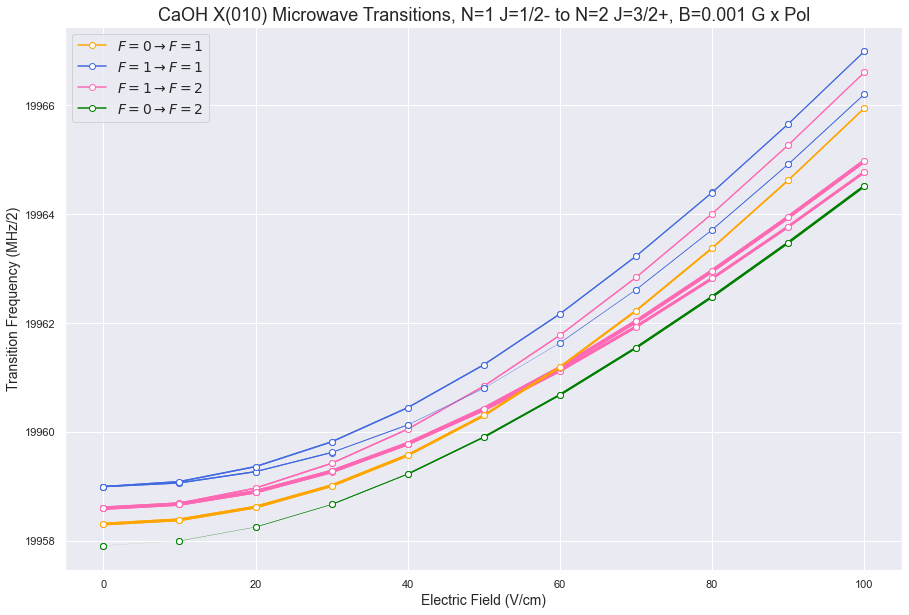

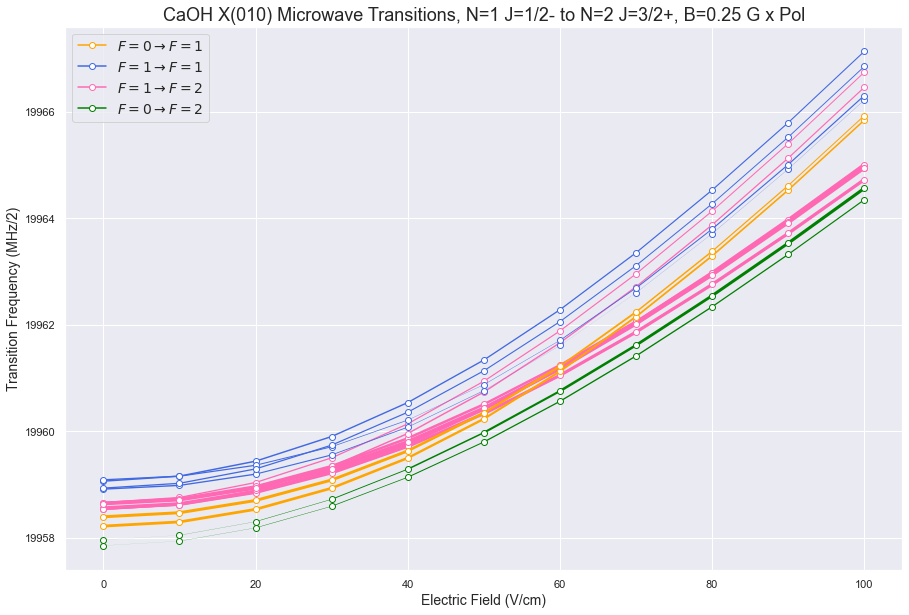

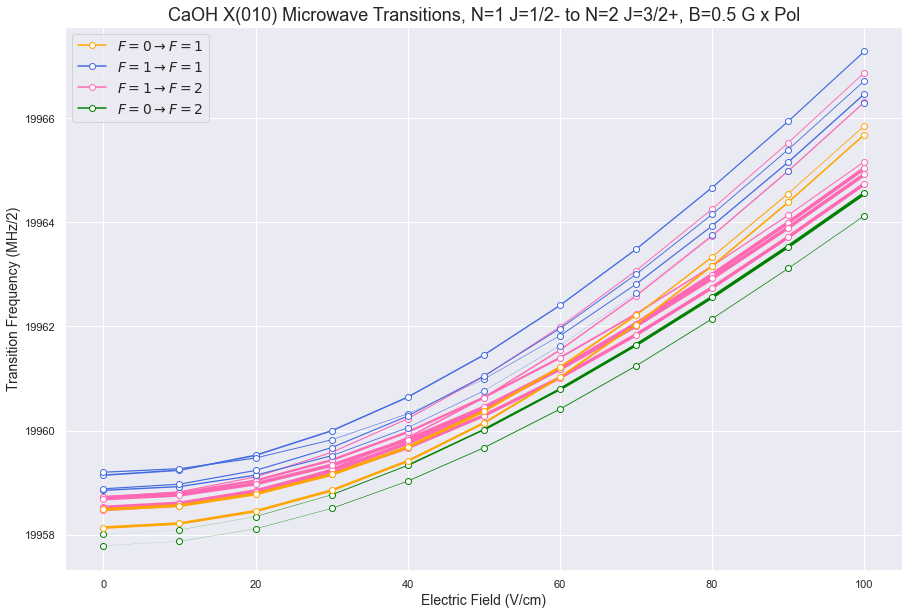

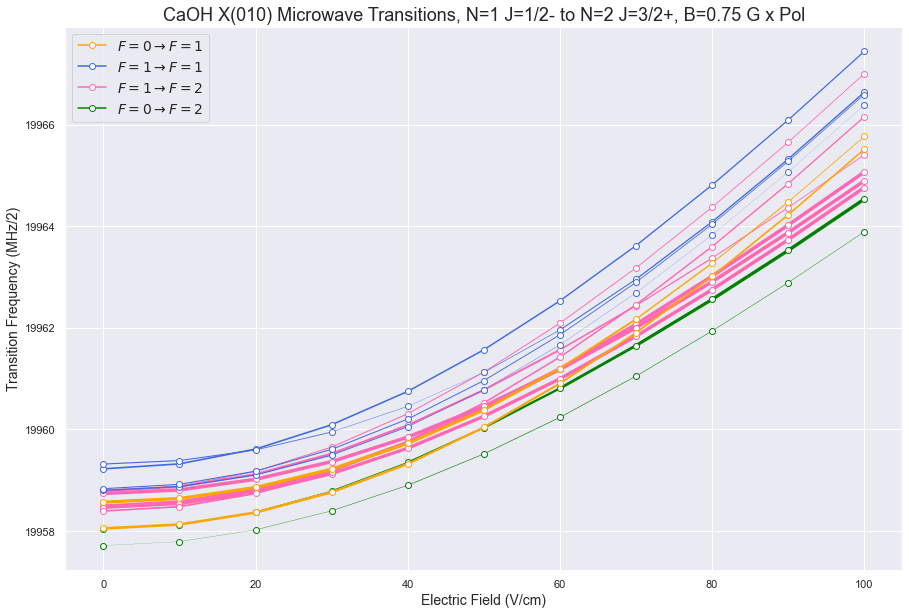

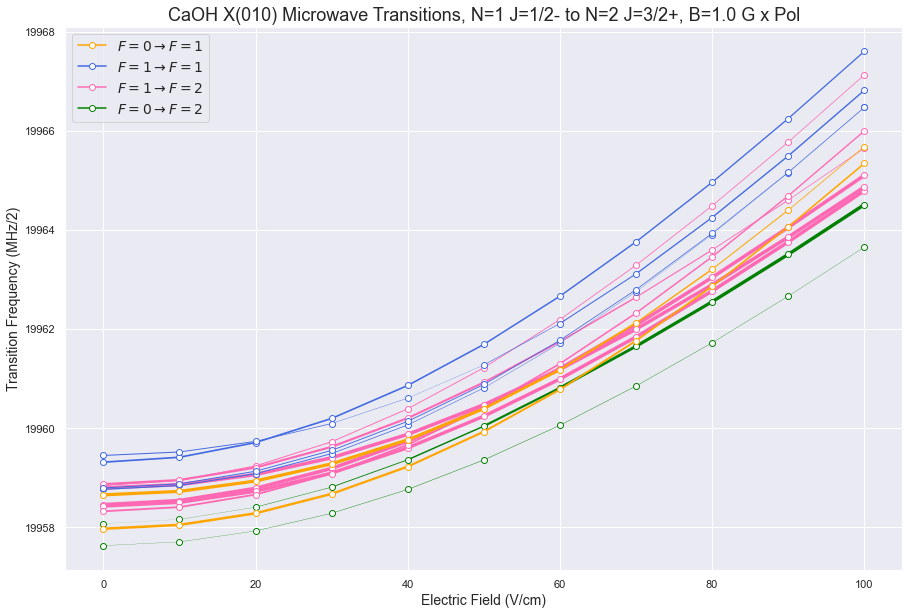

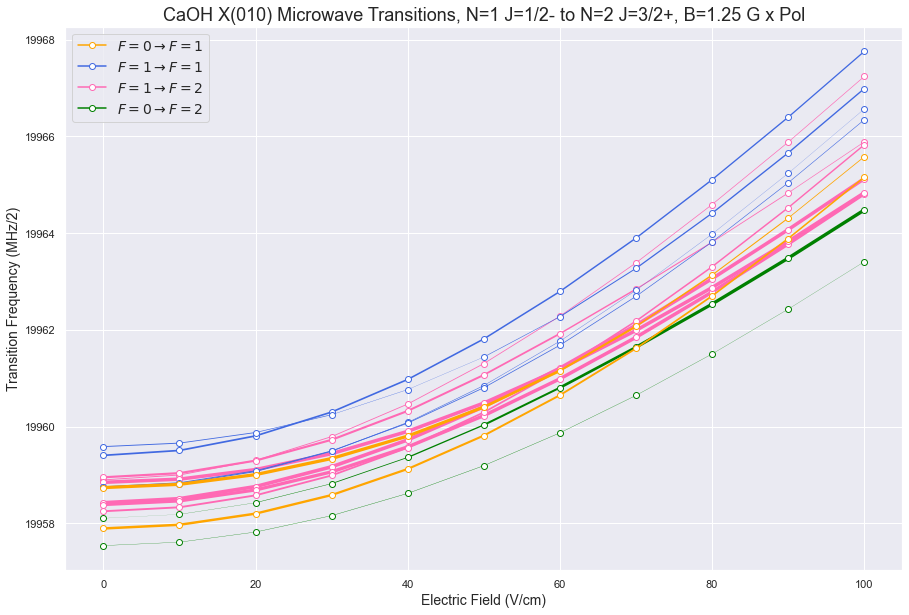

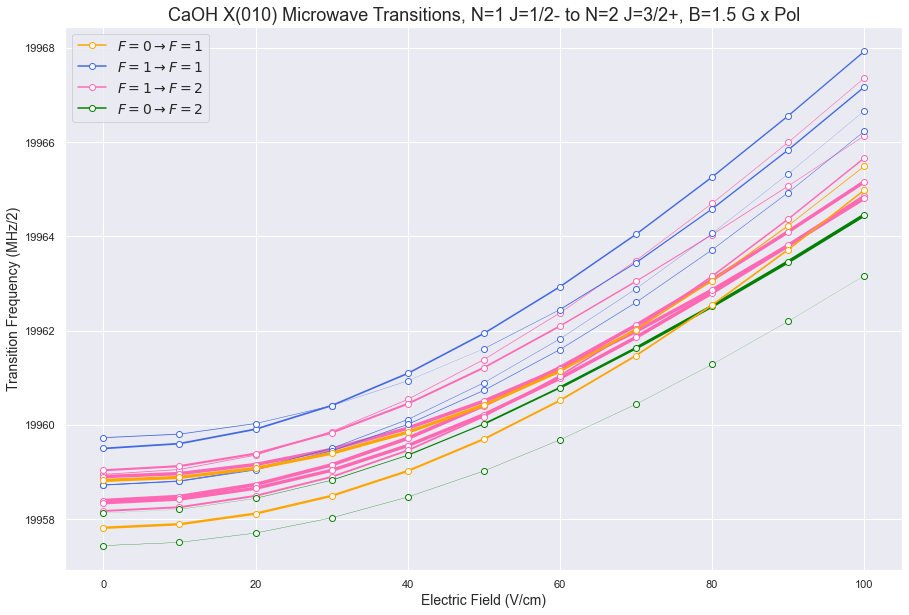

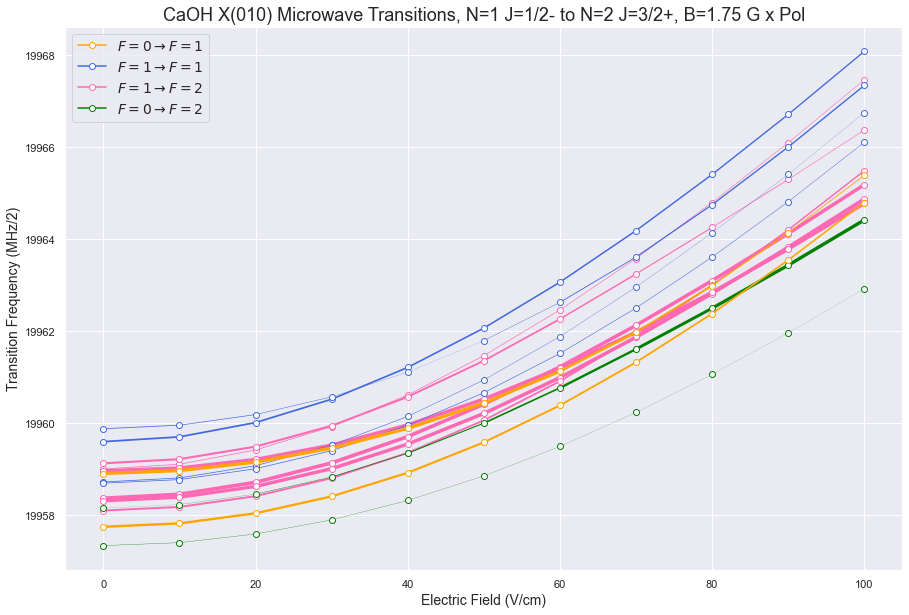

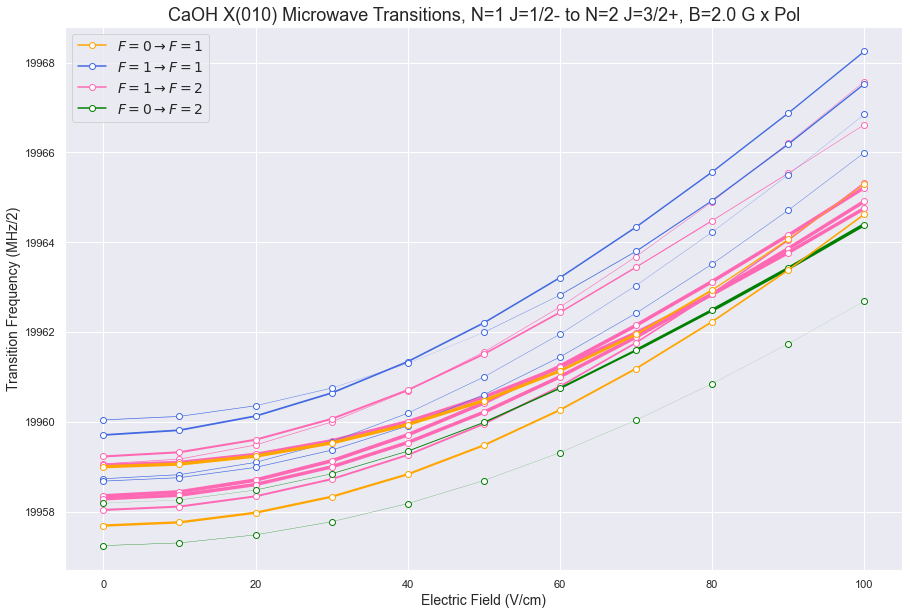

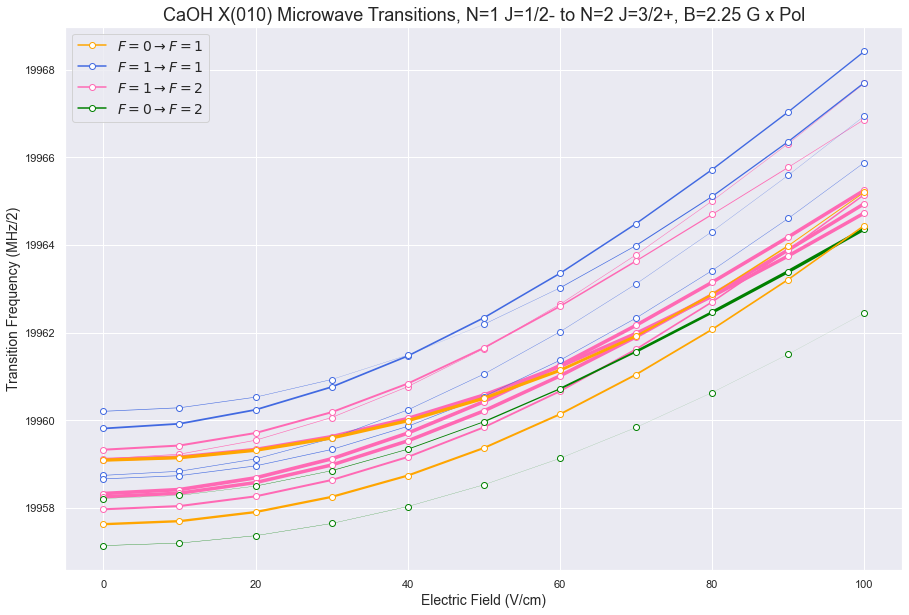

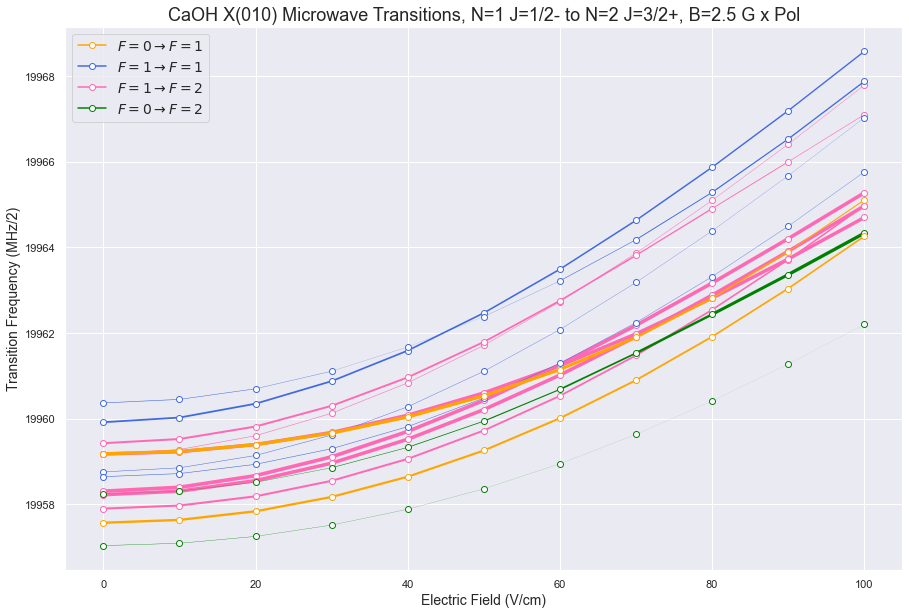

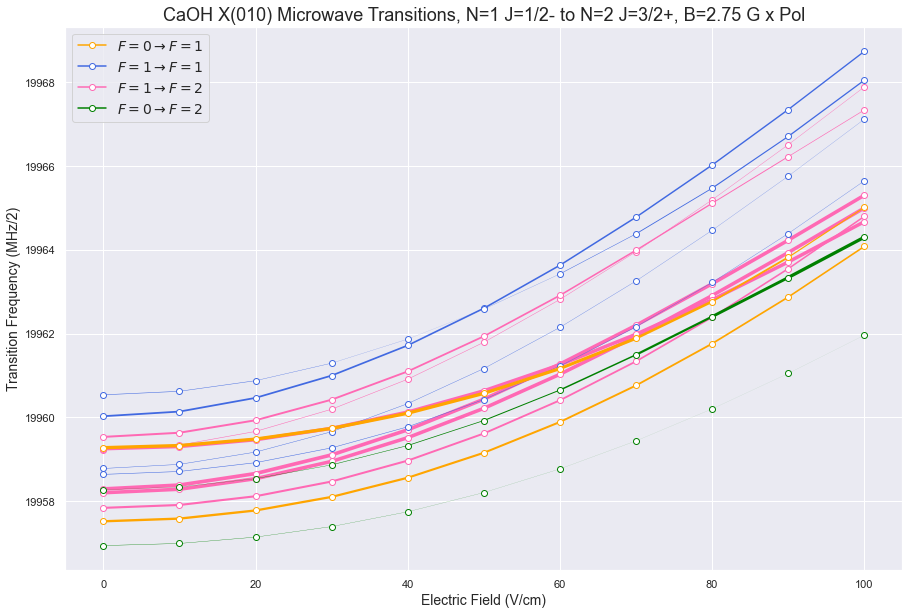

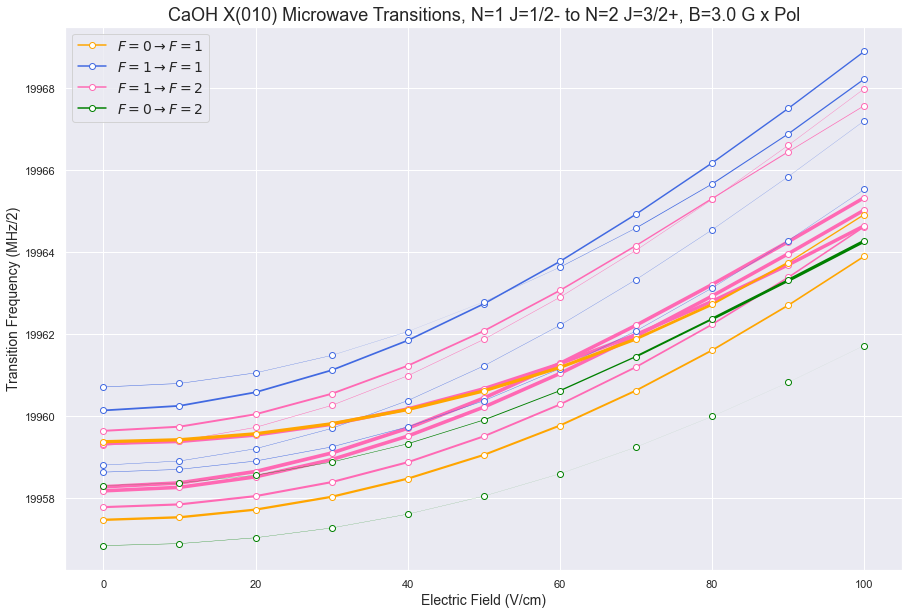

In [31]:
pol = 'x'
print_bool = False
for B in Trans_B.keys():
    Nall.eigensystem(0,B)
    g1 = Nall.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
    e1 = Nall.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g2 = Nall.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
    e2 = Nall.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g4 = Nall.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
    e4 = Nall.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g5 = Nall.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
    e5 = Nall.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g3 = Nall.select_q({'N':1,'J':0.5,'F':[0,1]},parity='-')
    e3 = Nall.select_q({'N':2,'J':1.5,'F':[1,2]},parity='+')
    fig,a = plt.subplots(figsize=(15,10))
    TDM_E,dE_E,t_str_E = Trans_B[B][pol]
#     N1.eigensystem(E,1e-4)
#     N2.eigensystem(E,1e-4)
#     g1 = N1.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
#     e1 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
#     g2 = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e2 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
#     g4 = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e4 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
#     g5 = N1.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
#     e5 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
#     g3 = N1.select_q({'N':1,'J':0.5,'F':[0,1]},parity='-')
#     e3 = N2.select_q({'N':2,'J':1.5,'F':[1,2]},parity='+')
#     fig,a = plt.subplots(figsize=(12,8))
#     TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_E(Escan,TDM_E,dE_E,g_idx=g4,e_idx=e4,linescale=10,figure=fig,color='hotpink',marker='o',mfc='white')
    plot_E(Escan,TDM_E,dE_E,g_idx=g5,e_idx=e5,linescale=10,figure=fig,color='green',marker='o',mfc='white')
    plot_E(Escan,TDM_E,dE_E,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='royalblue',marker='o',mfc='white')
    plot_E(Escan,TDM_E,dE_E,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','royalblue','hotpink','green']
    mark = ['o','o','o','o']
    mf = ['white','white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F=0\rightarrow F=1$',r'$F=1\rightarrow F=1$',r'$F=1\rightarrow F=2$',r'$F=0\rightarrow F=2$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=1/2- to N=2 J=3/2+, B={} G {} Pol'.format(B,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('B = {} g'.format(B))
        table = print_table_E(Escan,TDM_E,dE_E,t_str_E,g3,e3,thresh = 0.001,cut=True,dipole=pol)

In [50]:
Trans_E.keys()

dict_keys([])

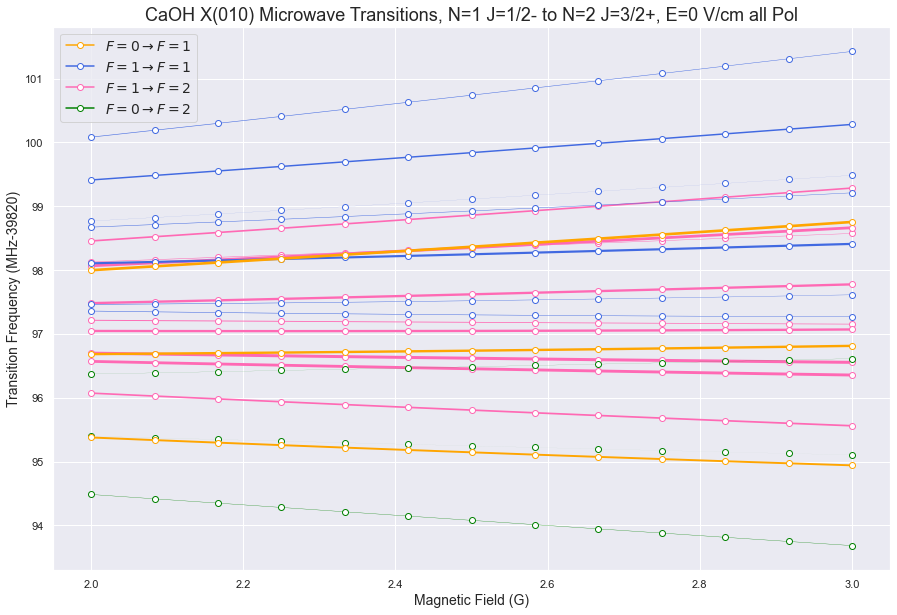

E = 0 V/cm

B (G) = 2.0
Pol = all
Transition                                      Estimated Frequency (MHz-39820)    Dipole Moment (D)
--------------------------------------------  ---------------------------------  -------------------
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=2,M=1)                            94.485077               0.0413
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=1)                            95.377684               0.2851
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=2,M=0)                            95.397653               0.0033
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=2,M=0)                           96.072442               0.2426
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=2,M=-1)                           96.371599               0.0114
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=2,M=1)                            96.569724               0.4067
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=0)                            96.683304               0.3488
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=2)               

In [91]:
pol = 'all'
print_bool = True
for E in [0]:#Trans_E.keys():
    Nall.eigensystem(E,1e-4)
    g1 = Nall.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
    e1 = Nall.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g2 = Nall.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
    e2 = Nall.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g4 = Nall.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
    e4 = Nall.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g5 = Nall.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
    e5 = Nall.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g3 = Nall.select_q({'N':1,'J':0.5,'F':[0,1]},parity='-')
    e3 = Nall.select_q({'N':2,'J':1.5,'F':[1,2]},parity='+')
    fig,a = plt.subplots(figsize=(15,10))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
#     N1.eigensystem(E,1e-4)
#     N2.eigensystem(E,1e-4)
#     g1 = N1.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
#     e1 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
#     g2 = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e2 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
#     g4 = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e4 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
#     g5 = N1.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
#     e5 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
#     g3 = N1.select_q({'N':1,'J':0.5,'F':[0,1]},parity='-')
#     e3 = N2.select_q({'N':2,'J':1.5,'F':[1,2]},parity='+')
#     fig,a = plt.subplots(figsize=(12,8))
#     TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g4,e_idx=e4,linescale=10,figure=fig,color='hotpink',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g5,e_idx=e5,linescale=10,figure=fig,color='green',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='royalblue',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','royalblue','hotpink','green']
    mark = ['o','o','o','o']
    mf = ['white','white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F=0\rightarrow F=1$',r'$F=1\rightarrow F=1$',r'$F=1\rightarrow F=2$',r'$F=0\rightarrow F=2$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=1/2- to N=2 J=3/2+, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E = {} V/cm'.format(E))
        table = print_table_B(Bscan,TDM_B,dE_B,t_str_B,g3,e3,thresh = 0.001,cut=True,dipole=pol)

In [ ]:
pol = 'z'
print_bool = True
for B in Bscan:
    N1.eigensystem(0,1e-4)
    N2.eigensystem(0,1e-4)
    g1 = N1.select_q({'N':1,'J':0.5},parity='-')
    e1 = N2.select_q({'N':2},parity='+')
    g2 = N1.select_q({'N':1,'J':1.5},parity='-')
    e2 = N2.select_q({'N':2},parity='+')
    g3 = N1.select_q({'N':1},parity='-')
    e3 = N2.select_q({'N':2},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_E,dE_E,t_str_E = Trans_B[B][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
    plot_E(Escan,TDM_E,dE_E,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    plot_E(Escan,TDM_E,dE_E,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','cornflowerblue']#,'pink']
    mark = ['o','o']#,None]
    mf = ['white','white']#,'white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$J_g=0.5$',r'$J_g=1.5$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=1/2- to N=2 J=3/2+, B={} G {} Pol'.format(B,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('B = {} G'.format(B))
        table = print_table_E(Escan,TDM_E,dE_E,t_str_E,g3,e3,thresh = 0.001,cut=True,dipole=pol)

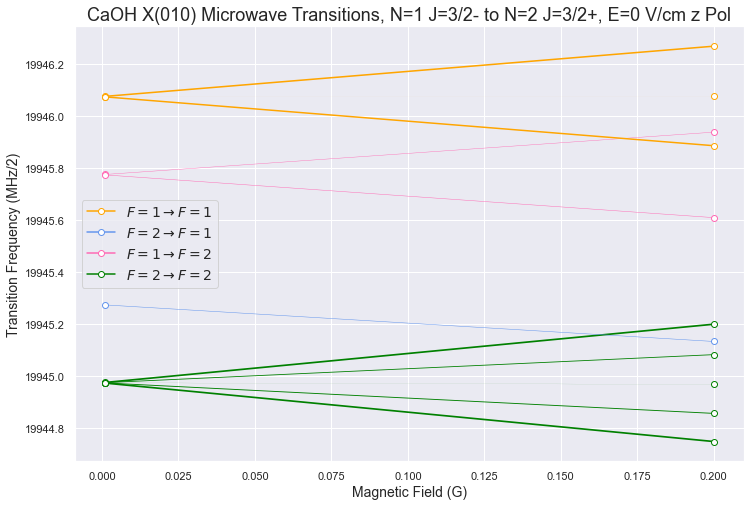

E = 0 V/cm

B (G) = 0.001
Pol = z
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=2)                     19944.972457              -0.2502
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=1)                     19944.973021              -0.1252
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=-1)                   19944.974149              -0.1251
(N=1-,J=1.5,F=2,M=-2)->(N=2+,J=1.5,F=2,M=-2)                   19944.974713               0.2502
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=1,M=1)                     19945.273214              -0.0732
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=1,M=0)                     19945.273915              -0.0846
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=1,M=-1)                   19945.274615               0.0733
(N=1-,J=1.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=1)                     19945.773370              -0.0

In [14]:
pol = 'z'
print_bool = True
for E in [0]:
    N1.eigensystem(E,1e-4)
    N2.eigensystem(E,1e-4)
    g1 = N1.select_q({'N':1,'J':1.5,'F':[1]},parity='-')
    e1 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g2 = N1.select_q({'N':1,'J':1.5,'F':[2]},parity='-')
    e2 = N2.select_q({'N':2,'J':1.5,'F':[1]},parity='+')
    g4 = N1.select_q({'N':1,'J':1.5,'F':[1]},parity='-')
    e4 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g5 = N1.select_q({'N':1,'J':1.5,'F':[2]},parity='-')
    e5 = N2.select_q({'N':2,'J':1.5,'F':[2]},parity='+')
    g3 = N1.select_q({'N':1,'J':1.5,'F':[1,2]},parity='-')
    e3 = N2.select_q({'N':2,'J':1.5,'F':[1,2]},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g4,e_idx=e4,linescale=10,figure=fig,color='hotpink',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g5,e_idx=e5,linescale=10,figure=fig,color='green',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','cornflowerblue','hotpink','green']
    mark = ['o','o','o','o']
    mf = ['white','white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F=1\rightarrow F=1$',r'$F=2\rightarrow F=1$',r'$F=1\rightarrow F=2$',r'$F=2\rightarrow F=2$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=3/2- to N=2 J=3/2+, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E = {} V/cm'.format(E))
        table = print_table_B(Bscan,TDM_B,dE_B,t_str_B,g3,e3,thresh = 0.001,cut=True,dipole=pol)

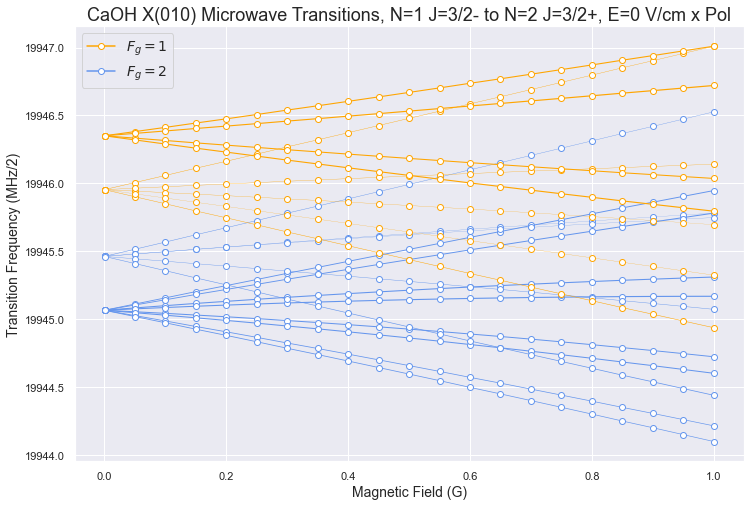

E = 0 V/cm

B (G) = 0.001
Pol = x
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=1.5,F=2,M=2)->(N=2+,J=1.5,F=2,M=1)                     19945.066322              -0.1249
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=2)                     19945.066458              -0.1249
(N=1-,J=1.5,F=2,M=1)->(N=2+,J=1.5,F=2,M=0)                     19945.066887               0.1530
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=1)                     19945.067023              -0.1530
(N=1-,J=1.5,F=2,M=0)->(N=2+,J=1.5,F=2,M=-1)                    19945.067451              -0.1530
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=0)                    19945.067588               0.1530
(N=1-,J=1.5,F=2,M=-1)->(N=2+,J=1.5,F=2,M=-2)                   19945.068016               0.1249
(N=1-,J=1.5,F=2,M=-2)->(N=2+,J=1.5,F=2,M=-1)                   19945.068152               0.1

In [125]:
pol = 'x'
print_bool = True
for E in [0]:
    N1.eigensystem(E,1e-4)
    N2.eigensystem(E,1e-4)
    g1 = N1.select_q({'N':1,'J':1.5,'F':[1]},parity='-')
    e1 = N2.select_q({'N':2,'J':1.5},parity='+')
    g2 = N1.select_q({'N':1,'J':1.5,'F':[2]},parity='-')
    e2 = N2.select_q({'N':2,'J':1.5},parity='+')
    g3 = N1.select_q({'N':1,'J':1.5},parity='-')
    e3 = N2.select_q({'N':2,'J':1.5},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
#     g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
#     g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
#     e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
#     plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    colors = ['orange','cornflowerblue']#,'pink']
    mark = ['o','o']#,None]
    mf = ['white','white']#,'white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F_g=1$',r'$F_g=2$']#,r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=3/2- to N=2 J=3/2+, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E = {} V/cm'.format(E))
        table = print_table_B(Bscan,TDM_B,dE_B,t_str_B,g3,e3,thresh = 0.001,cut=True,dipole=pol)

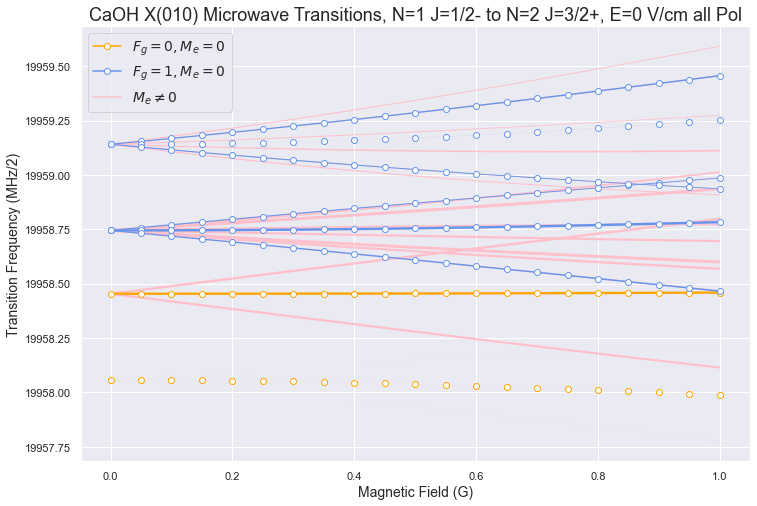

E= 0


NameError: name 'print_table' is not defined

In [119]:
pol = 'all'
print_bool = True
for E in [0]:
    N1.eigensystem(E,1e-4)
    N2.eigensystem(E,1e-4)
    g1 = N1.select_q({'N':1,'J':0.5,'F':[0]},parity='-')
    e1 = N2.select_q({'N':2,'J':1.5,'M':0},parity='+')
    g2 = N1.select_q({'N':1,'J':0.5,'F':1},parity='-')
    e2 = N2.select_q({'N':2,'J':1.5,'M':0},parity='+')
    g3 = N1.select_q({'N':1,'J':0.5},parity='-')
    e3 = N2.select_q({'N':2,'J':1.5},parity='+')
    fig,a = plt.subplots(figsize=(12,8))
    TDM_B,dE_B,t_str_B = Trans_E[E][pol]
    
    g = N1.select_q({'N':1,'J':0.5,'F':0},parity='-')
    e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
    g = N1.select_q({'N':1,'J':0.5,'F':[1]},parity='-')
    e = N2.select_q({'N':2,'J':1.5,'M':[-2,-1,0,1,2]},parity='+')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g,e_idx=e,linescale=10,figure=fig,color='pink',marker=None,mfc='white')
    
    plot_B(Bscan,TDM_B,dE_B,g_idx=g1,e_idx=e1,linescale=10,figure=fig,color='orange',marker='o',mfc='white')
    plot_B(Bscan,TDM_B,dE_B,g_idx=g2,e_idx=e2,linescale=10,figure=fig,color='cornflowerblue',marker='o',mfc='white')
    colors = ['orange','cornflowerblue','pink']
    mark = ['o','o',None]
    mf = ['white','white','white']
    lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
    labels = [r'$F_g=0, M_e=0$',r'$F_g=1, M_e=0$',r'$M_e\neq0$']
    plt.legend(lines, labels,loc='best',fontsize=14)
    plt.title('CaOH X(010) Microwave Transitions, N=1 J=1/2- to N=2 J=3/2+, E={} V/cm {} Pol'.format(E,pol),fontsize=18)
    plt.show()
    if print_bool:
        print('E=',E)
        table = print_table(Bscan,TDM_B,dE_B,t_str_B,g3,e3,thresh = 0.001,cut=True,dipole=pol)

In [275]:
N1.write_state(3)

E = 9958.569766667135 MHz

 0.7071067808654263 |K=-1,N=1,J=0.5,F=0.0,M=0.0> 

 -0.7071067808653126 |K=1,N=1,J=0.5,F=0.0,M=0.0> 

 -1.1154576882391881e-17 |K=-1,N=1,J=0.5,F=1.0,M=-1.0> 

 8.544868371901382e-18 |K=1,N=1,J=0.5,F=1.0,M=-1.0> 

 -2.07526478949049e-05 |K=-1,N=1,J=0.5,F=1.0,M=0.0> 

 2.0752647894908524e-05 |K=1,N=1,J=0.5,F=1.0,M=0.0> 

 -4.5145966869495714e-23 |K=-1,N=1,J=0.5,F=1.0,M=1.0> 

 4.8449842558306146e-23 |K=1,N=1,J=0.5,F=1.0,M=1.0> 

 4.895194127386319e-19 |K=-1,N=1,J=1.5,F=1.0,M=-1.0> 

 -4.451839384081833e-19 |K=1,N=1,J=1.5,F=1.0,M=-1.0> 

 4.851996047073014e-06 |K=-1,N=1,J=1.5,F=1.0,M=0.0> 

 -4.851996047073296e-06 |K=1,N=1,J=1.5,F=1.0,M=0.0> 

 2.192253315551256e-24 |K=-1,N=1,J=1.5,F=1.0,M=1.0> 

 -2.2484058116120987e-24 |K=1,N=1,J=1.5,F=1.0,M=1.0> 

 1.0627447553439413e-41 |K=-1,N=1,J=1.5,F=2.0,M=-2.0> 

 -3.90682011853759e-42 |K=1,N=1,J=1.5,F=2.0,M=-2.0> 

 -4.626600654443192e-23 |K=-1,N=1,J=1.5,F=2.0,M=-1.0> 

 4.192708680799953e-23 |K=1,N=1,J=1.5,F=2.0,M=-1.

(10000,)
(10000, 1, 2)
(9999, 1, 2)
(9999,)
(9999, 2, 2)
[ 1.       1.00126  1.00251 ... 13.5626  13.56386 13.56511]


<Figure size 432x288 with 0 Axes>

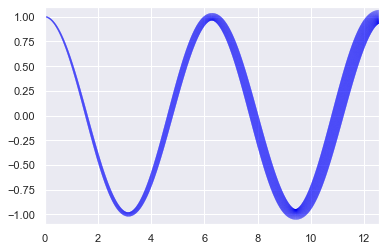

In [192]:
import numpy as np
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
x = np.linspace(0,4*np.pi,10000)
y = np.cos(x)
lwidths=1+x[:-1]
print(x.shape)
points = np.array([x, y]).T.reshape(-1, 1, 2)
print(points.shape)
print(points[:-1].shape)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
print(lwidths.shape)
print(segments.shape)
lc = LineCollection(segments, linewidths=lwidths,color='blue')
plt.figure()
fig,a = plt.subplots()
a.add_collection(lc)
a.set_xlim(0,4*np.pi)
a.set_ylim(-1.1,1.1)
# plt.plot(x,y*0.5)
print(lwidths)

In [190]:
x = Bscan
y = dE_B[:,1,1]
print(y.shape)
print(x.shape)
lwidth = TDM_B[:,1,1]/1.465
points = np.array([x, y]).T.reshape(-1, 1, 2)
print(np.array([x,y]).shape)
print(points.shape)
print(points[1:].shape)
segments = np.concatenate([points, points], axis=1)
print(lwidth.shape)
print(segments.shape)

(11,)
(11,)
(2, 11)
(11, 1, 2)
(10, 1, 2)
(11,)
(11, 2, 2)


In [159]:
points = np.array([x, y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments

array([[[ 0.     ,  1.     ],
        [ 0.00126,  1.     ]],

       [[ 0.00126,  1.     ],
        [ 0.00251,  1.     ]],

       [[ 0.00251,  1.     ],
        [ 0.00377,  0.99999]],

       ...,

       [[12.5626 ,  0.99999],
        [12.56386,  1.     ]],

       [[12.56386,  1.     ],
        [12.56511,  1.     ]],

       [[12.56511,  1.     ],
        [12.56637,  1.     ]]])

In [103]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
segments[2]

array([[0.00251, 1.     ],
       [0.00377, 0.99999]])

In [101]:
np.array([x,y]).T

array([[ 0.     ,  1.     ],
       [ 0.00126,  1.     ],
       [ 0.00251,  1.     ],
       ...,
       [12.56386,  1.     ],
       [12.56511,  1.     ],
       [12.56637,  1.     ]])

In [100]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
points

array([[[ 0.     ,  1.     ]],

       [[ 0.00126,  1.     ]],

       [[ 0.00251,  1.     ]],

       ...,

       [[12.56386,  1.     ]],

       [[12.56511,  1.     ]],

       [[12.56637,  1.     ]]])

In [ ]:
g_idx=None,e_idx=None,thresh = 0.001,title=None,figure=None,**kwargs)

In [340]:
x=np.zeros((21,20,40))

In [348]:
x[:,1,39].shape

(21,)

In [337]:
x=np.zeros((20,40))

In [339]:
x[

IndexError: index 30 is out of bounds for axis 0 with size 20

In [268]:
Bscan = np.linspace(0,50,21)
Bscan[0]=1e-3
print(Bscan)

[ 0.001  2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
 25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
 50.   ]


0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ t

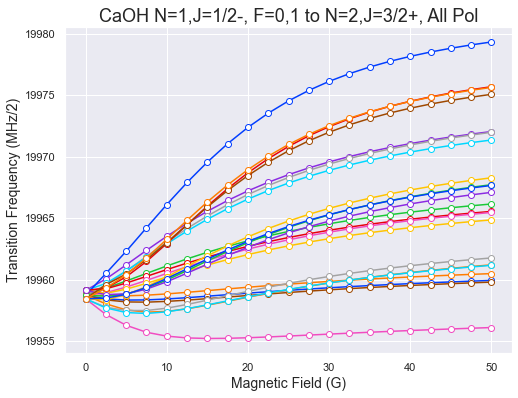

In [273]:
Bl01all,table01all=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0,1]},{'N':2,'J':1.5},Bscan,dipole='abs',plot=False)
Bl01allT = plot_B_tracking(Bscan,Bl01all,dipole='abs',reorder_missing=True,title='CaOH N=1,J=1/2-, F=0,1 to N=2,J=3/2+, All Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ t

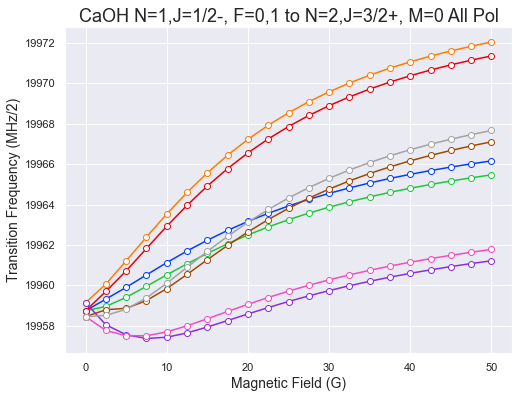

In [274]:
Bltargall,tabletargall=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0,1]},{'N':2,'J':1.5,'M':[0]},Bscan,dipole='abs',plot=False)
BltargallT = plot_B_tracking(Bscan,Bltargall,dipole='abs',reorder_missing=True,title='CaOH N=1,J=1/2-, F=0,1 to N=2,J=3/2+, M=0 All Pol')

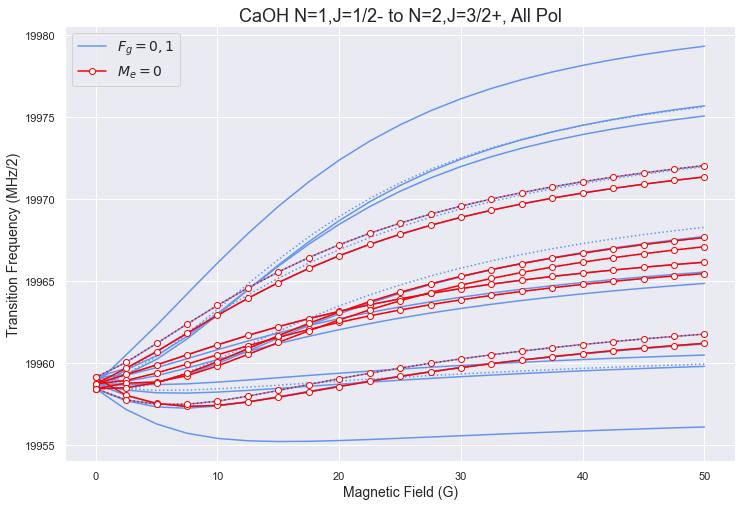

In [329]:
plt.figure(1,figsize=(12,8))
# plot_B_tracking(Bscan,Bl01all,table01all,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='cornflowerblue',marker=None)
plot_B_tracking(Bscan,Bltargall,tabletargall,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='red')
colors = ['cornflowerblue','red']
mark = [None,'o']
mf = [None,'white']
lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
labels = [r'$F_g=0,1$',r'$M_e=0$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

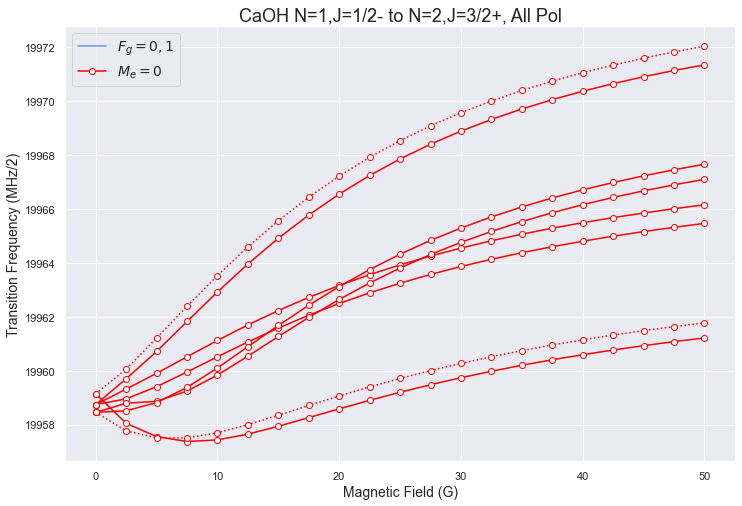

In [330]:
plt.figure(1,figsize=(12,8))
# plot_B_tracking(Bscan,Bl01all,table01all,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='cornflowerblue',marker=None)
plot_B_tracking(Bscan,Bltargall,tabletargall,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='red')
colors = ['cornflowerblue','red']
mark = [None,'o']
mf = [None,'white']
lines = [plt.Line2D([0], [0], color=c, marker=mk,mfc=m) for c,m,mk in zip(colors,mf,mark)]
labels = [r'$F_g=0,1$',r'$M_e=0$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ t

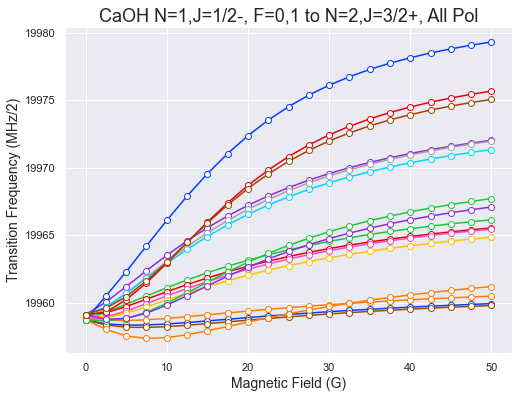

In [269]:
Bl1all,table1all=all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bscan,dipole='abs',plot=False)
Bl1allT = plot_B_tracking(Bscan,Bl1all,dipole='abs',reorder_missing=True,title='CaOH N=1,J=1/2-, F=1 to N=2,J=3/2+, All Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ t

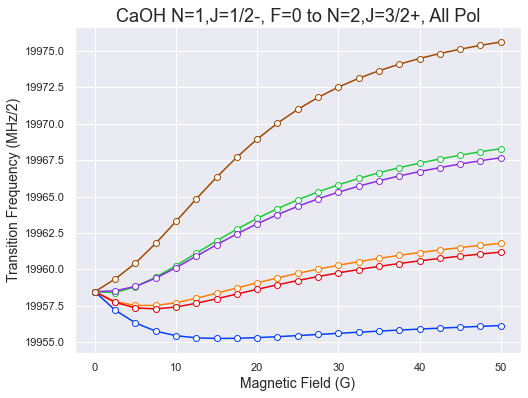

In [270]:
Bl0all,table0all=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0]},{'N':2,'J':1.5},Bscan,dipole='abs',plot=False)
Bl0allT = plot_B_tracking(Bscan,Bl0all,dipole='abs',reorder_missing=True,title='CaOH N=1,J=1/2-, F=0 to N=2,J=3/2+, All Pol')

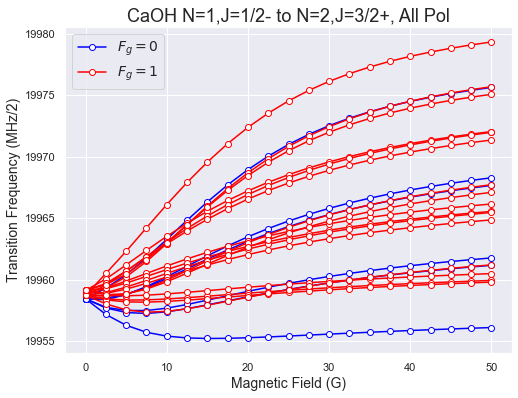

In [272]:
plt.figure(1,figsize=(8,6))
plot_B_tracking(Bscan,Bl0all,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='blue')
plot_B_tracking(Bscan,Bl1all,dipole='all',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, All Pol',figure=1,color='red')
colors = ['blue','red']
lines = [plt.Line2D([0], [0], color=c, marker='o',mfc='white') for c in colors]
labels = [r'$F_g=0$',r'$F_g=1$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

In [183]:
Bl1z,table1z=all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bscan,dipole='z',plot=False)
Bl1zT = plot_B_tracking(Bscan,Bl1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2-, F=1 to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
12.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
17.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ

B (G) = 0.001
Pol = 

NameError: name 'Bvals' is not defined

Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6
Number of lines: 6


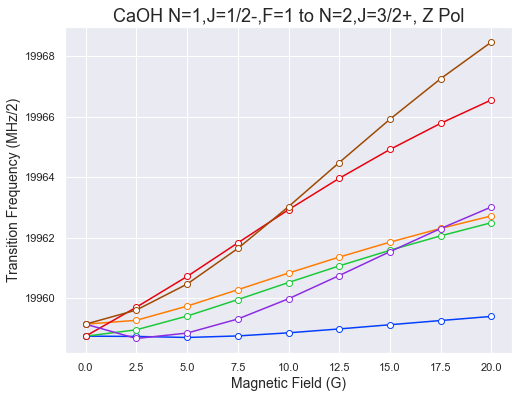

In [193]:
Bl1zT = plot_B_tracking(Bscan,Bl1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2-,F=1 to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from 

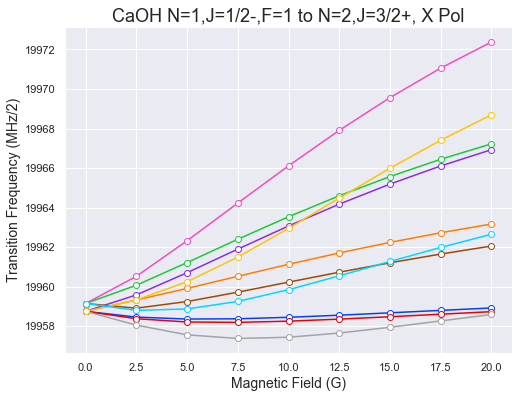

In [196]:
Bl1x,table1x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bscan,dipole='x',plot=False)
Bl1xT = plot_B_tracking(Bscan,Bl1x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2-,F=1 to N=2,J=3/2+, X Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
12.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
17.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ

B (G) = 0.001
Pol = 

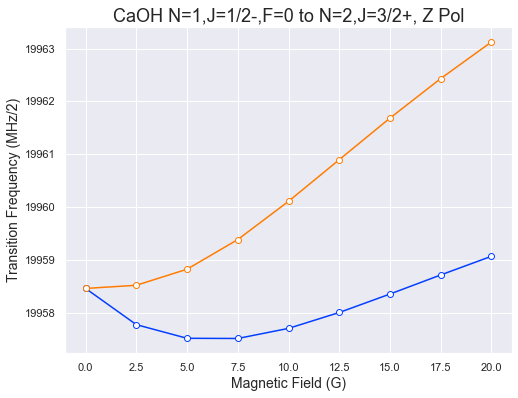

In [198]:
Bl0z,table0z=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0]},{'N':2,'J':1.5},Bscan,dipole='z',plot=False)
Bl0zT = plot_B_tracking(Bscan,Bl0z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2-,F=0 to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from 

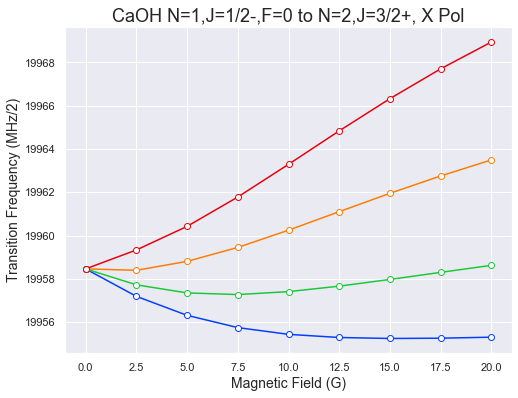

In [197]:
Bl0x,table0x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0]},{'N':2,'J':1.5},Bscan,dipole='x',plot=False)
Bl0xT = plot_B_tracking(Bscan,Bl0x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2-,F=0 to N=2,J=3/2+, X Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
12.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
15.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
17.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
20.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ

B (G) = 0.001
Pol = 

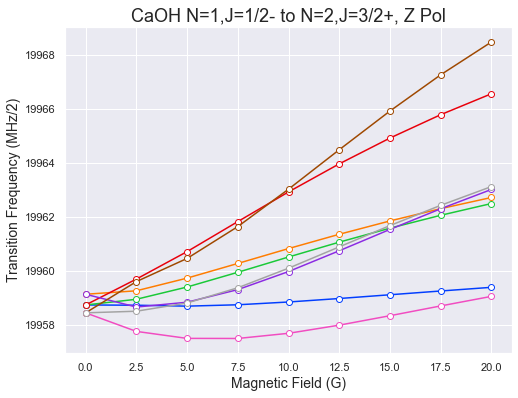

In [201]:
Bl01z,table01z=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0,1]},{'N':2,'J':1.5},Bscan,dipole='z',plot=False)
Bl01zT = plot_B_tracking(Bscan,Bl01z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
5.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
7.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from 

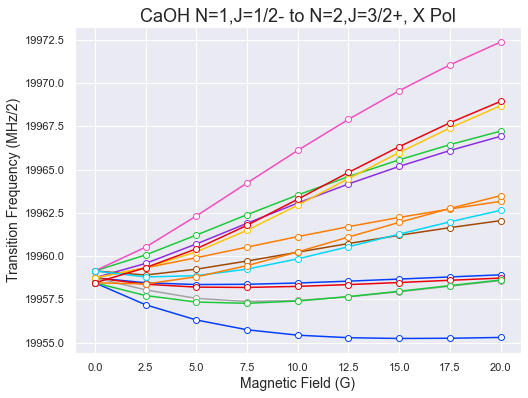

In [202]:
Bl01x,table01x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0,1]},{'N':2,'J':1.5},Bscan,dipole='x',plot=False)
Bl01xT = plot_B_tracking(Bscan,Bl01x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol')

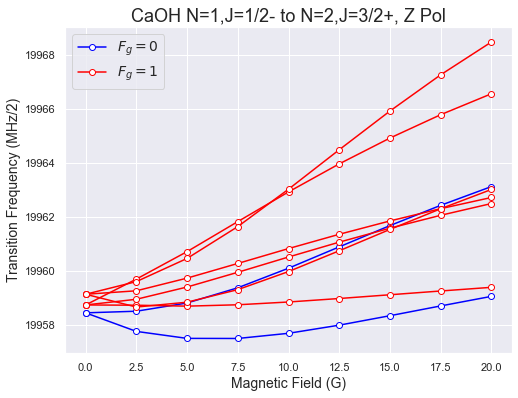

In [216]:
plt.figure(1,figsize=(8,6))
plot_B_tracking(Bscan,Bl0z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol',figure=1,color='blue')
plot_B_tracking(Bscan,Bl1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol',figure=1,color='red')
colors = ['blue','red']
lines = [plt.Line2D([0], [0], color=c, marker='o',mfc='white') for c in colors]
labels = [r'$F_g=0$',r'$F_g=1$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

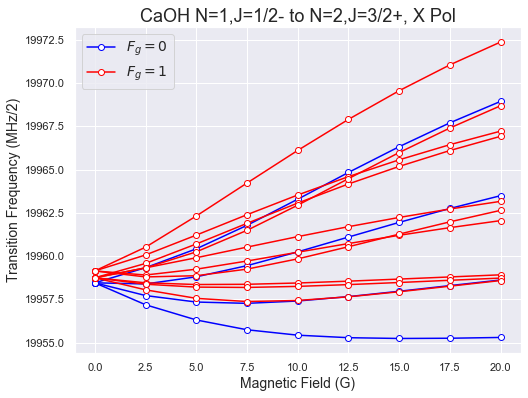

In [217]:
plt.figure(1,figsize=(8,6))
plot_B_tracking(Bscan,Bl0x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol',figure=1,color='blue')
plot_B_tracking(Bscan,Bl1x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol',figure=1,color='red')
colors = ['blue','red']
lines = [plt.Line2D([0], [0], color=c, marker='o',mfc='white') for c in colors]
labels = [r'$F_g=0$',r'$F_g=1$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

In [226]:
Bfine = np.arange(0,2+0.1,0.1)
Bfine[0] = 0.001

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.1
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.2
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.30000000000000004
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.4
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.6000000000000001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.7000000000000001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.8
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvect

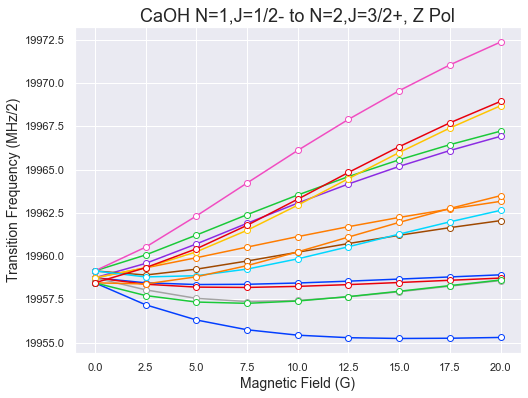

In [229]:
Bf0z,tablef0x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[0]},{'N':2,'J':1.5},Bfine,dipole='z',plot=False)
Bf0zT = plot_B_tracking(Bfine,Bf01x,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

In [130]:
from sympy.physics.wigner import wigner_3j,wigner_6j,wigner_9j

def T2IS_bBJ(K0,N0,J0,F0,M0,K1,N1,J1,F1,M1,S=1/2,I=1/2):
    if not kronecker(F0,F1)*kronecker(M0,M1)*kronecker(K0,K1):
        return 0
    else:
        return (-1)**(N0-K0)*wigner_3j(N0,2,N1,-K0,0,K1)
#         return -np.sqrt(5/3)*(-1)**(3*F0-2*M0+I+J0)*np.sqrt((2*I+1)*(I+1)*I)*\
#             np.sqrt((2*J0+1)*(2*J1+1)*3*(2*S+1)*(S+1)*S)*wigner_6j(I,J1,F0,J0,I,1)*\
#             wigner_9j(S,N1,J1,1,2,1,S,N0,J0)*np.sqrt((2*N0+1)*(2*N1+1))*(-1)**(N0-K0)*wigner_3j(N0,2,N1,-K0,0,K1)
    
def kronecker(a,b):         # Kronecker delta function
    if a==b:
        return 1
    else:
        return 0

In [133]:
print(T2IS_bBJ(1,1,0.5,0,0,1,1,0.5,0,0))
print(T2IS_bBJ(0,1,0.5,0,0,0,1,0.5,0,0))

sqrt(30)/30
-sqrt(30)/15


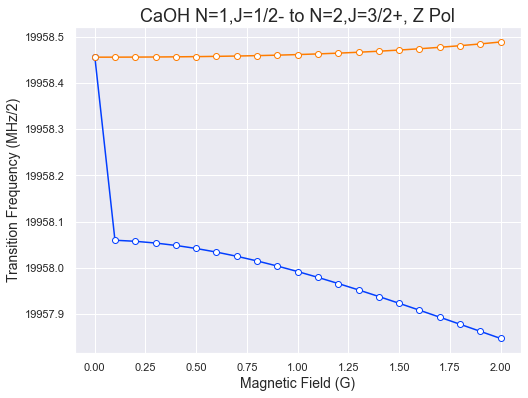

In [233]:
Bf0zT = plot_B_tracking(Bfine,Bf0z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.1
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.2
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.30000000000000004
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.4
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.5
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.6000000000000001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.7000000000000001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
0.8
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvect

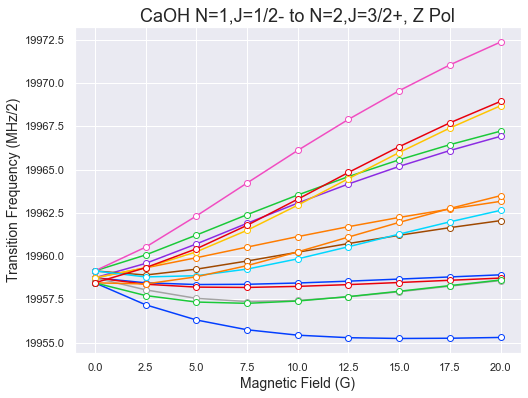

In [230]:
Bf1z,tablef1x=all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bfine,dipole='z',plot=False)
Bf1zT = plot_B_tracking(Bfine,Bf1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

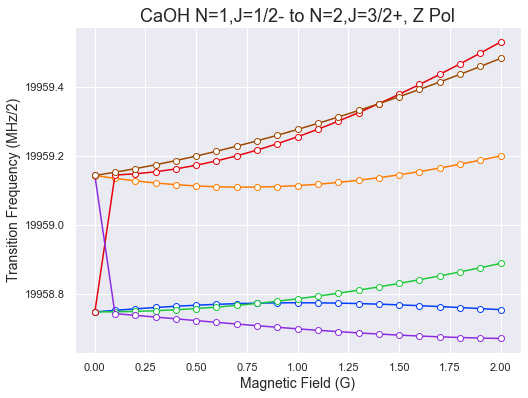

In [234]:
Bf1zT = plot_B_tracking(Bfine,Bf1z,dipole='z',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, Z Pol')

In [ ]:
plt.figure(1,figsize=(8,6))
plot_B_tracking(Bscan,Bl0x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol',figure=1,color='blue')
plot_B_tracking(Bscan,Bl1x,dipole='x',reorder_missing=True,title='CaOH N=1,J=1/2- to N=2,J=3/2+, X Pol',figure=1,color='red')
colors = ['blue','red']
lines = [plt.Line2D([0], [0], color=c, marker='o',mfc='white') for c in colors]
labels = [r'$F_g=0$',r'$F_g=1$']
plt.legend(lines, labels,loc='best',fontsize=14)
plt.show()

In [96]:
header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
for i in range(len(Bscan)):
    print('\nB (G) =',Bscan[i])
    print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.3f')))


B (G) = 0.001
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=1))                    19958.456081               -0.423
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=-1))                   19958.456781               -0.423

B (G) = 2.0
Transition                                      Estimated Frequency (MHz/2)    Dipole Moment (D)
--------------------------------------------  -----------------------------  -------------------
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=2,M=1))                    19957.390325               -0.051
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=1))                    19957.836587               -0.349
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=2,M=-1))                   19958.333572                0.014
(N=1-,J=0.5,F=0,M=0)->(N=2+,J=1.5,F=1,M=-1))                   19959.146777                0.475

B

In [104]:
for B in B_lines:
    print(len(B))

In [105]:
Bh = Bscan[1:]
Blh = B_lines[1:]
BlhT = list(zip(*Blh))

In [106]:
for line in BlhT:
    plt.plot(Bh,line,marker='o')

In [107]:
for x,y in zip(Bscan,B_lines):
    plt.scatter([x] * len(y), y)

In [108]:
B_lines

[]

In [99]:
def all_B_tracking(state,g_q,e_q,Bvals,dipole='z'):
    B_lines,B_tables = track_transition_B(state,g_q,state,e_q,Bvals,dipole)
    header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
    for i in range(len(Bvals)):
        print('\nB (G) =',Bvals[i])
        print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.3f')))
    print()
    for B in B_lines:
        print('Number of lines:',len(B))
    BT = list(zip(*B_lines))
    plt.figure(figsize=(10,10))
    for line in BT:
        plt.plot(Bvals,line,marker='o',mfc='white')
    plt.xlabel('Magnetic Field (G)')
    plt.ylabel('Transition Frequency (MHz/2)')
    plt.title('CaOH Microwave Transitions')
    return BT, B_tables

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
4.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
6.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
8.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
10.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
12.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
14.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
16.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
18.0
Successfully conv

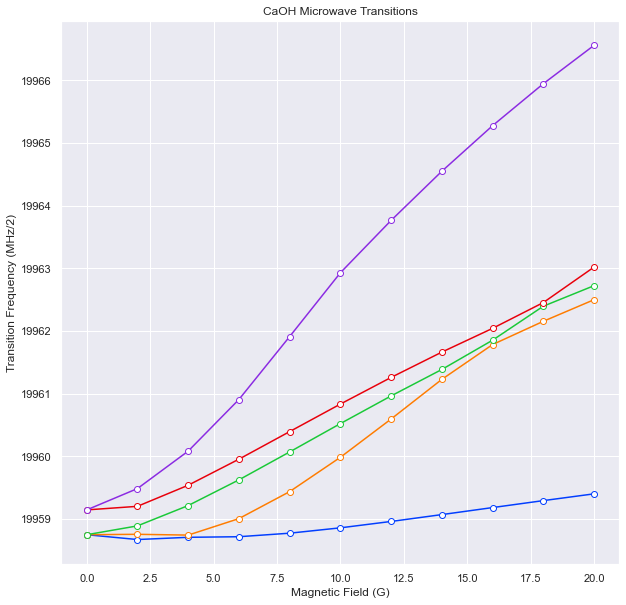

In [92]:
all_B_tracking(X010,{'N':1,'J':0.5,'F':[1]},{'N':2,'J':1.5},Bscan,dipole='z')

In [77]:
B_lines,B_tables = track_transition_B(X010,{'N':1,'J':0.5,'F':[1]},X010,{'N':2,'J':1.5},Bscan,dipole='z')

0.001
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
2.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
4.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
6.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
8.0
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from b

In [78]:
header = ['Transition','Estimated Frequency (MHz/2)','Dipole Moment (D)']
for i in range(len(Bscan)):
    print('\nB (G) =',Bscan[i])
    print(tabulate(B_tables[i],headers=header,floatfmt=('','.6f','.3f')))


B (G) = 0.001
Transition                                       Estimated Frequency (MHz/2)    Dipole Moment (D)
---------------------------------------------  -----------------------------  -------------------
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=2,M=0))                    19958.747594                0.213
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=2,M=1))                     19958.747641               -0.369
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=2))                     19958.747688               -0.521
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=2,M=-2))                   19958.748023               -0.521
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=2,M=-1))                    19958.748070               -0.368
(N=1-,J=0.5,F=1,M=1)->(N=2+,J=1.5,F=2,M=0))                     19958.748117                0.213
(N=1-,J=0.5,F=1,M=0)->(N=2+,J=1.5,F=1,M=1))                     19959.143592                0.205
(N=1-,J=0.5,F=1,M=-1)->(N=2+,J=1.5,F=1,M=0))                    19959.143681               -0.204
(N=1-

In [81]:
for B in B_lines:
    print(len(B))

10
10
10
10
10
10
10
10
10
10
10


In [84]:
BT = list(zip(*B_lines))

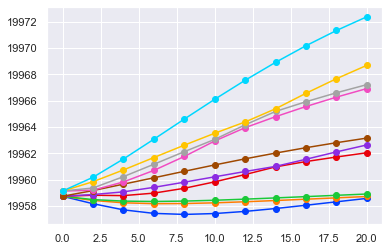

In [85]:
for line in BT:
    plt.plot(Bscan,line,marker='o')

In [237]:
import csv

def write_labeled_CSV_rows(data_array,file_path,label_array):
    data_array = np.array(data_array)
    save_all = []
    save_all.append(label_array)
    for _data in data_array:
        save_all.append(_data)
    writeCSVrows(save_all,file_path)
    
def writeCSVrows(array_of_arrays,filepath):
    with open(filepath,'w+',newline='') as f:
        w = csv.writer(f)
        for array in array_of_arrays:
            w.writerow(array)
    print('Done! Array written to', filepath)
    return

In [238]:
write_labeled_CSV_rows(table_N21,'CaOH_X010_N21_lines.csv',header_N21)
write_labeled_CSV_rows(table_N12,'CaOH_X010_N12_lines.csv',header_N12)

Done! Array written to CaOH_X010_N21_lines.csv
Done! Array written to CaOH_X010_N12_lines.csv


In [83]:
x_labels = [X010.gen_state_str(i,thresh=0.1,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_I','M_F'],round=2) for i in N2]
display(Latex(x_labels[7]))

<IPython.core.display.Latex object>

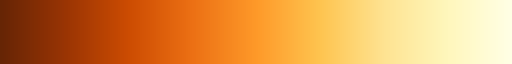

In [68]:
sns.color_palette("YlOrBr_r", as_cmap=True)

In [123]:
Bz = np.linspace(1e-6,5,1000)
Ez = np.linspace(0,200,1000)

In [124]:
X010.StarkMap(Ez,1e-3,plot=False)
# X010.plot_evals_EB('E',kV_kG=True,GHz=True)

In [108]:
X010.ZeemanMap(Bz,0,plot=False)

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_B.T[N2]):
    plt.plot(Bz,trace)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Zeeman Shifts, $N=2-$',fontsize=16);
plt.ylim(49865,49885)

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N1]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Bz,grad)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Magnetization, $N=2-$',fontsize=16);

AttributeError: 'NoneType' object has no attribute 'T'

<Figure size 720x504 with 0 Axes>

(9900.0, 10090.0)

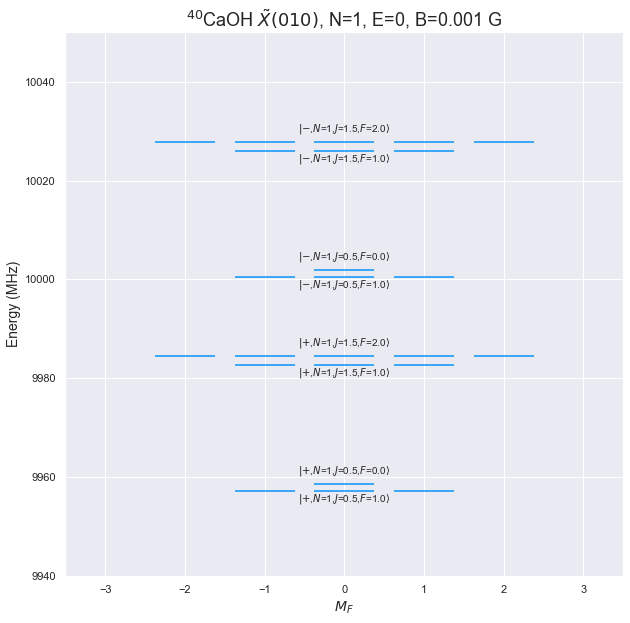

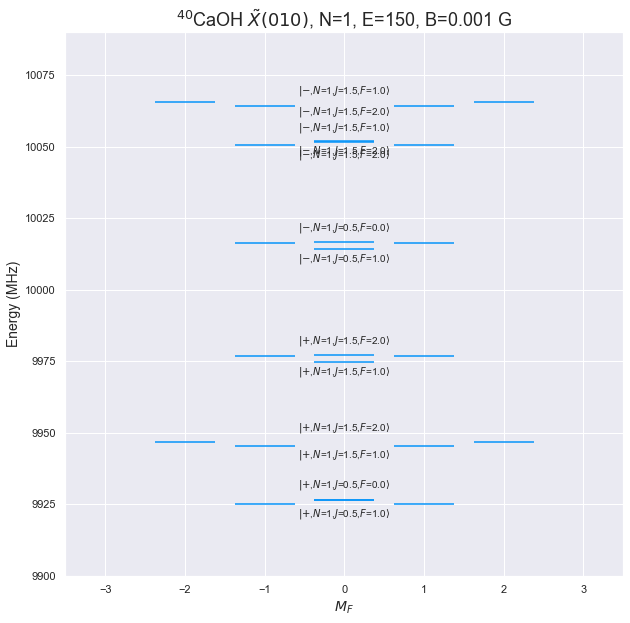

In [57]:
E0=0
B0=1e-3
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(9940,10050)

E0=150
B0=1e-3
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(9900,10090)

# N=2
# X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
# plt.title(X010.state_str+', N={}, E={} V/cm, B={} G'.format(N,E0,B0),fontsize=18)
# plt.xlim(-3.5,3.5)

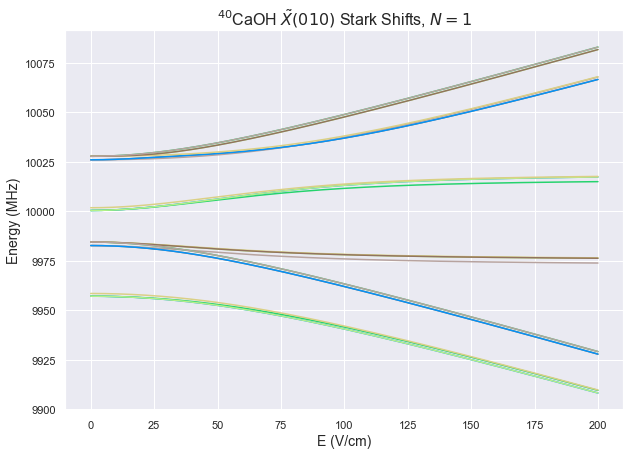

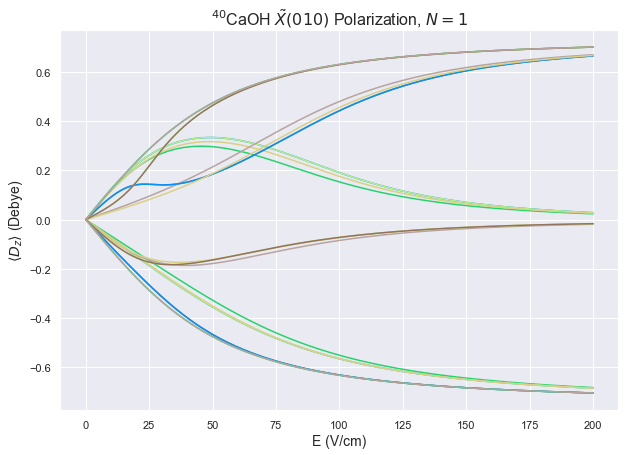

In [133]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

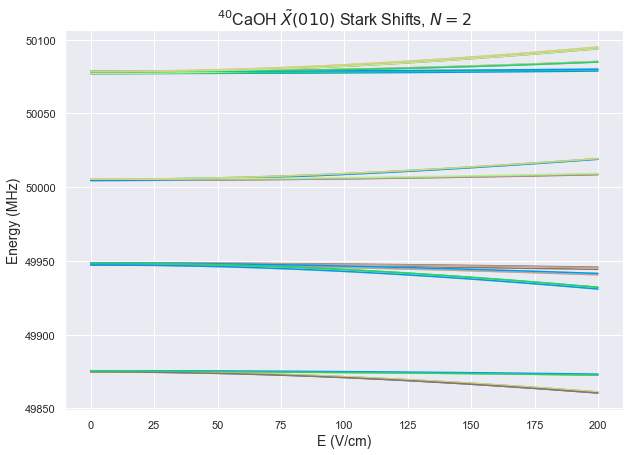

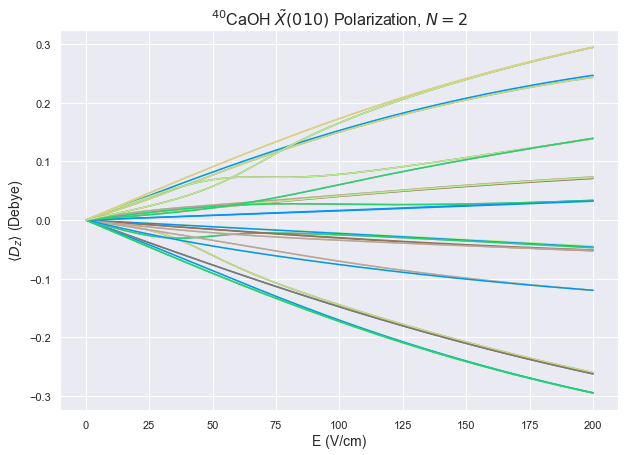

In [134]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2$',fontsize=16);

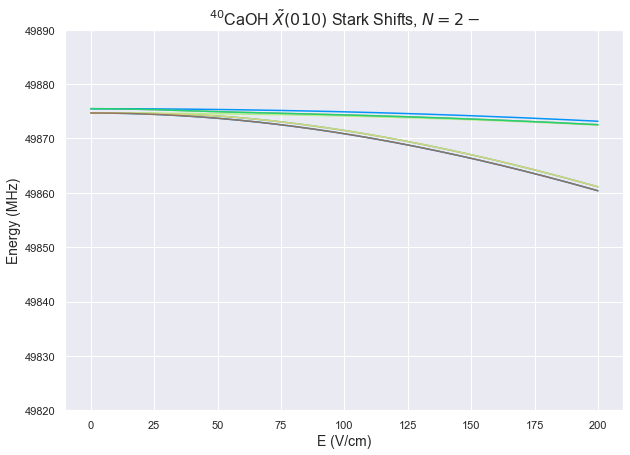

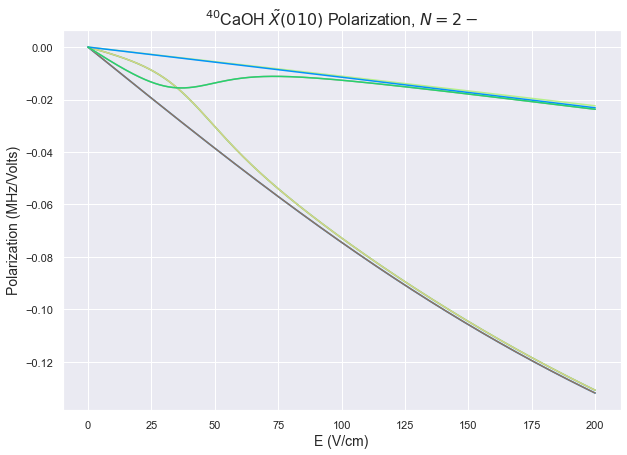

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N2_all]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2-$',fontsize=16);
plt.ylim(49820,49890)

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N2_all]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2-$',fontsize=16);

In [36]:
X010.display_levels(0,1e-6,'F',idx=N1_all,label_q=[q for q in X010.q_str if q!='K'],alt_label=True)
plt.title(X010.state_str+', N=1d',fontsize=18)

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1,2, Free Field')

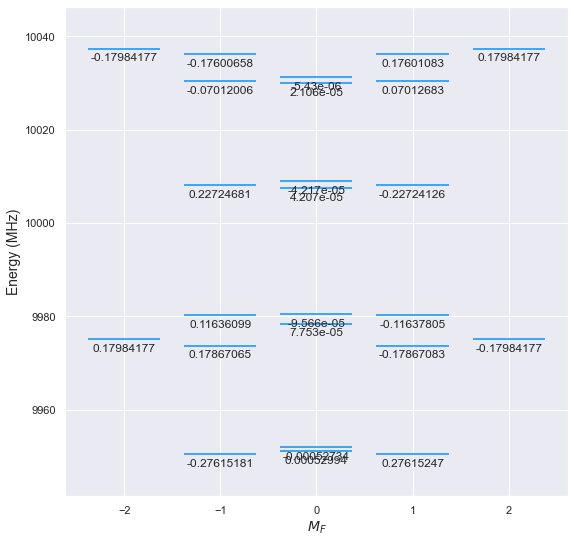

In [130]:
# X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=16,M_range=[1])
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8)
X010.display_PTV(60.8,1e-3,'EDM')

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1,2 60 V/cm, 1e-06 G')

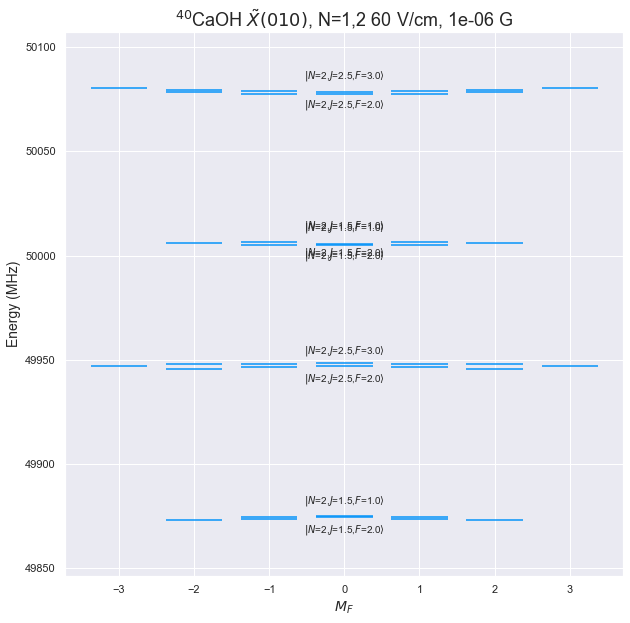

In [14]:
Efield = 60
Bfield = 1e-6
X010.display_levels(Efield,Bfield,'F',idx=N2,label_q=[q for q in X010.q_str if q!='K'],alt_label=True)
plt.title(X010.state_str+', N=1,2 {} V/cm, {} G'.format(Efield,Bfield),fontsize=18)

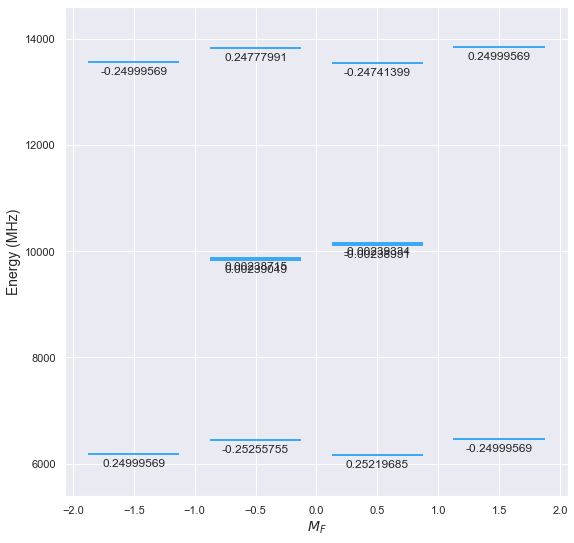

In [41]:
X010.display_PTV(,'EDM')

In [34]:
evals, evecs = X010.eigensystem(Efield,Bfield,order=True,method='torch')
M0_idx = X010.select_q({'M':[-3/2,-1/2,1/2,3/2]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [117]:
evals, evecs = X010.eigensystem(1000,1e-8,order=True,method='torch')
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.01,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['J','K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.01,round=4)))
    print('\n')

[ 2  3  8 11 12 15 18 19]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [42]:
Bz = np.linspace(1e-6,40,1000)
Ez = np.linspace(0,500,1000)

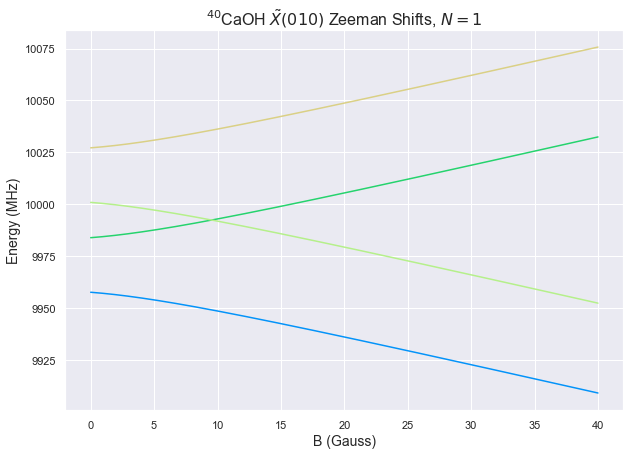

In [75]:
X010.ZeemanMap(Bz,0,plot=True)

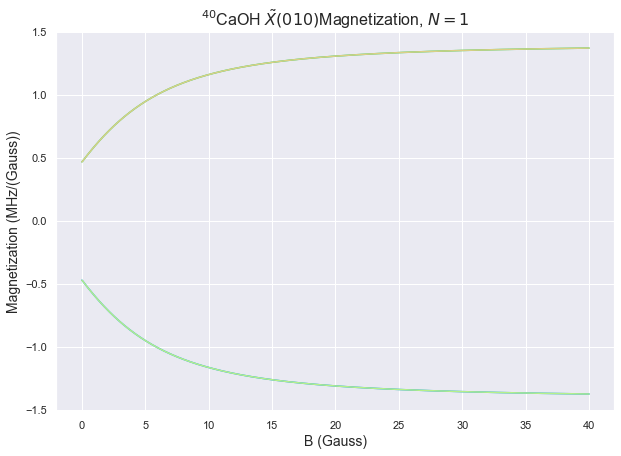

In [76]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_B.T):
    grad = np.gradient(trace)/(Bz[1]-Bz[0])
    plt.plot(Bz,grad)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (MHz/(Gauss))',fontsize=14)
plt.title(X010.state_str + r'Magnetization, $N={}$'.format(*X010.N_range),fontsize=16);

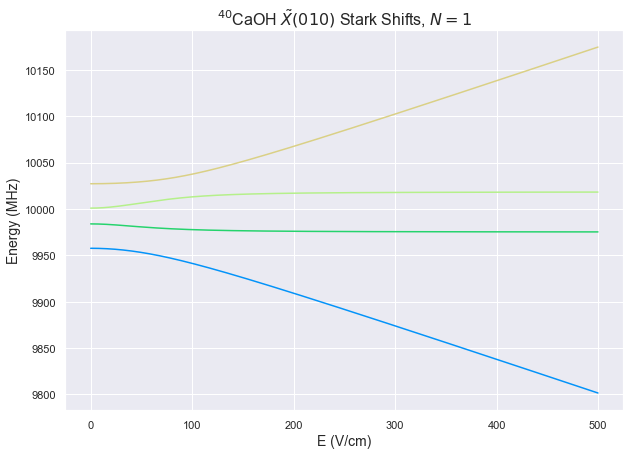

In [78]:
X010.StarkMap(Ez,1e-6,plot=True)
# X010.plot_evals_EB('E',kV_kG=True,GHz=True)

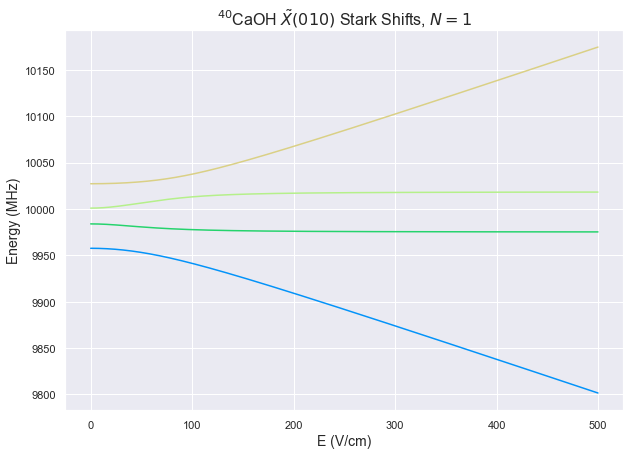

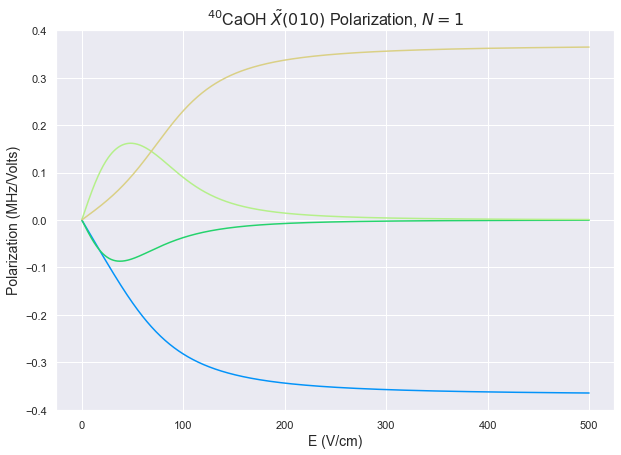

In [98]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

We can display a plot of the energy levels at arbitray field. (The code does not handle parity labeling well, so I am leaving out L for zero field.)

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1, 0.5 kV/cm')

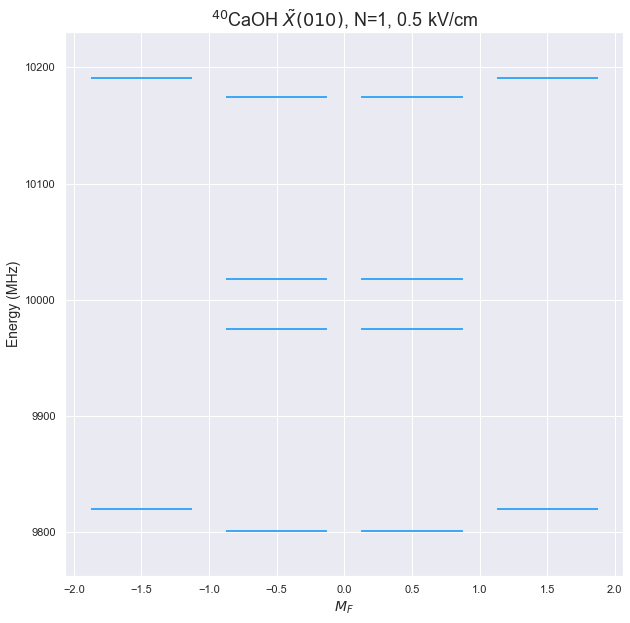

In [47]:
X010.display_levels(500,1e-7,'F',label=None,alt_label=True)
plt.title(X010.state_str+', N=1, 0.5 kV/cm',fontsize=18)

We can also look at PT violating shifts. Here, we consider the EDM shifts as a function of E field. 

In [48]:
X010.eigensystem(0,1e-8);

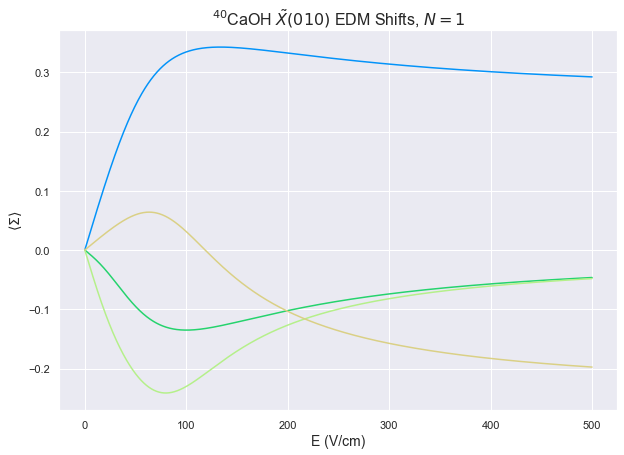

In [85]:
X010.PTV_Map('EDM',E_or_B='E',plot=True)

We can look specifically at the upper and lower Stark manifolds at a given field value too.

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 60.8 V/cm')

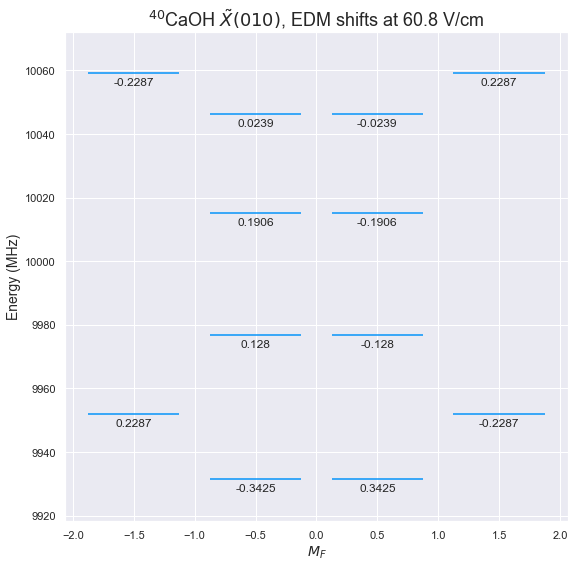

In [51]:
X010.display_PTV(133,1e-7,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 60.8 V/cm',fontsize=18)

In [60]:
X010.eigensystem(1000,0)
M0_idx = X010.select_q({'M':[1]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.01,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.01,round=4)))
    print('\n')

[0 1 2 3 4 5]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [50]:
X010.eigensystem(100,1e-2)
(sy.Matrix(X010.evecs0[0]).T*X010.H_symbolic*sy.Matrix(X010.evecs0[0]))[0]

-0.048487643331535*Bz - 0.277154404334809*Ez + 9969.35364112334

In [43]:
(sy.Matrix(X010.evecs0[1]).T*X010.H_symbolic*sy.Matrix(X010.evecs0[1]))[0]

1.28069264538709*Bz - 0.368490639112473*Ez + 9987.63731699745

In [373]:
import matrix_elements_sym as me
from functools import partial
from matrix_elements_sym import decouple_b_even

def H_even_X(q_numbers,params,matrix_elements,symbolic=True,E=0,B=0,M_values='all',precision=5):
    q_str = list(q_numbers)     # Get keys for quantum number dict
    if symbolic:
        Ez,Bz = sy.symbols('E_z B_z')
        size = len(q_numbers[q_str[0]])
        # Need to construct empty matrices to fill with matrix elements
        # Sympy does not like numpy arrays, so convert to list
        H0 = np.zeros((size,size)).tolist()
        V_B = np.zeros((size,size)).tolist()
        V_E = np.zeros((size,size)).tolist()
        if params.get('D') is not None:
            N0 = np.zeros((size,size)).tolist()
        if params.get('q_lD_D') is not None:
            lD0 = np.zeros((size,size)).tolist()
        #Iz = np.zeros((size,size)).tolist()
        #Sz = np.zeros((size,size)).tolist()
        for i in range(size):
            for j in range(size):
                # State out is LHS of bra ket, state in is RHS
                state_out = {q+'0':q_numbers[q][i] for q in q_str}
                state_in = {q+'1':q_numbers[q][j] for q in q_str}
                q_args = {**state_out,**state_in}
                elements = {term: sy.N(element(**q_args)) for term, element in matrix_elements.items()}
                # The Hamiltonian
                H0[i][j] = params['Be']*elements['N^2'] + params['Gamma_SR']*elements['N.S'] + \
                    params['bF']*elements['I.S'] + params['c']/3*np.sqrt(6)*elements['T2_0(I,S)']
                if params.get('q_lD') is not None:
                    H0[i][j] += params['p_lD']*elements['l doubling p'] - params['q_lD']*elements['l doubling q'] -params['Gamma_SR']*elements['NzSz']+params['Gamma_Prime']*elements['NzSz'] #old: params['q_lD']/2*elements['l-doubling']
                    # H0[i][j] += -params['q_lD']/2*elements['l-doubling'] - params['Gamma_SR']*elements['NzSz']+params['Gamma_Prime']*elements['NzSz']
                if M_values!='none':
                    V_B[i][j]+=params['g_S']*params['mu_B']*elements['ZeemanZ']
                    V_E[i][j]+=-params['muE']*elements['StarkZ']
                if params.get('D') is not None:
                    N0[i][j] += elements['N^2']
                if params.get('q_lD_D') is not None:
                    lD0[i][j] += elements['l doubling q']
                # H[i][j] = round(H[i][j],precision)
                #Iz[i][j] = params['c']*elements['Iz']
                #Sz[i][j] = elements['Sz']
        # Need to add centrifugal terms
        if params.get('D') is not None:
            H0 = matadd(H0,scalarmult(-params['D'],matmult(N0,N0)))
        if params.get('q_lD_D') is not None:
            H0 = matadd(H0,scalarmult(-params['q_lD_D']/2,(matadd(matmult(lD0,N0),matmult(N0,lD0)))))
        #H=matadd(H,matmult(Iz,Sz))
        # Create symbolic object
        H_symbolic = sy.Matrix(H0)+Ez*sy.Matrix(V_E)+Bz*sy.Matrix(V_B)
#         H0_num = np.array(H0).astype(np.float64)
#         V_E_num = np.array(V_E).astype(np.float64)
#         V_B_num = np.array(V_B).astype(np.float64)
        # Use symbolic object to create function that given E and B values, returns a numpy array
#         H_func = lambda E,B: H0_num + V_E_num*E + V_B_num*B
        # H_func = sy.lambdify((Ez,Bz), H_symbolic, modules='numpy')
        return H_symbolic
                        
def matmult(a,b):
    zip_b = list(zip(*b))
    return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b))
             for col_b in zip_b] for row_a in a]

def scalarmult(s,mat):
    return [[s*ele for ele in inner] for inner in mat]

def matadd(a,b):
    return [[ele_a+ele_b for ele_a,ele_b in zip(row_a,row_b)] for row_a,row_b in zip(a,b)]

def decouple_b(input_qnumbers,output_qnumbers,S=1/2,I=1/2):
    input_keys = list(input_qnumbers)
    output_keys = list(output_qnumbers)
    input_size = len(input_qnumbers[input_keys[0]])
    output_size = len(output_qnumbers[output_keys[0]])
    basis_matrix = np.zeros((output_size,input_size)).tolist()
    for i in range(output_size):
        for j in range(input_size):
            decoupled_qnumbers = {q:output_qnumbers[q][i] for q in output_keys}
            b_qnumbers = {q:input_qnumbers[q][j] for q in input_keys}
            basis_matrix[i][j] = sy.nsimplify(decouple_b_even(decoupled_qnumbers,b_qnumbers,S=S,I=I))
    return basis_matrix
   
    

bBJ_even_X_matrix_elements={
        # Fine Structure
        'N^2': me.Rot_bBJ,                 # N^2 Rotation
        'N.S': me.SR_bBJ,                  # N.S Spin Rotation
        'l-doubling': me.lD_bBJ,           # Effective l doubling
        'l doubling p':me.p_lD_bBJ,
        'l doubling q':me.q_lD_bBJ,
        'NzSz': me.NzSz_bBJ,               # NzSz for bending mode

        # Hydrogen Hyperfine
        'I.S': me.IS_bBJ,                  # I.S Fermi Contact Interaction
        'T2_0(I,S)': me.T2IS_bBJ,          # I S dipolar interaction
        'Iz': me.Iz_bBJ,                   # I.n projection of I on internuclear axis n
        'Sz': me.Sz_bBJ,                   # S.n projection of S on internuclear axis n
        }

ext_fields = {
# External Fields
'ZeemanZ': me.ZeemanZ_bBJ,         # Zeeman interaction with lab z magnetic field
'StarkZ': me.StarkZ_bBJ            # Stark interaction with lab z electric field
}
bBJ_even_X_matrix_elements.update(ext_fields)
for term,element in bBJ_even_X_matrix_elements.items():       #iterate through, substitute hydrogen proton value
            bBJ_even_X_matrix_elements[term] = partial(element,I=1/2)

        

B,D,gamma,gammap, bF,c,b,q_lD,muE,muB,g_S,g_L = sy.symbols('B_{rot} D gamma gamma^\' b_F c b q_{lD} D_z mu_B g_S g_L')
params_40X010 = {
'Be': 0*9996.7518,
'D': 0*0.0117696,
'Gamma_SR': gamma,#35.051,
'Gamma_Prime': 0,
'bF': bF,
'c': c,
'b': 0,
'q_lD': q_lD,
'p_lD': 0,
'muE': muE,
'mu_B': muB, #MHz/Gauss
'g_S': 2,
'g_L': 1,
}

params_40X000 = {
'Be': B,#10023.0841,
'D': 0,#1.154*10**-2,
'Gamma_SR':gamma,# 34.7593,
'bF': bF,#2.602,
'c': c,#2.053,
'b': (2.602-2.053/3),
# 'muE': 1.465*0.503412 #Debye in MHz/(V/cm)
}

def build_operator(q_numbers,parameter,operator_element,M_values='all',precision=5):
    q_str = list(q_numbers)     # Get keys for quantum number dict
    size = len(q_numbers[q_str[0]])
    # Need to construct empty matrices to fill with matrix elements
    # Sympy does not like numpy arrays, so convert to list
    H0 = np.zeros((size,size)).tolist()
    #Iz = np.zeros((size,size)).tolist()
    #Sz = np.zeros((size,size)).tolist()
    for i in range(size):
        for j in range(size):
            # State out is LHS of bra ket, state in is RHS
            state_out = {q+'0':q_numbers[q][i] for q in q_str}
            state_in = {q+'1':q_numbers[q][j] for q in q_str}
            q_args = {**state_out,**state_in}
            operator = sy.nsimplify(operator_element(**q_args))
            H0[i][j]+= parameter*operator
    H_symbolic = sy.Matrix(H0)
    return H_symbolic

In [374]:
# X000 = MoleculeLevels.initialize_state('CaOH','40','X000',[1,2],M_values = 'none',I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'custom',M_range=[1],I=[0,1/2],S=1/2,round=8,P_values=[1/2,3/2])
X010.q_numbers

{'K': [-1, 1, -1, 1, -1, 1],
 'N': [1, 1, 1, 1, 1, 1],
 'J': [0.5, 0.5, 1.5, 1.5, 1.5, 1.5],
 'F': [1.0, 1.0, 1.0, 1.0, 2.0, 2.0],
 'M': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

In [375]:
Ez = sy.symbols('E_z')
H_sym010 = H_even_X(X010.q_numbers,params_40X010,bBJ_even_X_matrix_elements,symbolic=True,E=Ez,B=1e-3,M_values='custom',precision=8)
# H_sym000 = H_even_X(X000.q_numbers,params_40X000,bBJ_even_X_matrix_elements,symbolic=True,E=0,B=0,M_values='none',precision=8)

In [376]:
H_sym010

Matrix([
[-0.333333333333333*B_z*mu_B + 0.333333333333333*D_z*E_z - 0.0833333333333333*b_F - 0.0555555555555555*c - 0.5*gamma,                                                                                                         -1.0*q_{lD},              0.471404520791032*B_z*mu_B - 0.117851130197758*D_z*E_z + 0.471404520791032*b_F - 0.0392837100659193*c,                                                                                                                  0,                    -0.816496580927726*B_z*mu_B + 0.204124145231931*D_z*E_z,                                                                          0],
[                                                                                                        -1.0*q_{lD}, -0.333333333333333*B_z*mu_B - 0.333333333333333*D_z*E_z - 0.0833333333333333*b_F - 0.0555555555555555*c - 0.5*gamma,                                                                                                                  0,              0.47140

In [76]:
Ms = build_operator(X010.q_numbers,params_40X010['mu_B'],bBJ_even_X_matrix_elements['ZeemanZ'],precision=8)

In [77]:
Ms

Matrix([
[        -mu_B/6,               0, -sqrt(2)*mu_B/3,               0,      0,      0],
[              0,         -mu_B/6,               0, -sqrt(2)*mu_B/3,      0,      0],
[-sqrt(2)*mu_B/3,               0,          mu_B/6,               0,      0,      0],
[              0, -sqrt(2)*mu_B/3,               0,          mu_B/6,      0,      0],
[              0,               0,               0,               0, mu_B/2,      0],
[              0,               0,               0,               0,      0, mu_B/2]])

In [377]:
(H_sym010)

Matrix([
[-0.333333333333333*B_z*mu_B + 0.333333333333333*D_z*E_z - 0.0833333333333333*b_F - 0.0555555555555555*c - 0.5*gamma,                                                                                                         -1.0*q_{lD},              0.471404520791032*B_z*mu_B - 0.117851130197758*D_z*E_z + 0.471404520791032*b_F - 0.0392837100659193*c,                                                                                                                  0,                    -0.816496580927726*B_z*mu_B + 0.204124145231931*D_z*E_z,                                                                          0],
[                                                                                                        -1.0*q_{lD}, -0.333333333333333*B_z*mu_B - 0.333333333333333*D_z*E_z - 0.0833333333333333*b_F - 0.0555555555555555*c - 0.5*gamma,                                                                                                                  0,              0.47140

In [43]:
(2.602/4+2.053/6)

0.9926666666666666

In [45]:
(2.602/4-2.053/3)

-0.03383333333333338

In [24]:
X010.eigensystem(0,0)
x = sy.Matrix(X010.evecs0[0]).T*H_sym*sy.Matrix(X010.evecs0[0])
y = sy.Matrix(X010.evecs0[1]).T*H_sym*sy.Matrix(X010.evecs0[1])
sy.N(y-x)[0]

0.376190399497111*b_F + 0.218661515783231*c - 0.0528114232783992

In [16]:
X010.eigensystem(0,0)
x = sy.Matrix(X010.evecs0[1]).T*H_sym*sy.Matrix(X010.evecs0[1])
y = sy.Matrix(X010.evecs0[9]).T*H_sym*sy.Matrix(X010.evecs0[9])
sy.N(y-x)[0]

-9.62828716755126e-8*b_F - 0.250103268508433*c + 39917.1313399156

In [22]:
X010.eigensystem(0,0)
x = sy.Matrix(X010.evecs0[0]).T*H_sym*sy.Matrix(X010.evecs0[0])
y = sy.Matrix(X010.evecs0[8]).T*H_sym*sy.Matrix(X010.evecs0[8])
sy.N(y-x)[0]

-0.0422209520949427*b_F + 0.100526109817674*c + 39917.1041522487

In [26]:
X010.eigensystem(0,0)
x = sy.Matrix(X010.evecs0[8]).T*H_sym*sy.Matrix(X010.evecs0[8])
y = sy.Matrix(X010.evecs0[9]).T*H_sym*sy.Matrix(X010.evecs0[9])
sy.N(y-x)[0]

0.418411255309182*b_F - 0.131967862542875*c - 0.0256237563371542

In [20]:
X010.eigensystem(0,0)
x = sy.Matrix(X010.evecs0[0]).T*H_sym*sy.Matrix(X010.evecs0[0])
y = sy.Matrix(X010.evecs0[9]).T*H_sym*sy.Matrix(X010.evecs0[9])
sy.N(x-y)[0]

-0.368690266949417*b_F + 0.0308154564509281*c - 39917.095216173

In [23]:
X010.write_state(0)

E = 9957.15804894227 MHz

 0.7063970701406446 |K=-1,N=1,J=0.5,F=1.0,M=0.0> 

 -0.7063970701405831 |K=1,N=1,J=0.5,F=1.0,M=0.0> 

 -0.03167299999383453 |K=-1,N=1,J=1.5,F=1.0,M=0.0> 

 0.03167299999382295 |K=1,N=1,J=1.5,F=1.0,M=0.0> 

 2.572594914873605e-15 |K=-1,N=1,J=1.5,F=2.0,M=0.0> 

 -1.4276774207289122e-15 |K=1,N=1,J=1.5,F=2.0,M=0.0> 

 -1.918718187341774e-05 |K=-1,N=2,J=1.5,F=1.0,M=0.0> 

 -1.918718187340883e-05 |K=1,N=2,J=1.5,F=1.0,M=0.0> 

 9.88479965772824e-19 |K=-1,N=2,J=1.5,F=2.0,M=0.0> 

 5.488275046326271e-19 |K=1,N=2,J=1.5,F=2.0,M=0.0> 

 9.284192856877398e-21 |K=-1,N=2,J=2.5,F=2.0,M=0.0> 

 5.140322098455786e-21 |K=1,N=2,J=2.5,F=2.0,M=0.0> 



In [23]:
NzSz = build_operator(X010.q_numbers,params_40X010['Gamma_Prime'],bBJ_even_X_matrix_elements['NzSz'],precision=8)
NS = build_operator(X010.q_numbers,params_40X010['Gamma_SR'],bBJ_even_X_matrix_elements['N.S'],precision=8)

In [24]:
NS-NzSz

Matrix([
[-gamma + gamma^'/2,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0],
[                 0, -gamma + gamma^'/2,                  0,                  0,                  0,                  0,                  0,                  0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                  

In [25]:
inputt = X010.q_numbers
output = X010.alt_q_numbers['decoupled']
basis_matrix = sy.Matrix(decouple_b(inputt,output,I=1/2))

In [26]:
H_dcpl = basis_matrix*H_sym*basis_matrix.T

In [27]:
NzSz_dcpl = basis_matrix*NzSz*basis_matrix.T
NS_dcpl = basis_matrix*NS*basis_matrix.T

In [28]:
SR_dcpl = NS_dcpl-NzSz_dcpl

In [29]:
SR_dcpl

Matrix([
[gamma/2 - gamma^'/4,                   0,                   0,                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                   0,                   0,                   0,                   0],
[                  0, gamma/2 - gamma^'/4,                   0,                   0,                                   0,                                   0,                                   0,                                  

In [28]:
ilist = range(0,24)
for i in ilist:
    print(i)
    for k,v in X010.q_numbers.items():
        print('{} = {}'.format(k,v[i]))

0
K = -1
N = 1
J = 0.5
F = 0.0
M = 0.0
1
K = 1
N = 1
J = 0.5
F = 0.0
M = 0.0
2
K = -1
N = 1
J = 0.5
F = 1.0
M = 0.0
3
K = 1
N = 1
J = 0.5
F = 1.0
M = 0.0
4
K = -1
N = 1
J = 1.5
F = 1.0
M = 0.0
5
K = 1
N = 1
J = 1.5
F = 1.0
M = 0.0
6
K = -1
N = 1
J = 1.5
F = 2.0
M = 0.0
7
K = 1
N = 1
J = 1.5
F = 2.0
M = 0.0
8
K = -1
N = 2
J = 1.5
F = 1.0
M = 0.0
9
K = 1
N = 2
J = 1.5
F = 1.0
M = 0.0
10
K = -1
N = 2
J = 1.5
F = 2.0
M = 0.0
11
K = 1
N = 2
J = 1.5
F = 2.0
M = 0.0
12
K = -1
N = 2
J = 2.5
F = 2.0
M = 0.0
13
K = 1
N = 2
J = 2.5
F = 2.0
M = 0.0
14
K = -1
N = 2
J = 2.5
F = 3.0
M = 0.0
15
K = 1
N = 2
J = 2.5
F = 3.0
M = 0.0
16


IndexError: list index out of range

In [25]:
vec = np.zeros(24)
vec[6] = 1/sy.sqrt(2) #
vec[17] = 1/sy.sqrt(2)

In [26]:
NS_dcpl-NzSz_dcpl

Matrix([
[gamma/4,       0,               0,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0, gamma/4,               0,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,        -gamma/4,               0, sqrt(2)*gamma/4,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,               0,        -gamma/4,               0, sqrt(2)*gamma/4,               0,               0,               0,               0,       0,       0],
[      0,       0, sqrt(2)*gamma/4,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,               0, sqrt(2)*gamma/4,               0,               0,               0,               0, 

In [27]:
H_dcpl=sy.simplify(H_dcpl)
H_dcpl

Matrix([
[-B_z*g_S*mu_B/2 + B_{rot} - D*E_z/2 + gamma/4,                                       -q_{lD},                                            0,                                            0,                         0,                         0,                        0,                        0,                                             0,                                             0,                                            0,                                            0],
[                                      -q_{lD}, -B_z*g_S*mu_B/2 + B_{rot} + D*E_z/2 + gamma/4,                                            0,                                            0,                         0,                         0,                        0,                        0,                                             0,                                             0,                                            0,                                            0],
[                              

In [135]:
X010.eigensystem(1000,0)
even = sy.Matrix([0,1/sy.sqrt(2),0,0,0,0,1/sy.sqrt(2),0])
odd = sy.Matrix([1/sy.sqrt(2),0,0,0,0,0,0,-1/sy.sqrt(2)])
x = sy.simplify(even.T*H_dcpl*even)
y = sy.simplify(odd.T*H_dcpl*odd)
x[0]

B_{rot} + D*E_z/2 + b_F/4 + c/60 - gamma/4

In [136]:
y[0]

B_{rot} - D*E_z/2 + b_F/4 + c/60 - gamma/4

In [142]:
X010.eigensystem(1000,)
x = sy.Matrix(X010.evecs0[0]).T*H_sym*sy.Matrix(X010.evecs0[0])
y = sy.Matrix(X010.evecs0[1]).T*H_sym*sy.Matrix(X010.evecs0[1])
sy.N(x-y)[0]

-1.09823410572936e-11*B_z*g_S*mu_B + 3.74903172901661e-5*D*E_z - 0.00019018948895402*b_F - 0.0122648086400407*c - 5.8647193332706e-5*gamma + 0.00118230125639449*q_{lD}

In [42]:
X010.H_symbolic

Matrix([
[                           9980.21896666667,                                      21.649,         -0.4670780207227*Bz + 0.24583286*Ez,                                           0, -1.32109614318485*Bz + 0.173830082344483*Ez,                                           0,                                           0,                                           0],
[                                     21.649,                            9980.21896666667,                                           0,         -0.4670780207227*Bz - 0.24583286*Ez,                                           0, -1.32109614318485*Bz - 0.173830082344483*Ez,                                           0,                                           0],
[        -0.4670780207227*Bz + 0.24583286*Ez,                                           0,                            9978.89541111111,                                      21.649,                            1.14594510633293,                                          

In [17]:
X010.eigensystem(100000,0)
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
for i in M0_idx:
    print('E =',X010.evals0[i])
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.001,label_q=['K','M_N','M_S','M_I','M_F'])))
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','Sigma','P','M'])))
#     display(Latex(X010.gen_state_str(i,thresh=0.05)))

[0 1 2 3 4 5 6 7]
E = -26869.87053477218


<IPython.core.display.Latex object>

E = -26869.753213628093


<IPython.core.display.Latex object>

E = 9973.151313958582


<IPython.core.display.Latex object>

E = 10016.449292801037


<IPython.core.display.Latex object>

E = 10042.423225935365


<IPython.core.display.Latex object>

E = 10085.720997939427


<IPython.core.display.Latex object>

E = 46880.36769489169


<IPython.core.display.Latex object>

E = 46880.485222874166


<IPython.core.display.Latex object>

In [83]:
X010.eigensystem(0,1e-6)
X010.g_eff_Map(step=1e-6);

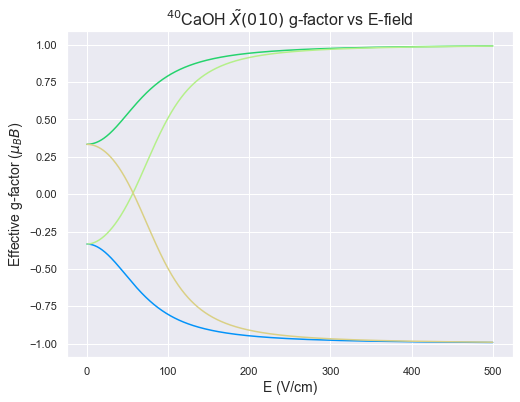

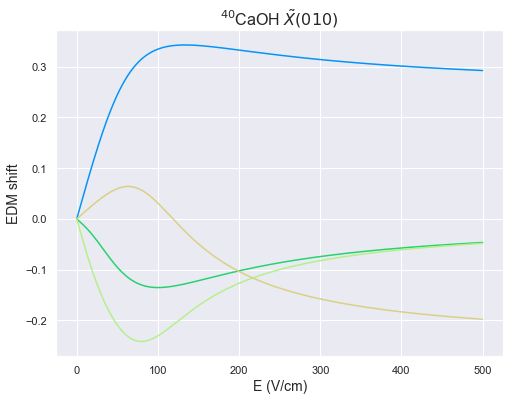

In [86]:
j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);

In [81]:
X010.eigensystem(0,1e-6)
M_idx = X010.select_q({'M':[1/2]})
print(M_idx)

[0 1 2 3]


IndexError: index 4 is out of bounds for axis 0 with size 4

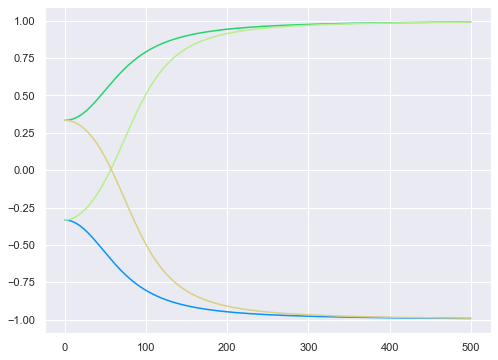

In [87]:
j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in range(10):#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.xlim(53,73)
plt.figure(figsize=(8,6))
for i in range(12):#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);
plt.xlim(53,73);

In [175]:
for j in [12,18]:
    g_eff = X010.g_eff_E.T[j]
    for i in range(1,len(g_eff)):
        if (g_eff[i]>0 and g_eff[i-1]<0) or g_eff[i]<0 and g_eff[i-1]>0:
            print('idx =',j)
            print('E field =',(Ez[i]+Ez[i-1])/2)
            print('PTV =,',(X010.PTV_E.T[j][i]+X010.PTV_E.T[j][i-1])/2)
            print('Energy =',(X010.evals_E.T[j][i]+X010.evals_E.T[j][i-1])/2)

idx = 12
E field = 60.83108310831083
PTV =, -0.22727988
Energy = 10008.053070099853
idx = 18
E field = 65.28152815281528
PTV =, 0.070567485
Energy = 10030.921999206803


In [196]:
X010.eigensystem(1000,1e-7)
M_idx = X010.select_q({'M':[0]})
idx = M_idx
for i in idx:
    print(idx)
    print(X010.g_eff_EB()[i])
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['J','K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 2  3  8 11 12 15 18 19]
3.8988801882439546e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
7.797760376487909e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-2.599253458829303e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-3.8988801882439546e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-2.599253458829303e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 65.28 V/cm')

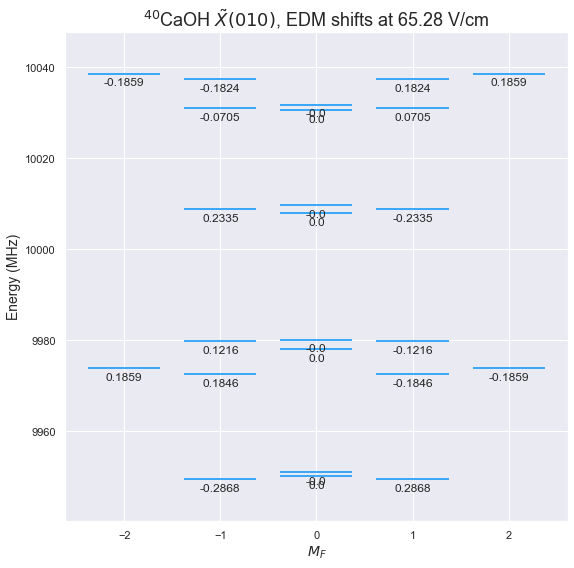

In [179]:
X010.display_PTV(65.28,1e-7,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 65.28 V/cm',fontsize=18)

[ 1  3  5  9 13 15 17 21]
1 1.45e-05 499.7999799979998
3 1.45e-05 499.74997499749975
5 1.3e-07 105.06050605060506
9 1.3e-07 90.65906590659066
13 1.6e-07 105.71057105710571
15 1.8e-07 106.66066606660665
17 1.149e-05 499.8999899989999
21 1.149e-05 499.84998499849985


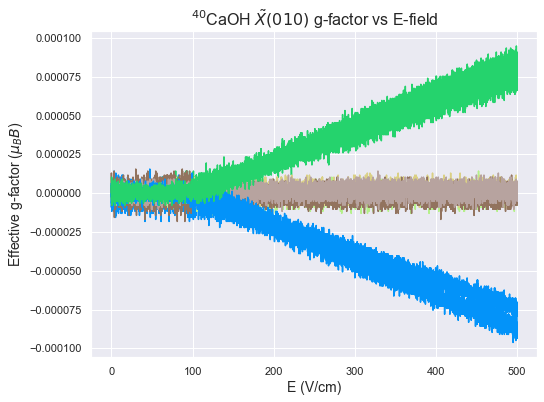

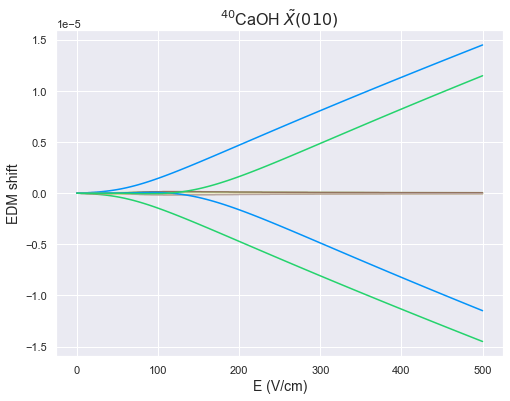

In [192]:
X010.eigensystem(0,1e-6)
M_idx = X010.select_q({'M':[0]})
print(M_idx)

j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in M_idx:#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in M_idx:#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
    print(i,max(abs(X010.PTV_E.T[i])),Ez[np.argmax(abs(X010.PTV_E.T[i]))])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 1000 V/cm and 10 mG')

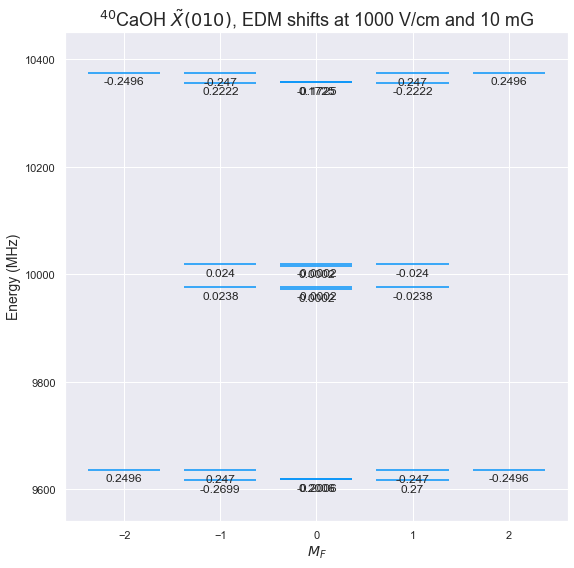

In [199]:
X010.display_PTV(1000,1e-2,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 1000 V/cm and 10 mG',fontsize=18)

In [105]:
import time
X010_p = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=8,M_range=[1])

Bz = np.linspace(1e-6,20,1000)
Ez = np.linspace(0,500,1000)
t0 = time.perf_counter()
Bslices_p = X010_p.EB_grid(Ez,Bz,PTV=True,E_or_B_first='B',output=True,EDM_or_MQM='EDM')
t1 = time.perf_counter()
elapsed = t1 - t0
print(elapsed, 'sec')

25.03476210000008 sec


In [49]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [50]:
# save_json_data(Bslices[0].tolist(),'X010_CaOH_Mpm0p5_EB_grid_evals_20220306')
# save_json_data(Bslices[1].tolist(),'X010_CaOH_Mpm0p5_EB_grid_PTV_20220306')

In [106]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


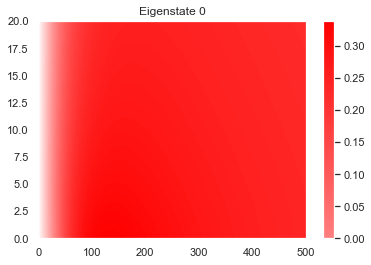

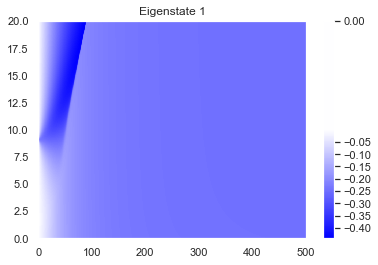

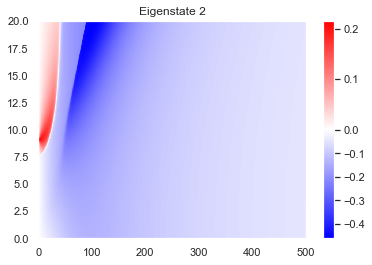

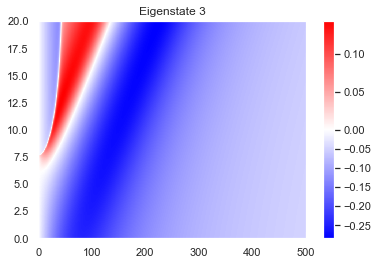

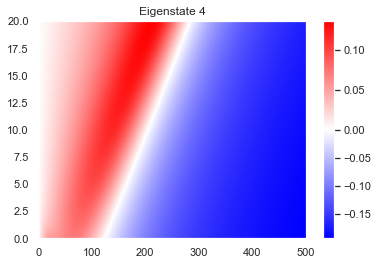

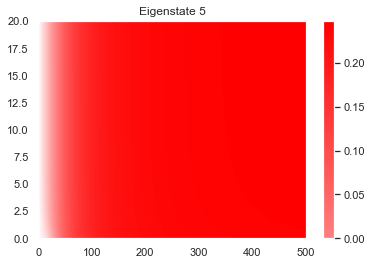

In [107]:
from matplotlib.colors import TwoSlopeNorm
for i in range(len(Bslices_p[0])):
    plt.figure()
    plt.pcolormesh(*mesh,Bslices_p[1][i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(0))
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


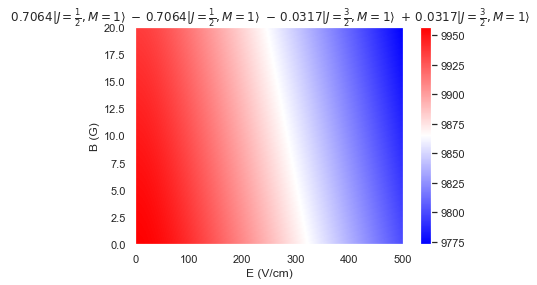

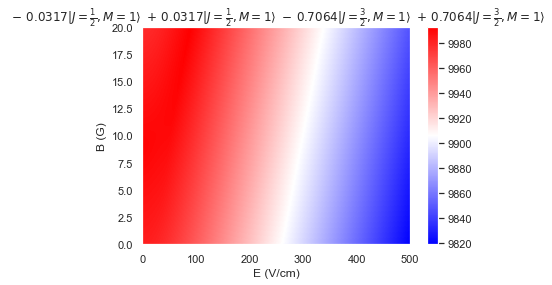

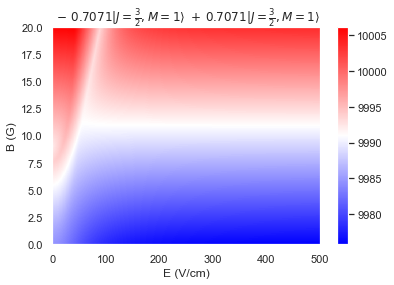

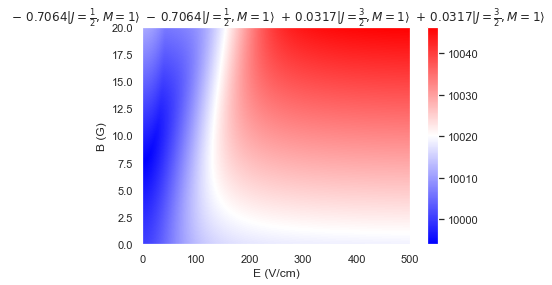

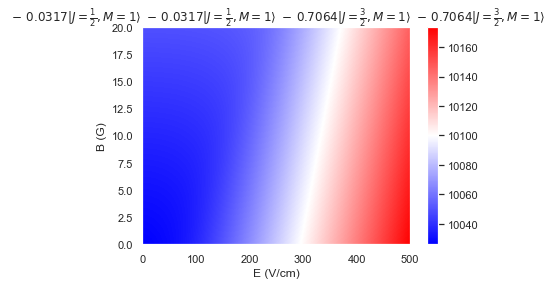

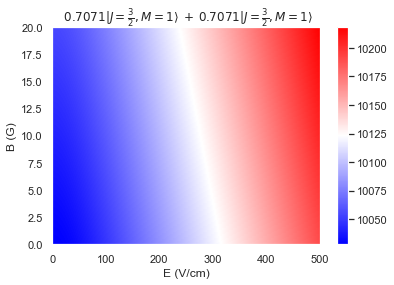

In [108]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,Bslices_p[0][i],shading='auto',cmap='bwr')
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [73]:
np.gradient(Bslices_p[0][0])[1]/(Bz[1]-Bz[0])

array([[-5355728.85423, -2678181.5899 , -1339206.26323, ...,
           -7655.38735,    -7654.93535,    -7654.7095 ],
       [-5355531.53913, -2678082.64793, -1339156.52261, ...,
           -7655.38253,    -7654.93054,    -7654.70469],
       [-5354934.98431, -2677784.10418, -1339007.56767, ...,
           -7655.36806,    -7654.91609,    -7654.69025],
       ...,
       [  -30677.45953,   -17459.08086,   -10543.94911, ...,
           -7165.79655,    -7165.78812,    -7165.7839 ],
       [  -30660.62245,   -17451.45616,   -10540.68135, ...,
           -7165.76865,    -7165.76022,    -7165.75601],
       [  -30643.80722,   -17443.84186,   -10537.41838, ...,
           -7165.74078,    -7165.73236,    -7165.72816]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


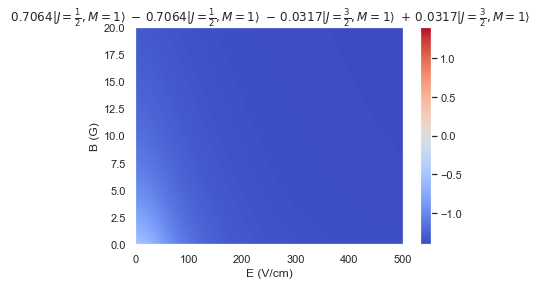

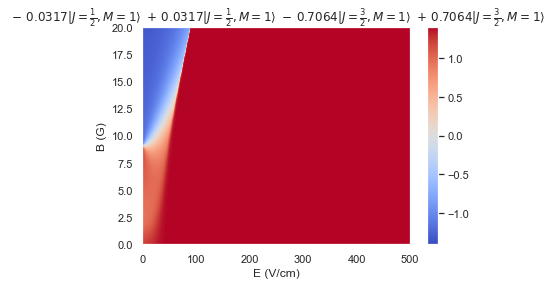

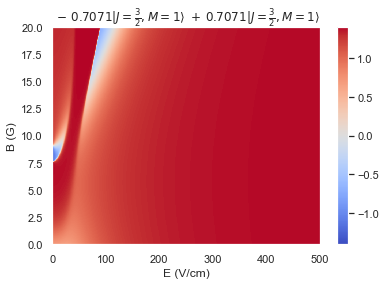

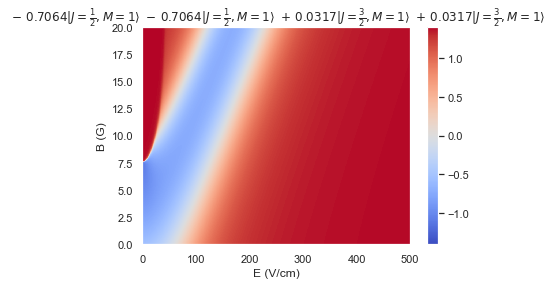

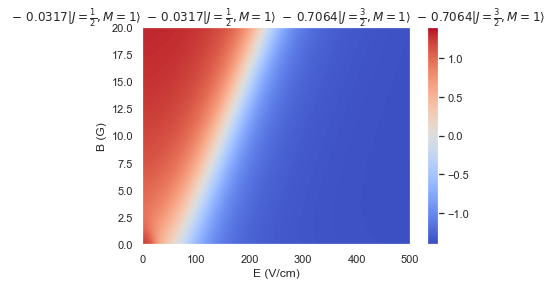

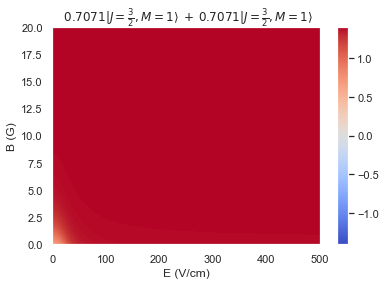

In [109]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    geff = np.gradient(Bslices_p[0][i])[1]/(Bz[1]-Bz[0])
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,geff,shading='auto',cmap='coolwarm',vmin=-1.4,vmax=1.4)
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [97]:
np.log10(-0.01)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


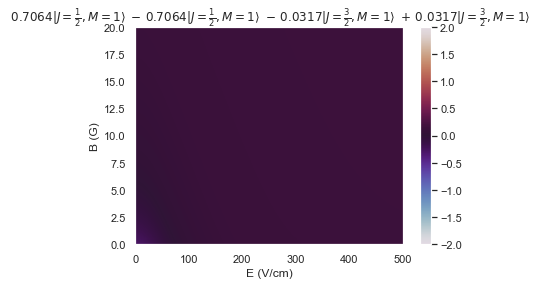

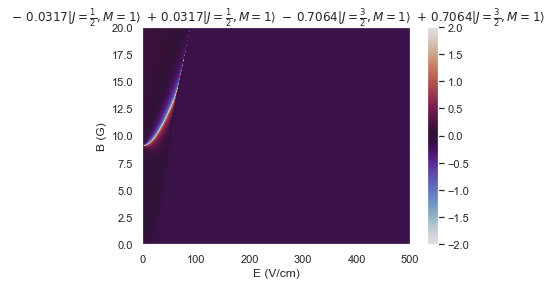

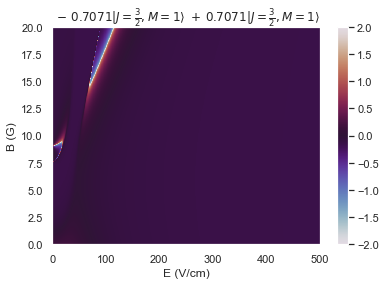

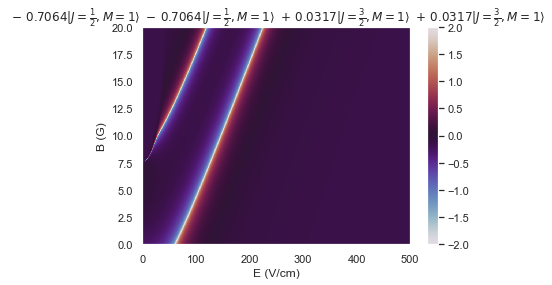

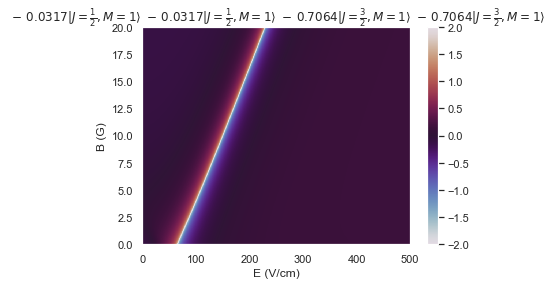

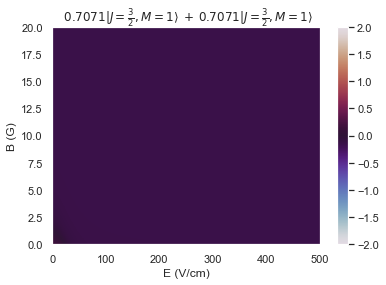

In [110]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    geff = np.gradient(Bslices_p[0][i])[1]/(Bz[1]-Bz[0])
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,-np.sign(geff)*np.log10(abs(geff)),shading='auto',cmap='twilight',vmin=-2,vmax=2)
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')